<h1>MEDICAL HEALTH APPLICATIONS ANALYSIS</h1>
<p>-----------------------------------</p>
<center><img src ="https://cdn.dribbble.com/users/12145719/screenshots/18707587/dribbble_shot_hd_-_10_4x.png" width = "800" height = '500'/>

<h2>Introduction</h2>
<p>This study delves into the realm of Medical Health Applications analysis, focusing on the 
efficiency of these applications and users' perspectives. It stands as a unique contribution, setting 
itself apart from previous works in this domain. Through rigorous evaluation, monitoring, and user 
feedback assessment, a comprehensive analysis of the use of mobile health applications for 
monitoring menstrual cycles is conducted. To facilitate this detailed analysis, a well-structured 
questionnaire is employed, encompassing demographic information, the Mobile Health 
Application Scale (MHAS), and the Mobile Health Application Daily Usage Scale (MHADUS).</p>

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
    
<h1 style="padding: 8px; color: white; display: fill; background-color: deeppink; border-radius: 5px; font-size: 150%"><b> Table of contents </b></h1>

    
1. [Importing libraries](#Libraries)
2. [Loading data](#Data)
3. [Statistical summaries](#Statistics)
4. [Data Cleaning](#DataCleaning)
5. [Exploratory Data Analysis](#EDA)
6. [Feature Engineering / Data Normalization](#Feature)
7. [Correlation EDA](#correlation)
8. [Model Building](#Modelling)
 

<a name="Libraries"></a>
## <p style="padding: 8px;color:white; display:fill;background-color:deeppink; border-radius:5px; font-size:100%"> <b>1. Importing libraries</b>

In [1]:
import numpy as np #for linear algebra/data preprocessing
import pandas as pd #for data preprocessing
import seaborn as sns #for data visualization
import matplotlib.pyplot as plt #for data visualization
plt.style.use("fivethirtyeight")#for styling of the plots
import warnings#for ignoring warnings
warnings.filterwarnings('ignore')

In [148]:
from sklearn.model_selection import train_test_split,  KFold, StratifiedKFold, RepeatedStratifiedKFold, RepeatedKFold #To split data
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import StandardScaler #For Scaling
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier # Algorithm for predictions
from sklearn.neighbors import KNeighborsClassifier #Algorithm for prediction
from sklearn.tree import DecisionTreeClassifier #Algorithm for prediction
from sklearn.linear_model import LogisticRegression #Algorithm for predictions
from sklearn.svm import SVC #Algorithm for predictions
from xgboost import XGBClassifier #Algorithm for predictions
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score, classification_report, confusion_matrix #For evaluating built models
from sklearn.model_selection import cross_val_score #For evaluating built models


<a name="Data"></a>
## <p style="padding: 8px;color:white; display:fill;background-color:deeppink; border-radius:5px; font-size:100%"> <b>2. Loading data</b>

In [2]:
data =  pd.read_excel(r'C:\Users\ADMIN\Downloads\DATA SET FOR PROJECT - Copy.xlsx')

In [3]:
data.head()

Unnamed: 0        DEMOGRAPHIC SCALE         Unnamed: 2     Unnamed: 3  \
0        S/N  Education Qualification                Age       Religion   
1          1             Bsc/Bed/Beng        31-50 years  Christianity    
2          2       School Certificate        31-50 years  Christianity    
3          3              Msc/Med/MBA        13-30 years          Islam   
4          4              Msc/Med/MBA  51 years and more  Christianity    

     Unnamed: 4      Unnamed: 5  \
0           Sex          Region   
1  Hetorosexual  United Kingdom   
2  Hetorosexual  United Kingdom   
3  Hetorosexual  United Kingdom   
4  Hetorosexual  United Kingdom   

              MOBILE HEALTH APPLICATION SCALE (MHAS)  \
0  Which of the following apps do you use for tra...   
1                     Period tracker Period Calendar   
2                                        My Calendar   
3                         Flo Period & Cycle Tracker   
4                         Flo Period & Cycle Tracker   

                                       Unnamed: 7  \
0  How long have you been using thr tracking app?   
1                                       1-2 years   
2                                       1-2 years   
3                                       1-2 years   
4                               more than 2 years   

                                    Unnamed: 8  \
0  Rate menstrual tracking app on performances   
1                                            5   
2                                            3   
3                                            4   
4                                          NaN   

                                          Unnamed: 9  ...  \
0  Rate menstrual tracking app on Interaction (GU...  ...   
1                                                  5  ...   
2                                                  5  ...   
3                                                  4  ...   
4                                                  4  ...   

                                         Unnamed: 13  \
0  Rate menstrual tracking app on overall app rating   
1                                                  4   
2                                                  5   
3                                                  4   
4                                                  4   

                       Unnamed: 14  \
0  Would you recomment these apps?   
1                              yes   
2                              yes   
3                              yes   
4                              yes   

                                   Unnamed: 15  \
0  Has the use of MHA improved your lifestyle?   
1                                          yes   
2                                          yes   
3                                          yes   
4                                          yes   

       MOBILE HEALTH APPLICATION USAGE SCALE (MHAUS)  \
0  Does the use of MHA interrupts your daily acti...   
1                                                 no   
2                                                 no   
3                                                 no   
4                                                 no   

                            Unnamed: 17  \
0  Does the MHA gives you daily update?   
1                                    no   
2                                    no   
3                                    no   
4                                    no   

                             Unnamed: 18                       Unnamed: 19  \
0  Is the use of the MHA time consuming?  Do you find the MHA easy to use?   
1                                     no                               yes   
2                                     no                               yes   
3                                     no                               yes   
4                                     no                               yes   

                                         Unnamed: 20  \
0  Has the use of MHA improv

In [4]:
data.tail()

Unnamed: 0   DEMOGRAPHIC SCALE   Unnamed: 2     Unnamed: 3    Unnamed: 4  \
3503       3503             O'LEVEL  31-50 years  Christianity   Hetorosexual   
3504       3504         Msc/Med/MBA  31-50 years  Christianity   Hetorosexual   
3505       3505             O'LEVEL          NaN  Christianity   Hetorosexual   
3506       3506             O'LEVEL  31-50 years  Christianity   Hetorosexual   
3507       3507  School Certificate  31-50 years  Christianity      Bi-sexual   

          Unnamed: 5 MOBILE HEALTH APPLICATION SCALE (MHAS)  \
3503  United Kingdom         Period tracker Period Calendar   
3504  United Kingdom                            My Calendar   
3505  United Kingdom                            My Calendar   
3506          Africa                                 Uteroo   
3507  United Kingdom         Period tracker Period Calendar   

             Unnamed: 7 Unnamed: 8 Unnamed: 9  ... Unnamed: 13 Unnamed: 14  \
3503   less than a year          4          5  ...           5         yes   
3504  more than 2 years          3          4  ...           4         yes   
3505   less than a year          3          4  ...           4         yes   
3506  more than 2 years          4          5  ...           5         yes   
3507   less than a year          4          4  ...           4         yes   

     Unnamed: 15 MOBILE HEALTH APPLICATION USAGE SCALE (MHAUS) Unnamed: 17  \
3503         yes                                            no          no   
3504         yes                                            no          no   
3505         yes                                            no          no   
3506         yes                                            no          no   
3507         yes                                            no          no   

     Unnamed: 18 Unnamed: 19 Unnamed: 20 Unnamed: 21 Unnamed: 22  
3503         yes         yes         yes          no         yes  
3504          no         yes         yes         yes         yes  
3505          no         yes         yes         yes         yes  
3506          no         yes         yes         yes         yes  
3507          no         yes         yes          no          no  

[5 rows x 23 columns]

In [5]:
# It returns the size of the dataset
data.shape

(3508, 23)

-- **Observations**
- We observe that our dataset is having 3508 rows and 23 columns
- We also observe that there is a presence of metadata, which is the "Unnamed: 0"
- We also could see that there are many unnamed column.

<a name="Statistics"></a>
## <p style="padding: 8px;color:white; display:fill;background-color:deeppink; border-radius:5px; font-size:100%"> <b>3. Statistical summaries</b>
    


#### Overview Analysis

During the statistical summaries/overview analysis, we will be examining the general characteristics and properties of the dataset. This includes:

* Data Shape: Determining the number of rows and columns in the dataset to understand its size.

* Data Types: Identifying the data types of variables (e.g., numeric, categorical, datetime) to determine the nature of the data.

* Missing Values: Investigating the presence of missing values in the dataset and deciding on an appropriate strategy to handle them.

* Summary Statistics: Computing descriptive statistics (e.g., mean, median, standard deviation) for numeric variables to gain insights into the central tendencies and distributions.

* Categorical Variables: Analyzing the unique values and frequencies of categorical variables to understand the different categories and their proportions.

* Relationships: Exploring the correlations and relationships between variables through correlation analysis or visualization techniques.

The overview analysis provides a high-level understanding of the dataset and helps identify potential issues or patterns that may require further investigation.

In [6]:
# It returns the column labels of the given dataframe.
data.columns

Index(['Unnamed: 0', 'DEMOGRAPHIC SCALE', 'Unnamed: 2', 'Unnamed: 3',
       'Unnamed: 4', 'Unnamed: 5', 'MOBILE HEALTH APPLICATION SCALE (MHAS)',
       'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'MOBILE HEALTH APPLICATION USAGE SCALE (MHAUS)', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22'],
      dtype='object')

In [7]:
data["Unnamed: 0"].nunique()

3508

In [8]:
# Identifying the datatype for every Variable
data.dtypes

Unnamed: 0                                       object
DEMOGRAPHIC SCALE                                object
Unnamed: 2                                       object
Unnamed: 3                                       object
Unnamed: 4                                       object
Unnamed: 5                                       object
MOBILE HEALTH APPLICATION SCALE (MHAS)           object
Unnamed: 7                                       object
Unnamed: 8                                       object
Unnamed: 9                                       object
Unnamed: 10                                      object
Unnamed: 11                                      object
Unnamed: 12                                      object
Unnamed: 13                                      object
Unnamed: 14                                      object
Unnamed: 15                                      object
MOBILE HEALTH APPLICATION USAGE SCALE (MHAUS)    object
Unnamed: 17                                     

In [9]:
# to as a more clarity information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3508 entries, 0 to 3507
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Unnamed: 0                                     3508 non-null   object
 1   DEMOGRAPHIC SCALE                              3508 non-null   object
 2   Unnamed: 2                                     3463 non-null   object
 3   Unnamed: 3                                     3423 non-null   object
 4   Unnamed: 4                                     3506 non-null   object
 5   Unnamed: 5                                     3499 non-null   object
 6   MOBILE HEALTH APPLICATION SCALE (MHAS)         3499 non-null   object
 7   Unnamed: 7                                     3502 non-null   object
 8   Unnamed: 8                                     3505 non-null   object
 9   Unnamed: 9                                     3506 non-null   

In [10]:
# Describe is used to view some basic statistical details like, percentile, mean, standard deviation, etc of the given dataframe.
data.describe().T

count unique             top  \
Unnamed: 0                                     3508   3508             S/N   
DEMOGRAPHIC SCALE                              3508      6         O'LEVEL   
Unnamed: 2                                     3463      4     13-30 years   
Unnamed: 3                                     3423      5   Christianity    
Unnamed: 4                                     3506      8    Hetorosexual   
Unnamed: 5                                     3499      3  United Kingdom   
MOBILE HEALTH APPLICATION SCALE (MHAS)         3499      6     My Calendar   
Unnamed: 7                                     3502      5       1-2 years   
Unnamed: 8                                     3505      6               4   
Unnamed: 9                                     3506      6               4   
Unnamed: 10                                    3506      6               4   
Unnamed: 11                                    3500      6               4   
Unnamed: 12                                    3501      6               4   
Unnamed: 13                                    3467      6               4   
Unnamed: 14                                    3508      3             yes   
Unnamed: 15                                    3508      3             yes   
MOBILE HEALTH APPLICATION USAGE SCALE (MHAUS)  3508      3              no   
Unnamed: 17                                    3508      3              no   
Unnamed: 18                                    3506      3              no   
Unnamed: 19                                    3508      3             yes   
Unnamed: 20                                    3507      3             yes   
Unnamed: 21                                    3495      3             yes   
Unnamed: 22                                    3502      3             yes   

                                               freq  
Unnamed: 0                                        1  
DEMOGRAPHIC SCALE                              1613  
Unnamed: 2                                     2243  
Unnamed: 3                                     2931  
Unnamed: 4                                     3362  
Unnamed: 5                                     2039  
MOBILE HEALTH APPLICATION SCALE (MHAS)         1011  
Unnamed: 7                                     1461  
Unnamed: 8                                     2192  
Unnamed: 9                                     2214  
Unnamed: 10                                    2372  
Unnamed: 11                                    2325  
Unnamed: 12                                    2224  
Unnamed: 13                                    2300  
Unnamed: 14                                    3474  
Unnamed: 15                                    3435  
MOBILE HEALTH APPLICATION USAGE SCALE (MHAUS)  3314  
Unnamed: 17                                    3380  
Unnamed: 18                                    3287  
Unnamed: 19                                    3384  
Unnamed: 20                                    3415  
Unnamed: 21                                    2810  
Unnamed: 22                                    2276

In [11]:
data["Unnamed: 3"].unique()

array(['Religion', 'Christianity ', 'Islam', nan, 'Islam ', 'Isam'],
      dtype=object)

In [12]:
data["Unnamed: 4"].unique()

array(['Sex', 'Hetorosexual', 'Lesbian', 'Gay', 'Lesbain', nan,
       'Bi-sexual', 'Lesbian ', 'Bi-sexual '], dtype=object)

In [13]:
data["Unnamed: 5"].unique()

array(['Region', 'United Kingdom', 'Africa', nan], dtype=object)

In [14]:
data["Unnamed: 7"].unique()

array(['How long have you been using thr tracking app?', '1-2 years',
       'more than 2 years', 'less than a year', 'less', nan], dtype=object)

In [15]:
data["Unnamed: 8"].unique()

array(['Rate menstrual tracking app on performances', 5, 3, 4, nan, 2, 1],
      dtype=object)

In [16]:
data["Unnamed: 9"].unique()

array(['Rate menstrual tracking app on Interaction (GUI, Customization, Engagement) ',
       5, 4, 3, 2, nan, 1], dtype=object)

In [17]:
data["Unnamed: 10"].unique()

array(['Rate menstrual tracking app on ease to use,navigation and functionality',
       4, 5, 3, 2, 1, nan], dtype=object)

In [18]:
data["Unnamed: 11"].unique()

array(['Rate menstrual tracking app on aethetics (visual appeal, resolution)',
       3, 4, 5, 1, nan, 2], dtype=object)

In [19]:
data["Unnamed: 12"].unique()

array(['Rate menstrual tracking app on accuracy', 4, 5, 3, 2, 1, nan],
      dtype=object)

In [20]:
data["Unnamed: 13"].unique()

array(['Rate menstrual tracking app on overall app rating', 4, 5, 3, 2,
       nan, 1], dtype=object)

In [21]:
data["Unnamed: 14"].unique()

array(['Would you recomment these apps?', 'yes', 'no'], dtype=object)

In [22]:
data["Unnamed: 15"].unique()

array(['Has the use of MHA improved your lifestyle?', 'yes', 'no'],
      dtype=object)

In [23]:
data["Unnamed: 17"].unique()

array(['Does the MHA gives you daily update?', 'no', 'yes'], dtype=object)

In [24]:
data["Unnamed: 18"].unique()

array(['Is the use of the MHA time consuming?', 'no', 'yes', nan],
      dtype=object)

In [25]:
data["Unnamed: 19"].unique()

array(['Do you find the MHA easy to use?', 'yes', 'no'], dtype=object)

In [26]:
data["Unnamed: 20"].unique()

array(['Has the use of MHA improved your daily lifestyle?', 'yes', 'no',
       nan], dtype=object)

In [27]:
data["Unnamed: 21"].unique()

array(['Has the use of MHA helped in setting personal goals for your lifestyle?',
       'yes', 'no', nan], dtype=object)

In [28]:
data["Unnamed: 22"].unique()

array(['Does the daily usage of MHA affects the general performance of your mobile phone?',
       'yes', 'no', nan], dtype=object)

In [29]:
# We will check for any duplicate records in the data. We will remove this data from the data set so that we get only distinct records.
duplicate=data.duplicated()
print(duplicate.sum())
data[duplicate]

0


Empty DataFrame
Columns: [Unnamed: 0, DEMOGRAPHIC SCALE, Unnamed: 2, Unnamed: 3, Unnamed: 4, Unnamed: 5, MOBILE HEALTH APPLICATION SCALE (MHAS), Unnamed: 7, Unnamed: 8, Unnamed: 9, Unnamed: 10, Unnamed: 11, Unnamed: 12, Unnamed: 13, Unnamed: 14, Unnamed: 15, MOBILE HEALTH APPLICATION USAGE SCALE (MHAUS), Unnamed: 17, Unnamed: 18, Unnamed: 19, Unnamed: 20, Unnamed: 21, Unnamed: 22]
Index: []

[0 rows x 23 columns]

-- **Observations**
- We have 20 unnamed columns out of 23 total columns which was due to human error, this will be fixed replacing the first column names with the first column.
- All the variables are object types.
- No duplicate values are found in the dataset
- We also observed that columns like "sex" has some unique variables that was due to human errors e.g "Lesbian" and "Lesbain". This will also be fixed.

### Fixing unnamed columns

In [30]:
# We replace column names with the values in the first row
data.columns = data.iloc[0]

# We drop the first row which contained the original column names
data = data.drop(0)

# We reset the index to ensure data integrity
data = data.reset_index(drop=True)

In [31]:
data.head()

0 S/N Education Qualification                Age       Religion           Sex  \
0   1            Bsc/Bed/Beng        31-50 years  Christianity   Hetorosexual   
1   2      School Certificate        31-50 years  Christianity   Hetorosexual   
2   3             Msc/Med/MBA        13-30 years          Islam  Hetorosexual   
3   4             Msc/Med/MBA  51 years and more  Christianity   Hetorosexual   
4   5             Msc/Med/MBA        31-50 years  Christianity   Hetorosexual   

0          Region  \
0  United Kingdom   
1  United Kingdom   
2  United Kingdom   
3  United Kingdom   
4          Africa   

0 Which of the following apps do you use for tracking menstrual flow? (Flo, My Calendar, Uteroo, Period Tracker, Kunashe)  \
0                     Period tracker Period Calendar                                                                        
1                                        My Calendar                                                                        
2                         Flo Period & Cycle Tracker                                                                        
3                         Flo Period & Cycle Tracker                                                                        
4                                            Kunashe                                                                        

0 How long have you been using thr tracking app?  \
0                                      1-2 years   
1                                      1-2 years   
2                                      1-2 years   
3                              more than 2 years   
4                               less than a year   

0 Rate menstrual tracking app on performances  \
0                                           5   
1                                           3   
2                                           4   
3                                         NaN   
4                                           3   

0 Rate menstrual tracking app on Interaction (GUI, Customization, Engagement)   \
0                                                  5                             
1                                                  5                             
2                                                  4                             
3                                                  4                             
4                                                  3                             

0  ... Rate menstrual tracking app on overall app rating  \
0  ...                                                 4   
1  ...                                                 5   
2  ...                                                 4   
3  ...                                                 4   
4  ...                                                 5   

0 Would you recomment these apps? Has the use of MHA improved your lifestyle?  \
0                             yes                                         yes   
1                             yes                                         yes   
2                             yes                                         yes   
3                             yes                                         yes   
4                             yes                                         yes   

0 Does the use of MHA interrupts your daily activities?  \
0                                                 no      
1                                                 no      
2                                                 no      
3                                                 no      
4                                                 no      

0 Does the MHA gives you daily update? Is the use of the MHA time consuming?  \
0                                   no                                    no   
1                                   no                                    no   
2                                   no                                    no   
3          

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3507 entries, 0 to 3506
Data columns (total 23 columns):
 #   Column                                                                                                                   Non-Null Count  Dtype 
---  ------                                                                                                                   --------------  ----- 
 0   S/N                                                                                                                      3507 non-null   object
 1   Education Qualification                                                                                                  3507 non-null   object
 2   Age                                                                                                                      3462 non-null   object
 3   Religion                                                                                                                 3422 non-null   object

-- **Observations**
- The column has now be fixed

### Fixing variables due to human errors

In [33]:
# We define a dictionary to map incorrect values to correct values
sex_mapping = {
    'Lesbain': 'Lesbian',
    'Lesbian ': 'Lesbian',
    'Bi-sexual ': 'Bi-sexual'}

Religion_mapping = {
    'Islam ': 'Islam',
    'Isam': 'Islam'
    }

tracking_app_mapping = {
    'less': 'less than a year'
    }


# We also use the replace method to update the columns in question
data['Sex'] = data['Sex'].replace(sex_mapping)
data['Religion'] = data['Religion'].replace(Religion_mapping)
data['How long have you been using thr tracking app?'] = data['How long have you been using thr tracking app?'].replace(tracking_app_mapping)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3507 entries, 0 to 3506
Data columns (total 23 columns):
 #   Column                                                                                                                   Non-Null Count  Dtype 
---  ------                                                                                                                   --------------  ----- 
 0   S/N                                                                                                                      3507 non-null   object
 1   Education Qualification                                                                                                  3507 non-null   object
 2   Age                                                                                                                      3462 non-null   object
 3   Religion                                                                                                                 3422 non-null   object

In [35]:
data["Sex"].unique()

array(['Hetorosexual', 'Lesbian', 'Gay', nan, 'Bi-sexual'], dtype=object)

In [36]:
data["Religion"].unique()

array(['Christianity ', 'Islam', nan], dtype=object)

In [37]:
data["How long have you been using thr tracking app?"].unique()

array(['1-2 years', 'more than 2 years', 'less than a year', nan],
      dtype=object)

--**Observation**
- The Sex, Religion and How long have you been using thr tracking app? columns are the ones with the wrong due to human error.

### Fixing Missing values

In [38]:
# Check for missing values
data.isnull().sum().any()

True

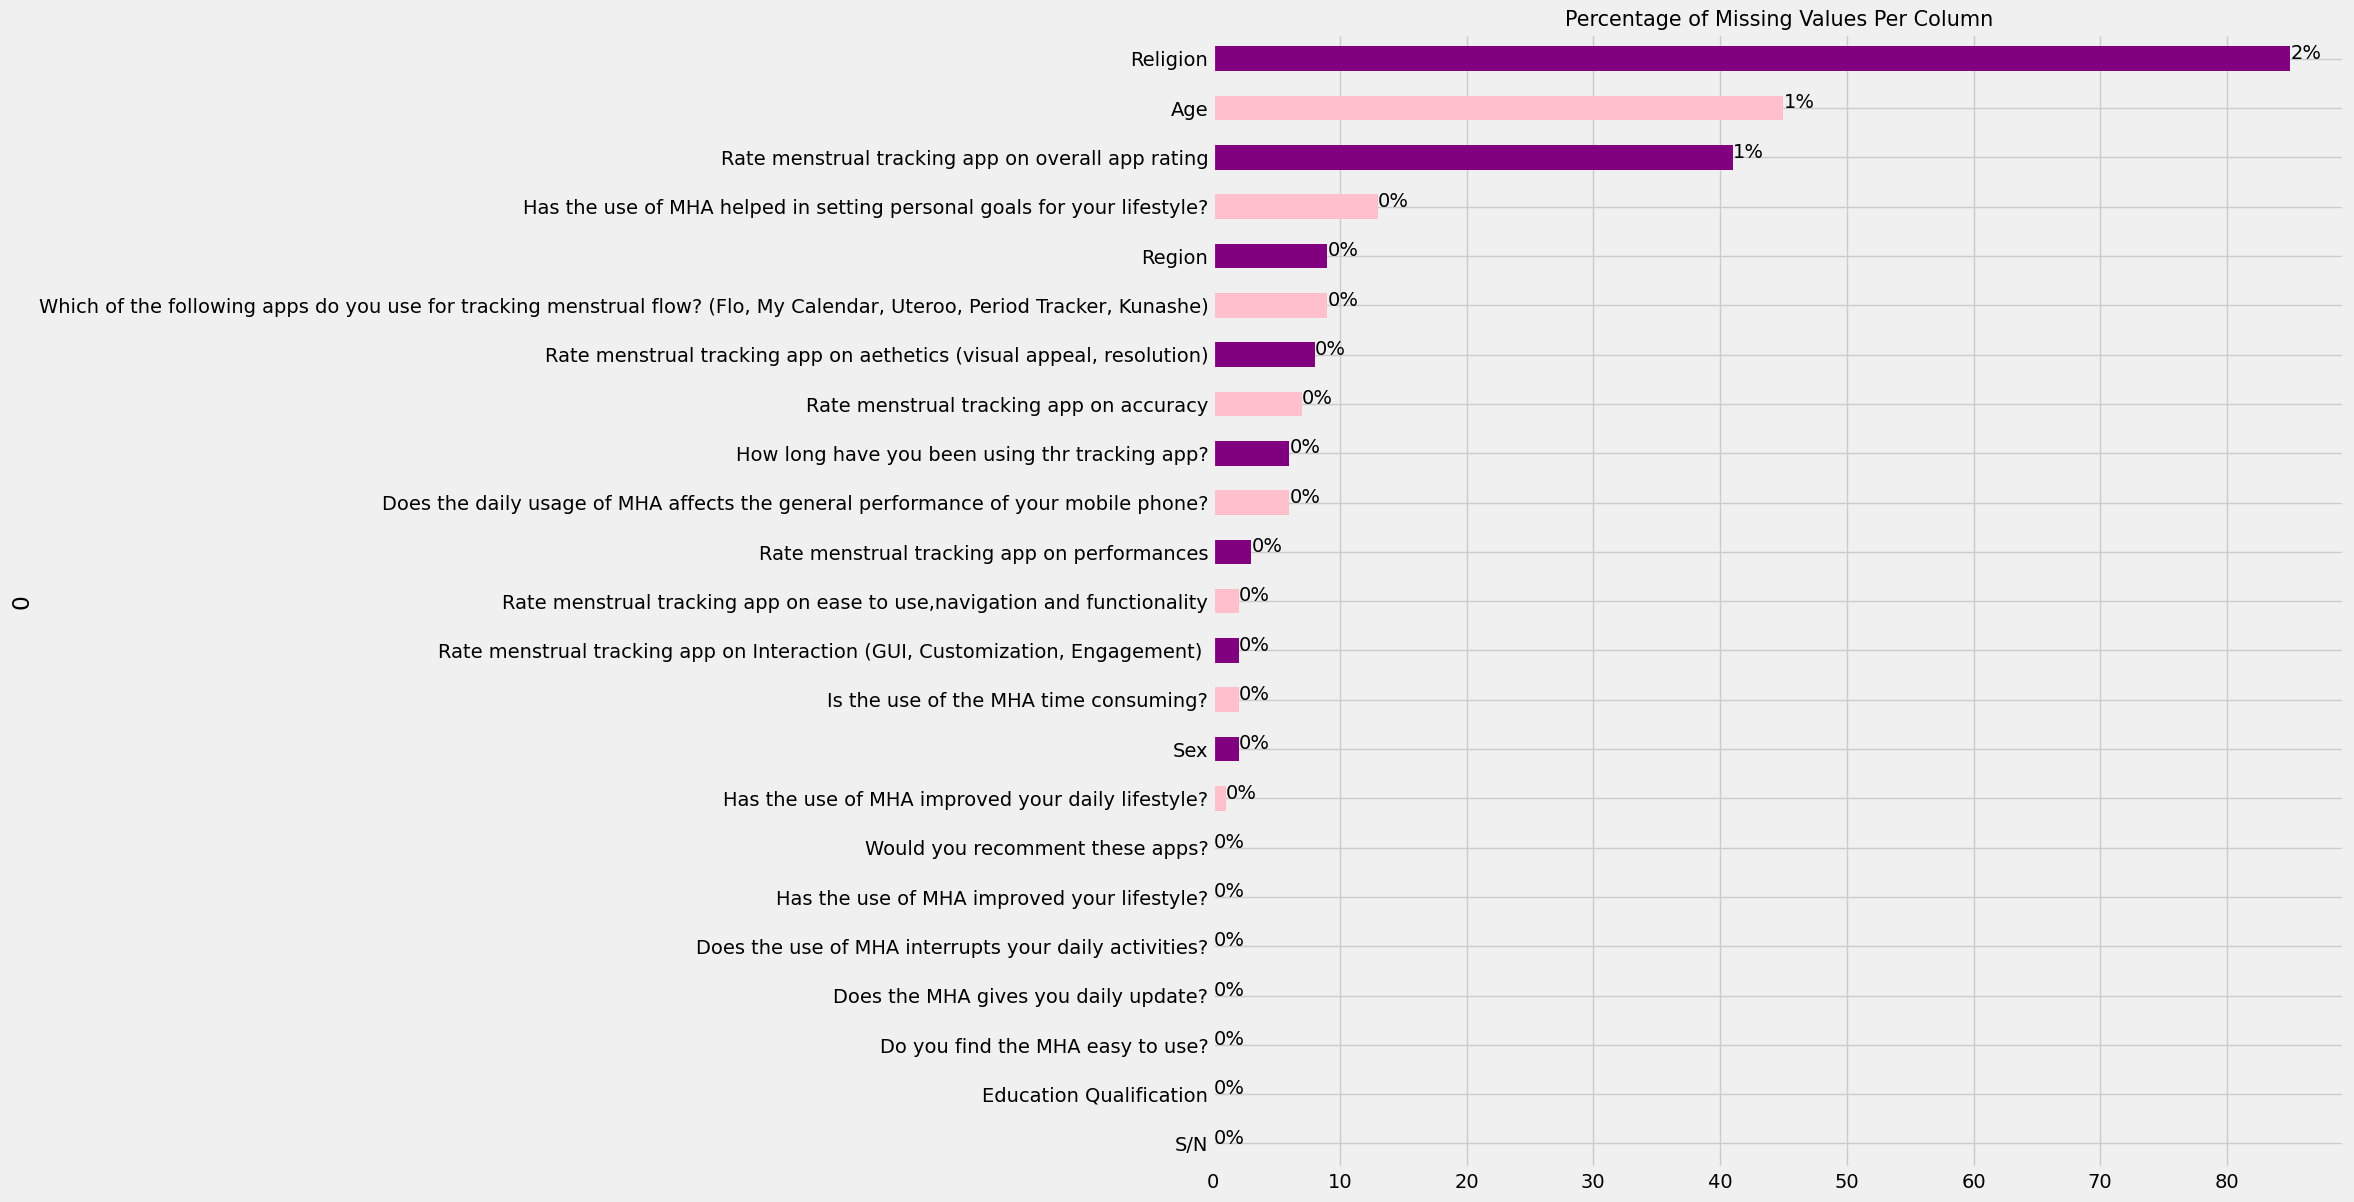

In [39]:
# Plot missing values
ax = data.isna().sum().sort_values().plot(kind = 'barh', figsize = (13, 14), color=['purple', 'pink'])
plt.title('Percentage of Missing Values Per Column', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/data.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

--**Observations**

Checking missing percentages of all the datasets shows that Religion, Age, Rate menstrual tracking app on overall app rating, has the highest missing values.


These dataset has a maximum of **2%** missing values which makes it easy in choosing the method of handling missing values which is to fill in missing values by making use of the following methods:
- Mean #suitable for numerical datasets
- Median #also suitable for numerical datasets
- Mode #most suitable for categorical datasets

Filling of missing values is the best in comparison to dropping either rows or columns as the practice will to prevent the loss of datasets.

### Defining a function for filling the missing values

In [40]:
def fill_missing(data, use_method='ffill', way='dataframe', column=None):
    '''
This function fills missing values in a dataset or individual features using various methods. It takes the following parameters:
 - dataframe: The DataFrame containing the data.
 - method: The filling method to be used (default is 'ffill' for forward fill).
 - ways: The scope of filling (default is 'dataframe' for the entire DataFrame or 'column' for a specific column).
 - column_name: The name of the column to be filled (default is 'none').

It leverages the pandas fillna method, which supports the following methods:
 - 'ffill': Forward fill (use previous value to fill missing data).
 - 'bfill': Backward fill (use subsequent value to fill missing data).
 - 'median': Fill with the median (50th percentile) of the column.
 - 'mean': Fill with the mean value of the column.
 - 'mode': Fill with the mode (most common) value in the column
    '''
    if way == 'dataframe': # Condition to check way as dataframe
        if use_method == 'ffill': # Condition to check for use method as forward fill
            data.fillna(method='ffill', inplace = True) # forward fill the missing value
            return data.isnull().sum() # Return the sum of missing values
        elif use_method == 'backfill': # Condition to check for use method as backward fill
            data.fillna(method='backfill', inplace = True) # backward fill the missing value
            return data.isnull().sum() # Return the sum of missing values
        else :
            data.fillna(use_method, inplace = True) # use impute to fill the missing value
            return data.isnull().sum() # Return the sum of missing values
    elif way == 'feature': # Condition to check way as feature
        if use_method == 'ffill': # Condition to check for use method as forward fill
            data[column].fillna(method='ffill', inplace = True) # forward fill the missing value
            return data[column].isnull().sum() # Return the sum of missing values
        elif use_method == 'backfill': # Condition to check for use method as backward fill
            data[column].fillna(method='backfill', inplace = True) # backward fill the missing value
            return data[column].isnull().sum() # Return the sum of missing values
        elif use_method == 'median': # Condition to check for use method as median
            data[column].fillna(data[column].median(), inplace = True) # Use median to fill the missing value
            return data[column].isnull().sum() # Return the sum of missing values
        elif use_method == 'mean': # Condition to check for use method as mean
            data[column].fillna(data[column].mean(), inplace = True) # Use mean to fill the missing value
            return data[column].isnull().sum() # Return the sum of missing values
        elif use_method == 'mode': # Condition to check for use method as mode
            data[column].fillna(data[column].mode()[0], inplace = True) # Use mode to fill the missing value
            return data[column].isnull().sum() # Return the sum of missing values
        else :
            data[column].fillna(use_method, inplace = True) # use impute to fill the missing value
            return data[column].isnull().sum() # Return the sum of missing values
        

In [41]:
#Filling Missing Values using mode method since its a categorical dataset
fill_missing(data)
fill_missing(data, 'mode')

0
S/N                                                                                                                        0
Education Qualification                                                                                                    0
Age                                                                                                                        0
Religion                                                                                                                   0
Sex                                                                                                                        0
Region                                                                                                                     0
Which of the following apps do you use for tracking menstrual flow? (Flo, My Calendar, Uteroo, Period Tracker, Kunashe)    0
How long have you been using thr tracking app?                                                                             

In [42]:
# Check for missing values
data.isnull().sum().any()

False

### Dropping metadata will be done

In [43]:
data = data.drop(columns ="S/N")

data.head()

0 Education Qualification                Age       Religion           Sex  \
0            Bsc/Bed/Beng        31-50 years  Christianity   Hetorosexual   
1      School Certificate        31-50 years  Christianity   Hetorosexual   
2             Msc/Med/MBA        13-30 years          Islam  Hetorosexual   
3             Msc/Med/MBA  51 years and more  Christianity   Hetorosexual   
4             Msc/Med/MBA        31-50 years  Christianity   Hetorosexual   

0          Region  \
0  United Kingdom   
1  United Kingdom   
2  United Kingdom   
3  United Kingdom   
4          Africa   

0 Which of the following apps do you use for tracking menstrual flow? (Flo, My Calendar, Uteroo, Period Tracker, Kunashe)  \
0                     Period tracker Period Calendar                                                                        
1                                        My Calendar                                                                        
2                         Flo Period & Cycle Tracker                                                                        
3                         Flo Period & Cycle Tracker                                                                        
4                                            Kunashe                                                                        

0 How long have you been using thr tracking app?  \
0                                      1-2 years   
1                                      1-2 years   
2                                      1-2 years   
3                              more than 2 years   
4                               less than a year   

0  Rate menstrual tracking app on performances  \
0                                            5   
1                                            3   
2                                            4   
3                                            4   
4                                            3   

0  Rate menstrual tracking app on Interaction (GUI, Customization, Engagement)   \
0                                                  5                              
1                                                  5                              
2                                                  4                              
3                                                  4                              
4                                                  3                              

0  Rate menstrual tracking app on ease to use,navigation and functionality  \
0                                                  4                         
1                                                  4                         
2                                                  4                         
3                                                  4                         
4                                                  4                         

0  ...  Rate menstrual tracking app on overall app rating  \
0  ...                                                  4   
1  ...                                                  5   
2  ...                                                  4   
3  ...                                                  4   
4  ...                                                  5   

0  Would you recomment these apps?  \
0                              yes   
1                              yes   
2                              yes   
3                              yes   
4                              yes   

0  Has the use of MHA improved your lifestyle?  \
0                                          yes   
1                                          yes   
2                                          yes   
3                                          yes   
4                                          yes   

0 Does the use of MHA interrupts your daily activities?  \
0                                                 no      
1                                                 no      
2  

-- **Observations**
- Missing values has been fixed.
- Dropping of metadata has been done too so we can now proceed to our Analysis proper.


<a name="EDA"></a>
## <p style="padding: 8px;color:white; display:fill;background-color:deeppink; border-radius:5px; font-size:100%"> <b>5. Exploratory Data Analysis</b>

In [44]:
def Get_summary_stats_category(data, columns):
    '''
    This function is for getting summary statistics of dataframe columns, It takes in the dataframe and relevant columns as 
    parameters, then it uses pandas methods to both get the value_counts and then get columns descriptions using the describe
    method. It then prints out the value counts and returns the summary statistics.
    '''
    stats = data[columns] # Create the stats dataframe
    for i in stats.columns : # Loop through the column
        mode_score = stats[i].mode()[0] # Get the modal score of features
        print(f'Modal value for {i} is {mode_score}') # Print the modal score of the feature
        print(f'Unique values for {i} is {stats[i].unique()}') # Print Unique values for the feature
        print(f'The number of unique values for {i} is {stats[i].nunique()}') # Print Number of Unique values for the feture
        print(f'The frequency for {mode_score} is : {stats[i].value_counts()[mode_score]}') # To get the frequency of the modal score
        modal_percent = (stats[i].value_counts()[mode_score]/len(stats[i]) * 100) # To calculate the modal percentage
                         
        print(f'The percentage of the modal score in the distribution is {modal_percent}') # Print the modal percentage
        return stats[i].value_counts().nlargest(10) # return the value_counts for the columns

<h3>1. Checking first the distribution for all the Ratings of the MHA<h3>

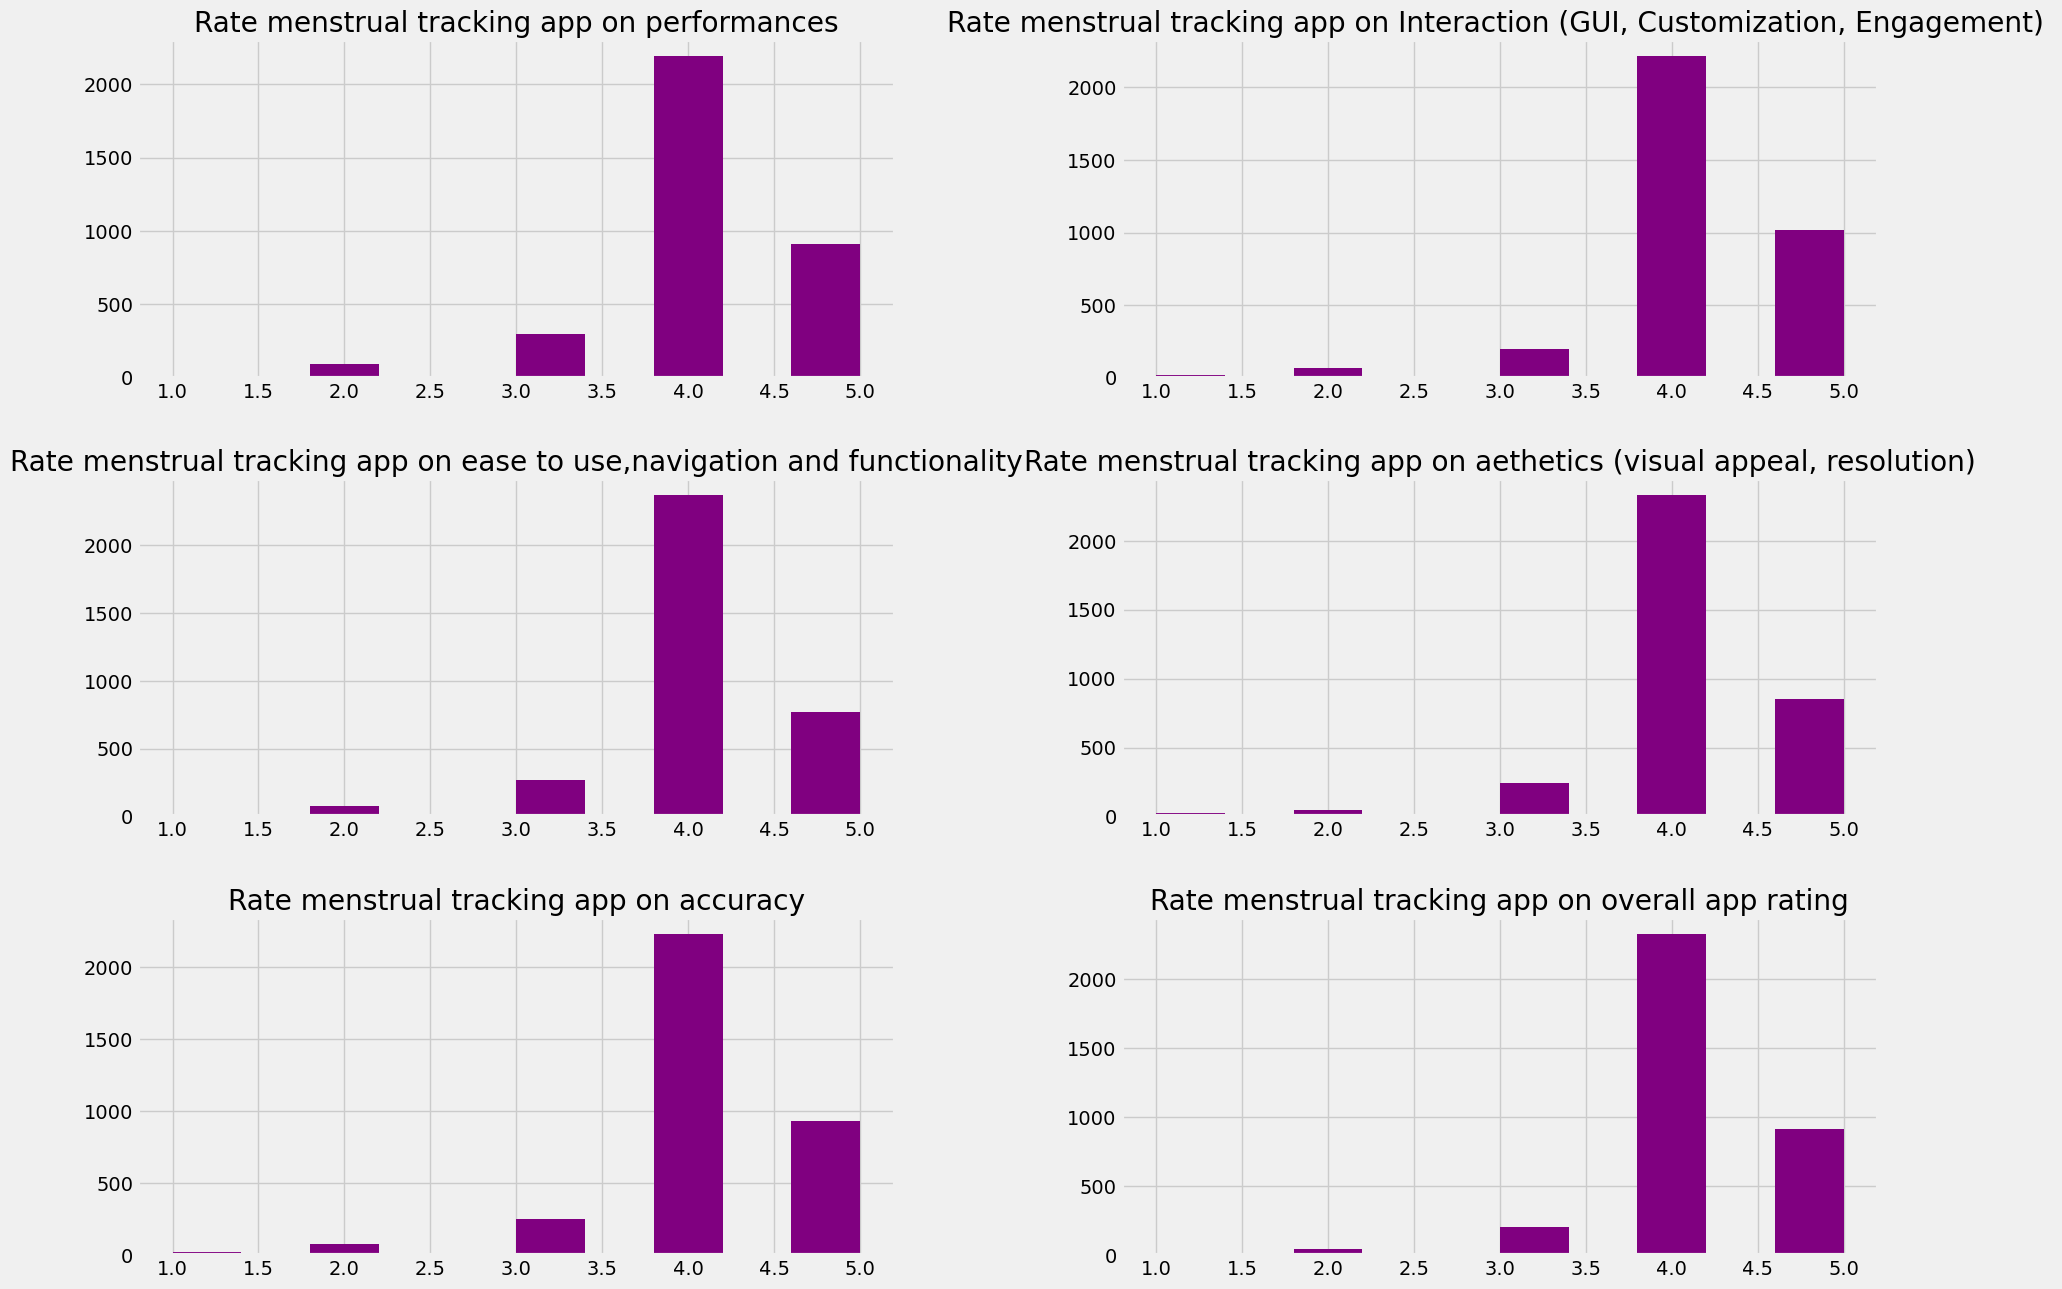

In [45]:
#By plotting Histograms for all the variable
data.hist(figsize=(20,15), color='purple')
plt.show()


-- **Observation**
- We could see clearly that the average rating for all the Mobile Health Application Scale colums is "4".

<h3>2. Checking the Educarion Qualification in the dataset</h3>

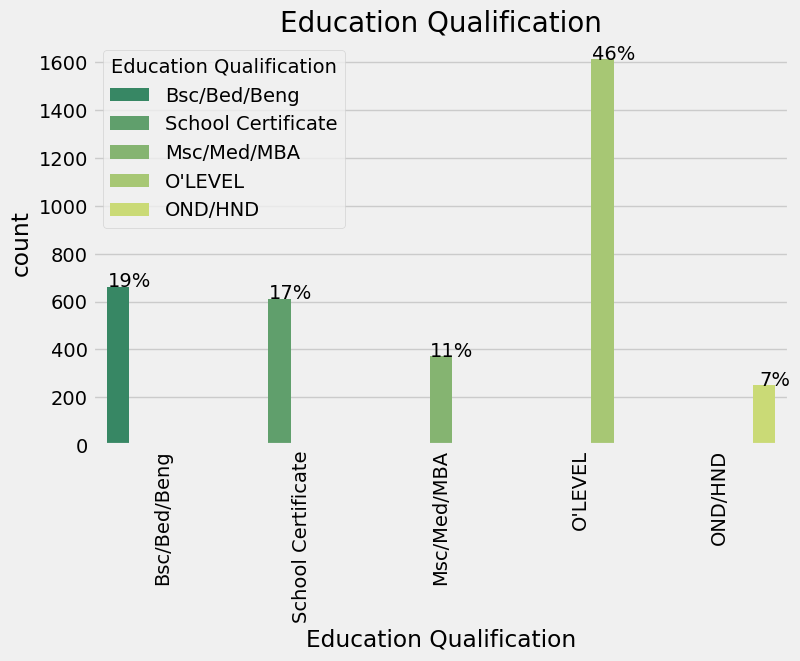

In [46]:
plt.figure(figsize=(8, 5))
total = float(len(data))
ax = sns.countplot(x=data['Education Qualification'], hue=data["Education Qualification"], palette='summer')
plt.title('Education Qualification', fontsize=20)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        percentage = '{:,.0f}%'.format(100 * height / total)
        x = p.get_x() + p.get_width()
        y = height
        ax.annotate(percentage, (x, y), ha='center')

plt.tick_params(axis='x', rotation=90)
plt.show()

In [47]:
Get_summary_stats_category(data, ['Education Qualification'])

Modal value for Education Qualification is O'LEVEL
Unique values for Education Qualification is ['Bsc/Bed/Beng' 'School Certificate' 'Msc/Med/MBA' "O'LEVEL" 'OND/HND']
The number of unique values for Education Qualification is 5
The frequency for O'LEVEL is : 1613
The percentage of the modal score in the distribution is 45.993726832050186


Education Qualification
O'LEVEL               1613
Bsc/Bed/Beng           661
School Certificate     612
Msc/Med/MBA            371
OND/HND                250
Name: count, dtype: int64

<h3>3. Checking the Age in the dataset</h3>

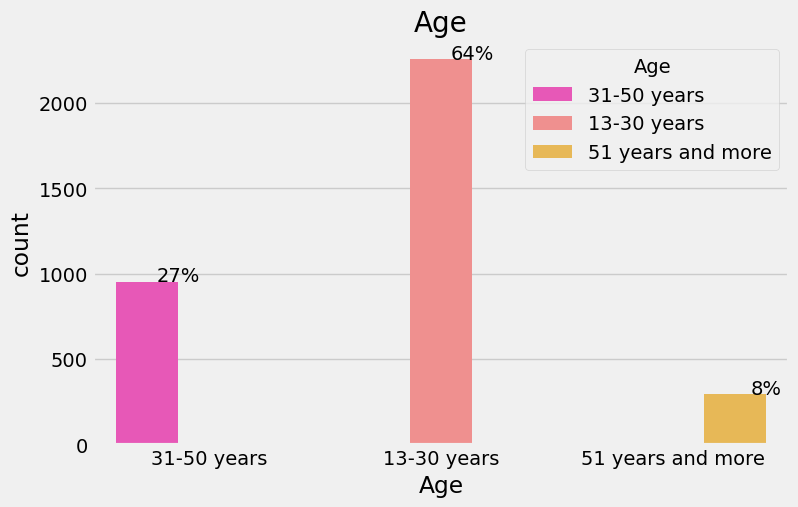

In [48]:
plt.figure(figsize=(8, 5))
total = float(len(data))
ax=sns.countplot(x=data['Age'],hue = data["Age"], palette='spring')
plt.title('Age', fontsize = 20)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        percentage = '{:,.0f}%'.format(100 * height / total)
        x = p.get_x() + p.get_width()
        y = height
        ax.annotate(percentage, (x, y), ha='center')

plt.tick_params(axis='x')
plt.show()

In [49]:
Get_summary_stats_category(data, ['Age'])

Modal value for Age is 13-30 years
Unique values for Age is ['31-50 years' '13-30 years' '51 years and more']
The number of unique values for Age is 3
The frequency for 13-30 years is : 2259
The percentage of the modal score in the distribution is 64.41402908468777


Age
13-30 years          2259
31-50 years           954
51 years and more     294
Name: count, dtype: int64

<h3>4. Checking the Religion in the dataset</h3>

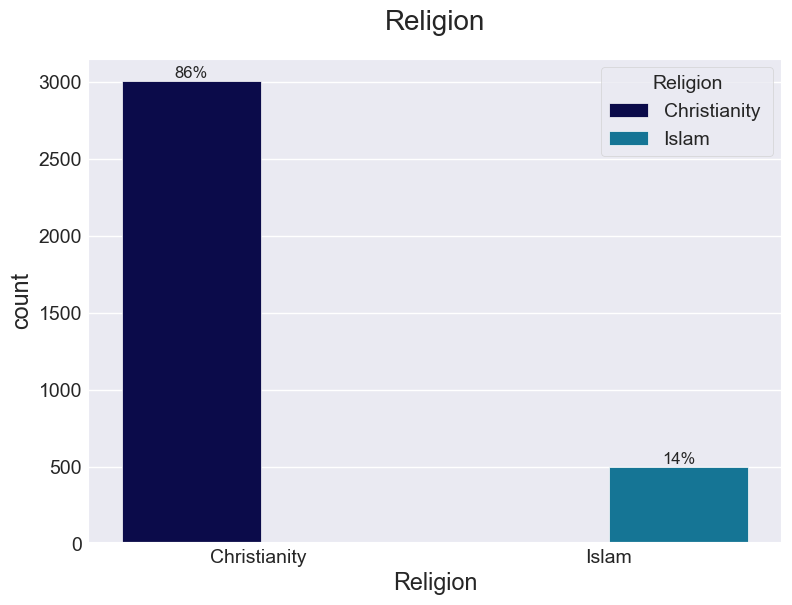

In [159]:
plt.figure(figsize=(8, 6))
total = float(len(data))
ax=sns.countplot(x=data['Religion'],hue = data["Religion"], palette='ocean')
plt.title('Religion', fontsize = 20, pad=20)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        percentage = '{:.0f}%'.format(100 * height / total)
        x = p.get_x() + p.get_width() / 2  # Calculate the center of the bar
        y = height
        ax.text(x, y, percentage, ha='center', va='bottom', fontsize=12)

plt.tick_params(axis='x')
plt.show()


In [51]:
Get_summary_stats_category(data, ['Religion'])

Modal value for Religion is Christianity 
Unique values for Religion is ['Christianity ' 'Islam']
The number of unique values for Religion is 2
The frequency for Christianity  is : 3007
The percentage of the modal score in the distribution is 85.7428001140576


Religion
Christianity     3007
Islam             500
Name: count, dtype: int64

<h3>5. Checking the Sex in the dataset</h3>

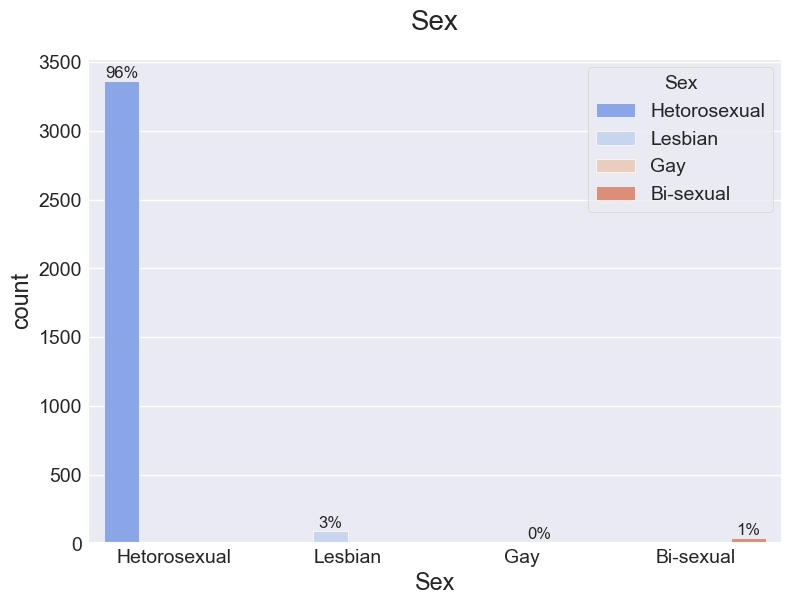

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
total = float(len(data))
ax = sns.countplot(x=data['Sex'], hue=data['Sex'], palette='coolwarm')
plt.title('Sex', fontsize=20, pad=20)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        percentage = '{:.0f}%'.format(100 * height / total)
        x = p.get_x() + p.get_width() / 2  # Calculate the center of the bar
        y = height
        ax.text(x, y, percentage, ha='center', va='bottom', fontsize=12)

plt.tick_params(axis='x')
plt.show()


In [53]:
Get_summary_stats_category(data, ['Sex'])

Modal value for Sex is Hetorosexual
Unique values for Sex is ['Hetorosexual' 'Lesbian' 'Gay' 'Bi-sexual']
The number of unique values for Sex is 4
The frequency for Hetorosexual is : 3364
The percentage of the modal score in the distribution is 95.92244083262047


Sex
Hetorosexual    3364
Lesbian           91
Bi-sexual         40
Gay               12
Name: count, dtype: int64

<h3>6. Checking the "Which of the following apps do you use for tracking menstrual flow? (Flo, My Calendar, Uteroo, Period Tracker, Kunashe)" in the dataset</h3>

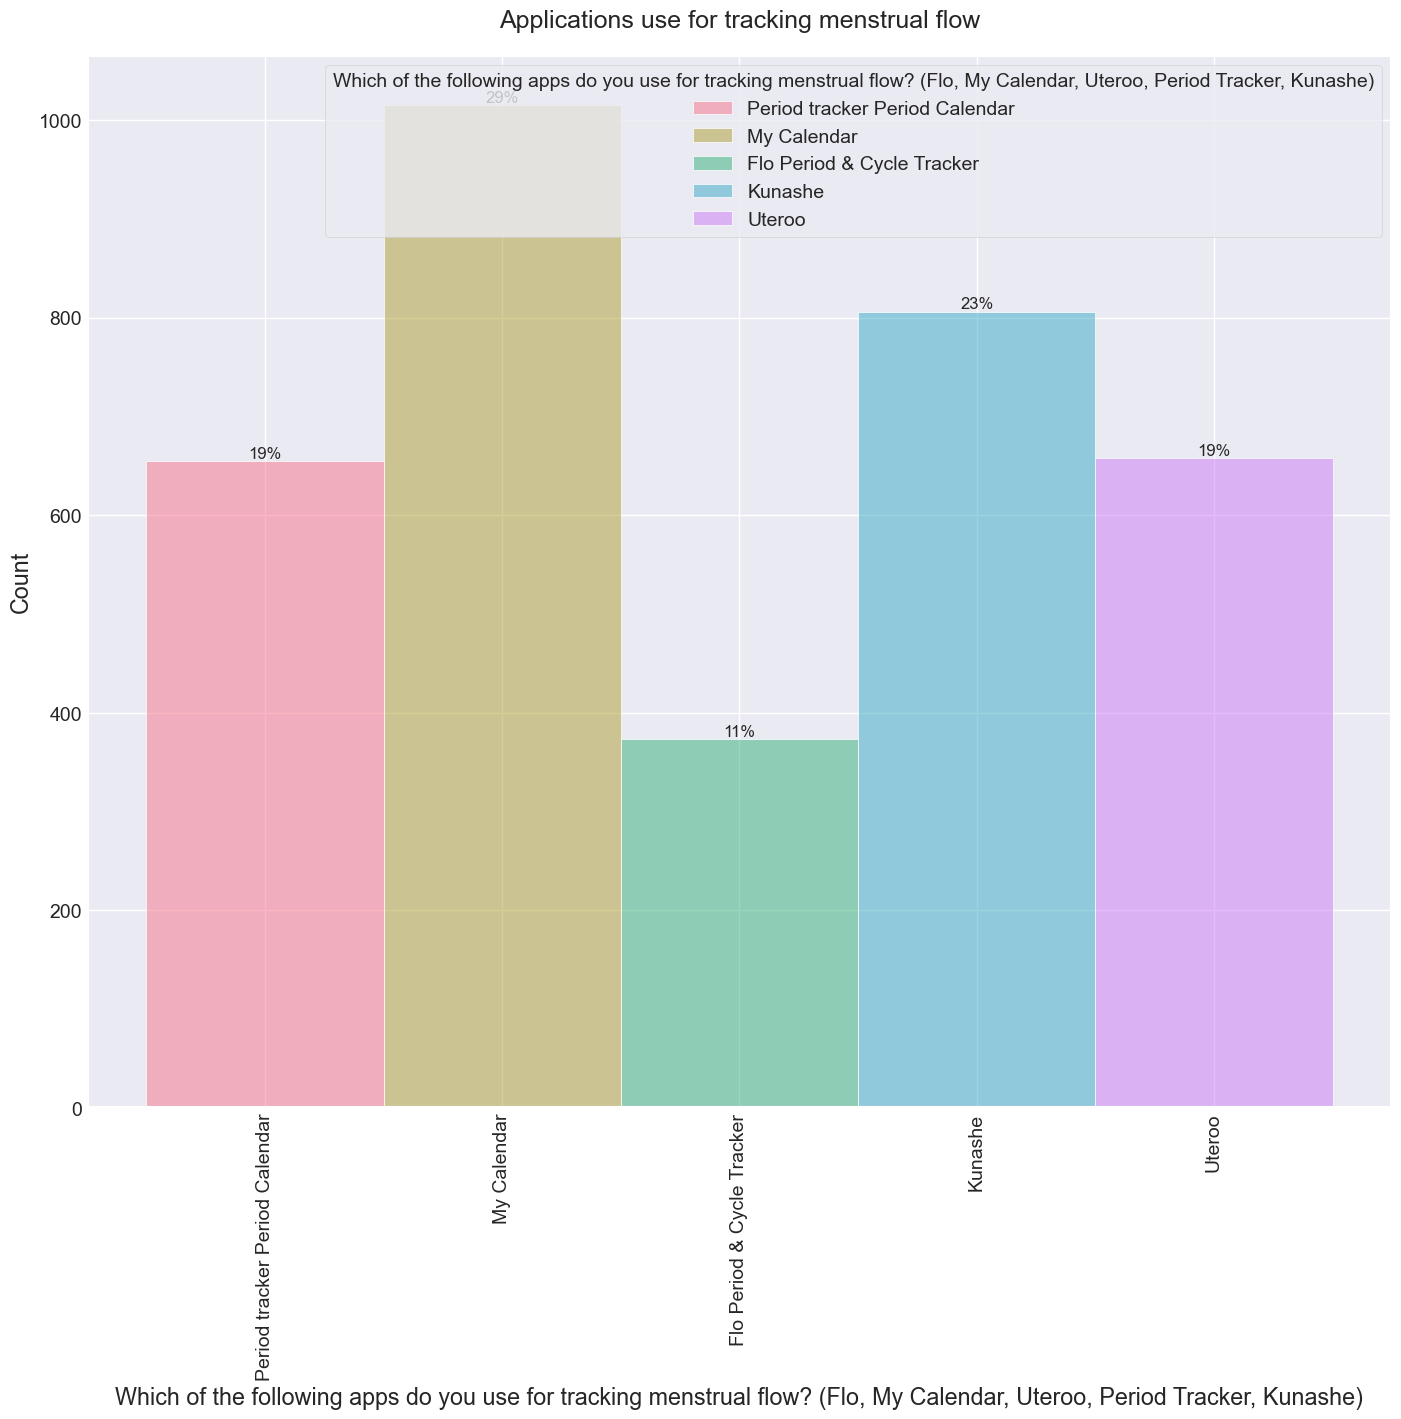

In [160]:
plt.figure(figsize=(15, 13))
total = float(len(data))
ax=sns.histplot(x=data['Which of the following apps do you use for tracking menstrual flow? (Flo, My Calendar, Uteroo, Period Tracker, Kunashe)'],hue = data["Which of the following apps do you use for tracking menstrual flow? (Flo, My Calendar, Uteroo, Period Tracker, Kunashe)"], palette='husl')
plt.title('Applications use for tracking menstrual flow', fontsize = 18, pad=20)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        percentage = '{:.0f}%'.format(100 * height / total)
        x = p.get_x() + p.get_width() / 2  # Calculate the center of the bar
        y = height
        ax.text(x, y, percentage, ha='center', va='bottom', fontsize=12)

plt.tick_params(axis='x', rotation=90)
plt.show()

In [55]:
Get_summary_stats_category(data, ['Which of the following apps do you use for tracking menstrual flow? (Flo, My Calendar, Uteroo, Period Tracker, Kunashe)'])

Modal value for Which of the following apps do you use for tracking menstrual flow? (Flo, My Calendar, Uteroo, Period Tracker, Kunashe) is My Calendar
Unique values for Which of the following apps do you use for tracking menstrual flow? (Flo, My Calendar, Uteroo, Period Tracker, Kunashe) is ['Period tracker Period Calendar' 'My Calendar'
 'Flo Period & Cycle Tracker' 'Kunashe' 'Uteroo']
The number of unique values for Which of the following apps do you use for tracking menstrual flow? (Flo, My Calendar, Uteroo, Period Tracker, Kunashe) is 5
The frequency for My Calendar is : 1015
The percentage of the modal score in the distribution is 28.942115768463072


Which of the following apps do you use for tracking menstrual flow? (Flo, My Calendar, Uteroo, Period Tracker, Kunashe)
My Calendar                       1015
Kunashe                            806
Uteroo                             658
Period tracker Period Calendar     655
Flo Period & Cycle Tracker         373
Name: count, dtype: int64

-- **Observations**
- We could also that My Calendar app is the favourite of most of the population followed by the Kunashe with Flo Period & Cycle Tracker being the last.

<h3>7. Checking the "How long have you been using thr tracking app?" in the dataset</h3>

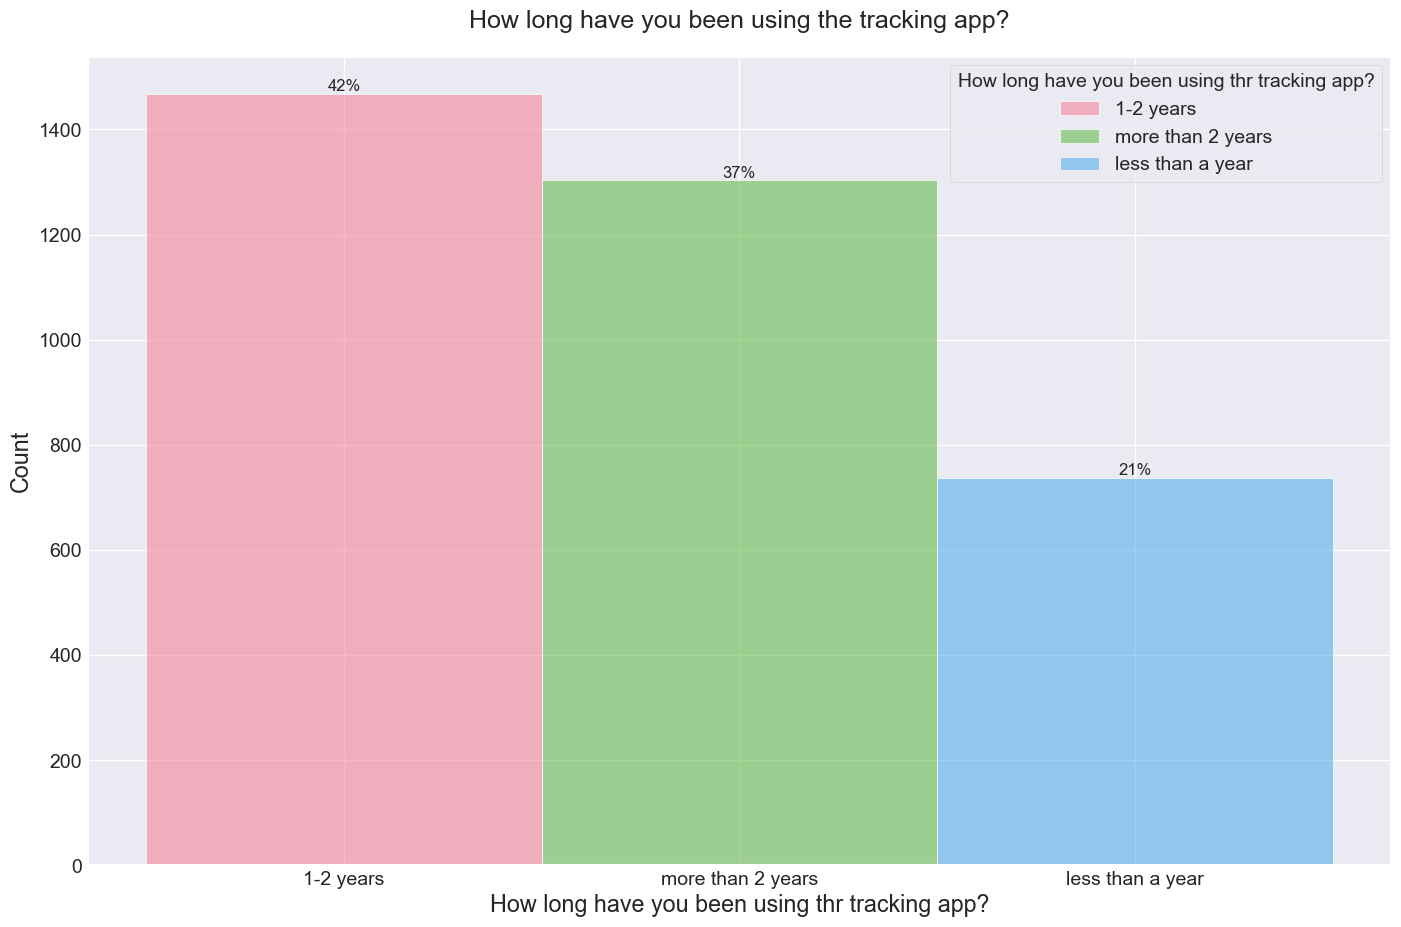

In [161]:
plt.figure(figsize=(15, 10))
total = float(len(data))
ax=sns.histplot(x=data['How long have you been using thr tracking app?'],hue = data["How long have you been using thr tracking app?"], palette='husl')
plt.title('How long have you been using the tracking app?', fontsize = 18, pad=20)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        percentage = '{:.0f}%'.format(100 * height / total)
        x = p.get_x() + p.get_width() / 2  
        y = height
        ax.text(x, y, percentage, ha='center', va='bottom', fontsize=12)

plt.tick_params(axis='x')
plt.show()


In [57]:
Get_summary_stats_category(data, ['How long have you been using thr tracking app?'])

Modal value for How long have you been using thr tracking app? is 1-2 years
Unique values for How long have you been using thr tracking app? is ['1-2 years' 'more than 2 years' 'less than a year']
The number of unique values for How long have you been using thr tracking app? is 3
The frequency for 1-2 years is : 1467
The percentage of the modal score in the distribution is 41.830624465355


How long have you been using thr tracking app?
1-2 years            1467
more than 2 years    1303
less than a year      737
Name: count, dtype: int64

<h3>8. Checking the "Would you recomment these apps?" in the dataset</h3>

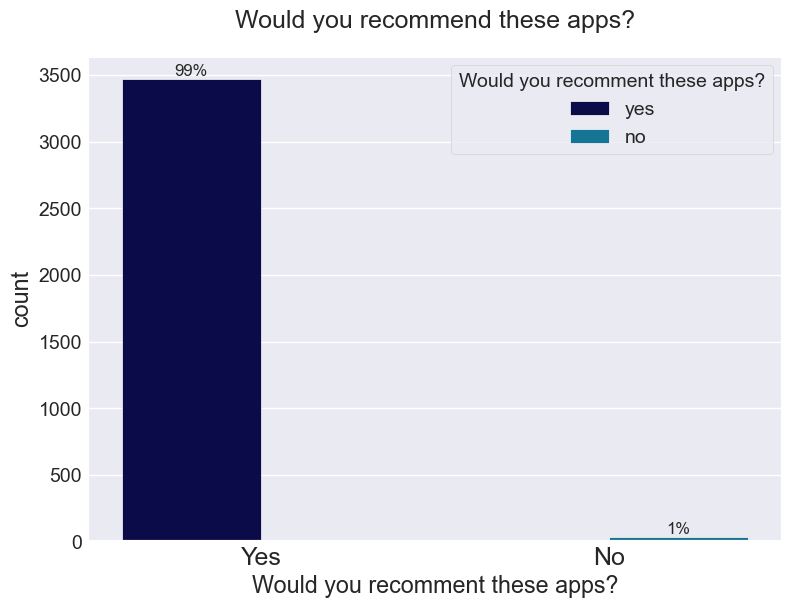

In [170]:
plt.figure(figsize=(8, 6))
total = float(len(data))
ax=sns.countplot(x=data['Would you recomment these apps?'],hue = data["Would you recomment these apps?"], palette='ocean')
plt.title('Would you recommend these apps?', fontsize = 18, pad=20)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        percentage = '{:.0f}%'.format(100 * height / total)
        x = p.get_x() + p.get_width() / 2  # Calculate the center of the bar
        y = height
        ax.text(x, y, percentage, ha='center', va='bottom', fontsize=12)

ax.set_xticklabels(ax.get_xticklabels())  # Center the x-axis labels

plt.tick_params(axis='x')
plt.show()


In [59]:
Get_summary_stats_category(data, ['Would you recomment these apps?'])

Modal value for Would you recomment these apps? is yes
Unique values for Would you recomment these apps? is ['yes' 'no']
The number of unique values for Would you recomment these apps? is 2
The frequency for yes is : 3474
The percentage of the modal score in the distribution is 99.0590248075278


Would you recomment these apps?
yes    3474
no       33
Name: count, dtype: int64

--**Observations**
- 99% of the population will convinently recommend these apps.

<h3>9. Checking the "Has the use of MHA improved your lifestyle?" in the dataset</h3>

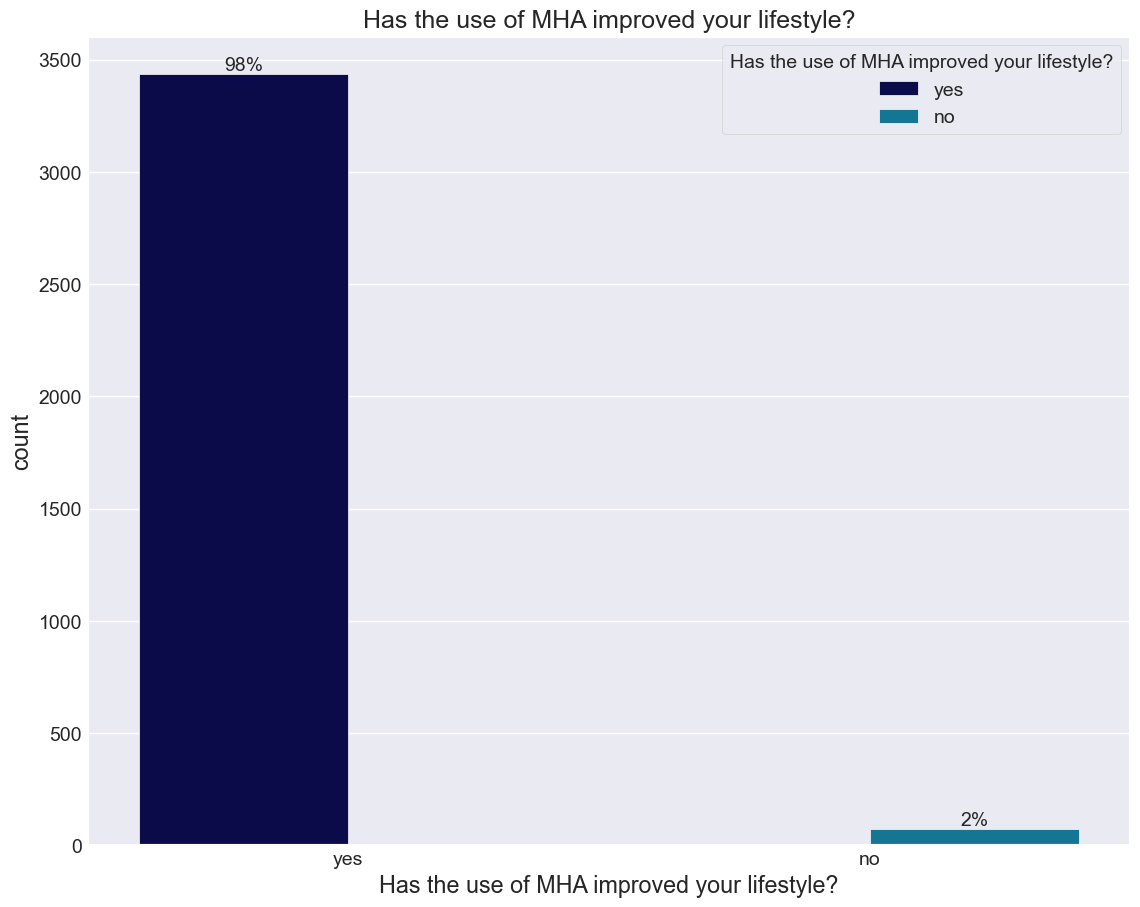

In [202]:
plt.figure(figsize=(12, 10))
total = float(len(data))
ax=sns.countplot(x=data['Has the use of MHA improved your lifestyle?'],hue = data["Has the use of MHA improved your lifestyle?"], palette='ocean')
plt.title('Has the use of MHA improved your lifestyle?', fontsize = 18)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        percentage = '{:.0f}%'.format(100 * height / total)
        x = p.get_x() + p.get_width() / 2  # Calculate the center of the bar
        y = height
        ax.text(x, y, percentage, ha='center', va='bottom', fontsize=14)

ax.set_xticklabels(ax.get_xticklabels())  # Center the x-axis labels

plt.tick_params(axis='x')
plt.show()

In [61]:
Get_summary_stats_category(data, ['Has the use of MHA improved your lifestyle?'])

Modal value for Has the use of MHA improved your lifestyle? is yes
Unique values for Has the use of MHA improved your lifestyle? is ['yes' 'no']
The number of unique values for Has the use of MHA improved your lifestyle? is 2
The frequency for yes is : 3435
The percentage of the modal score in the distribution is 97.9469632164243


Has the use of MHA improved your lifestyle?
yes    3435
no       72
Name: count, dtype: int64

--**Observations**
- 97.9% of the population strongly believe that the use of MHA improved their lifestyles.

<h3>10. Checking the "Does the use of MHA interrupts your daily activities?" in the dataset</h3>

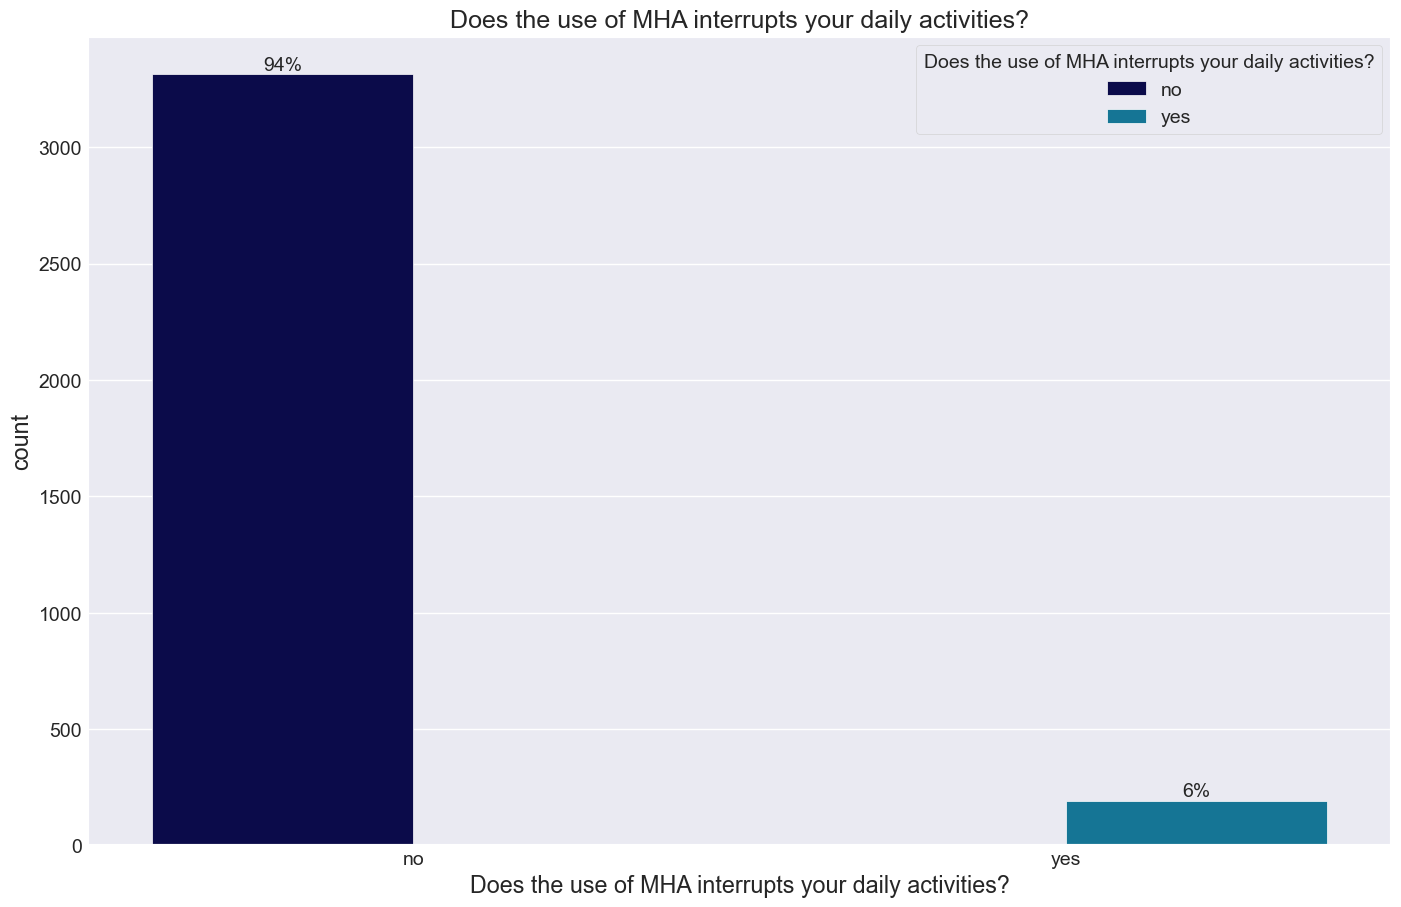

In [177]:
plt.figure(figsize=(15, 10))
total = float(len(data))
ax=sns.countplot(x=data['Does the use of MHA interrupts your daily activities?'],hue = data["Does the use of MHA interrupts your daily activities?"], palette='ocean')
plt.title('Does the use of MHA interrupts your daily activities?', fontsize = 18)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        percentage = '{:.0f}%'.format(100 * height / total)
        x = p.get_x() + p.get_width() / 2  # Calculate the center of the bar
        y = height
        ax.text(x, y, percentage, ha='center', va='bottom', fontsize=14)

ax.set_xticklabels(ax.get_xticklabels())  # Center the x-axis labels

plt.tick_params(axis='x')
plt.show()

In [63]:
Get_summary_stats_category(data, ['Does the use of MHA interrupts your daily activities?'])

Modal value for Does the use of MHA interrupts your daily activities? is no
Unique values for Does the use of MHA interrupts your daily activities? is ['no' 'yes']
The number of unique values for Does the use of MHA interrupts your daily activities? is 2
The frequency for no is : 3314
The percentage of the modal score in the distribution is 94.49672084402624


Does the use of MHA interrupts your daily activities?
no     3314
yes     193
Name: count, dtype: int64

--**Observations**
- 94% of the population strongly believe that the use of MHA does not interrupts their daily activities while about 6% disagree. So we might have a reason to check the app this 6% are using and while they feel it interrupts their daily activities.

<h3>11. Checking the "Does the MHA gives you daily update?" in the dataset</h3>

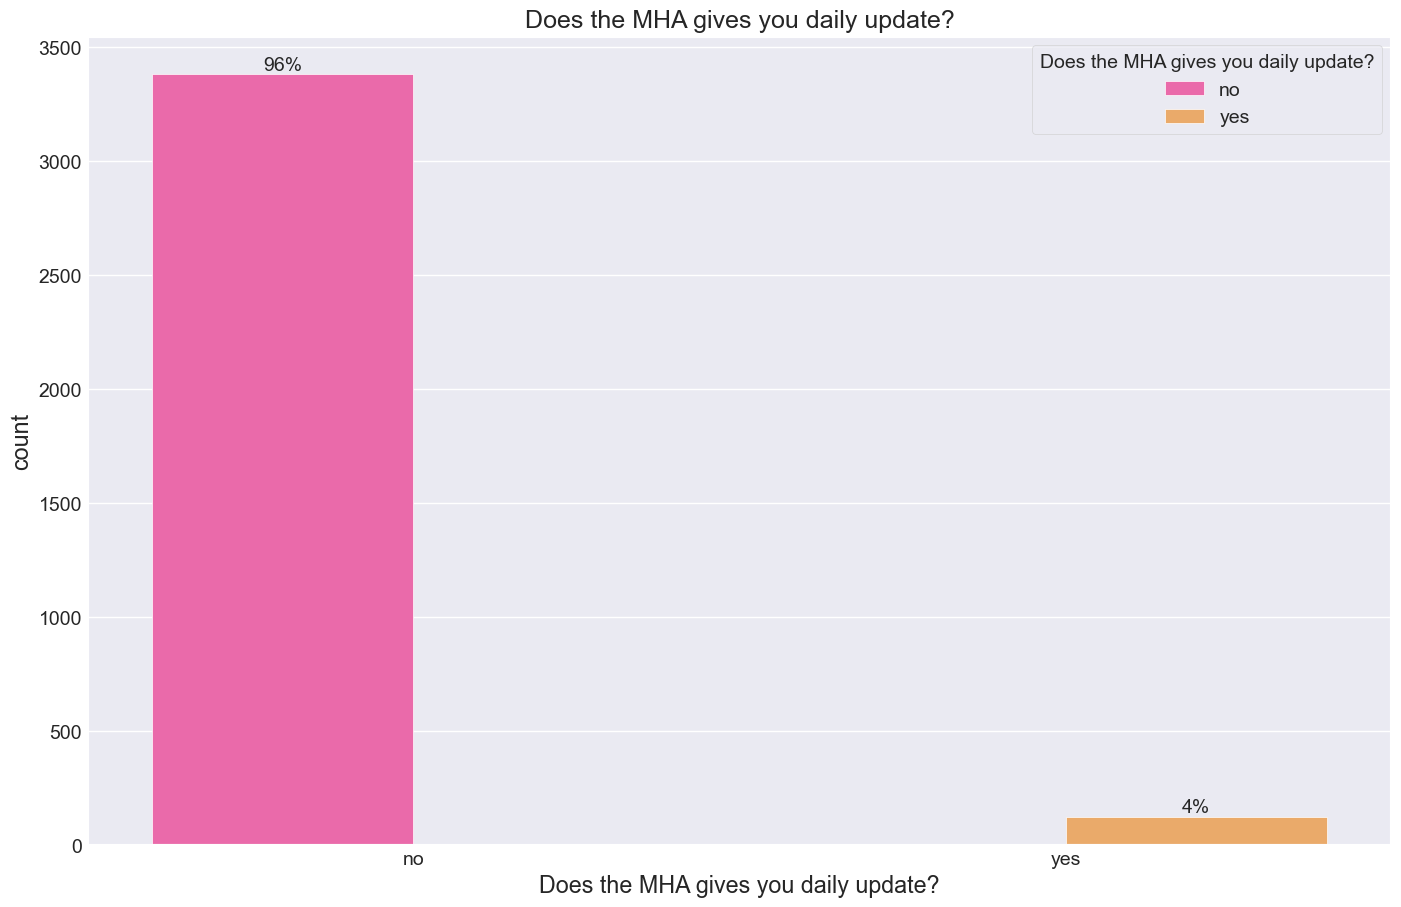

In [174]:
plt.figure(figsize=(15, 10))
total = float(len(data))
ax=sns.countplot(x=data['Does the MHA gives you daily update?'],hue = data["Does the MHA gives you daily update?"], palette='spring')
plt.title('Does the MHA gives you daily update?', fontsize = 18)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        percentage = '{:.0f}%'.format(100 * height / total)
        x = p.get_x() + p.get_width() / 2  # Calculate the center of the bar
        y = height
        ax.text(x, y, percentage, ha='center', va='bottom', fontsize=14)


plt.tick_params(axis='x')
plt.show()

In [65]:
Get_summary_stats_category(data, ['Does the MHA gives you daily update?'])

Modal value for Does the MHA gives you daily update? is no
Unique values for Does the MHA gives you daily update? is ['no' 'yes']
The number of unique values for Does the MHA gives you daily update? is 2
The frequency for no is : 3380
The percentage of the modal score in the distribution is 96.37867122897063


Does the MHA gives you daily update?
no     3380
yes     127
Name: count, dtype: int64

--**Observations**
- 96% of the population recieve daily updates from their respective MHA while only 4% claims not to recieve update from their MHA. We both check the Apps that has the highest number of the 4% and possible reason this happens.

<h3>12. Checking the "Is the use of the MHA time consuming?" in the dataset</h3>

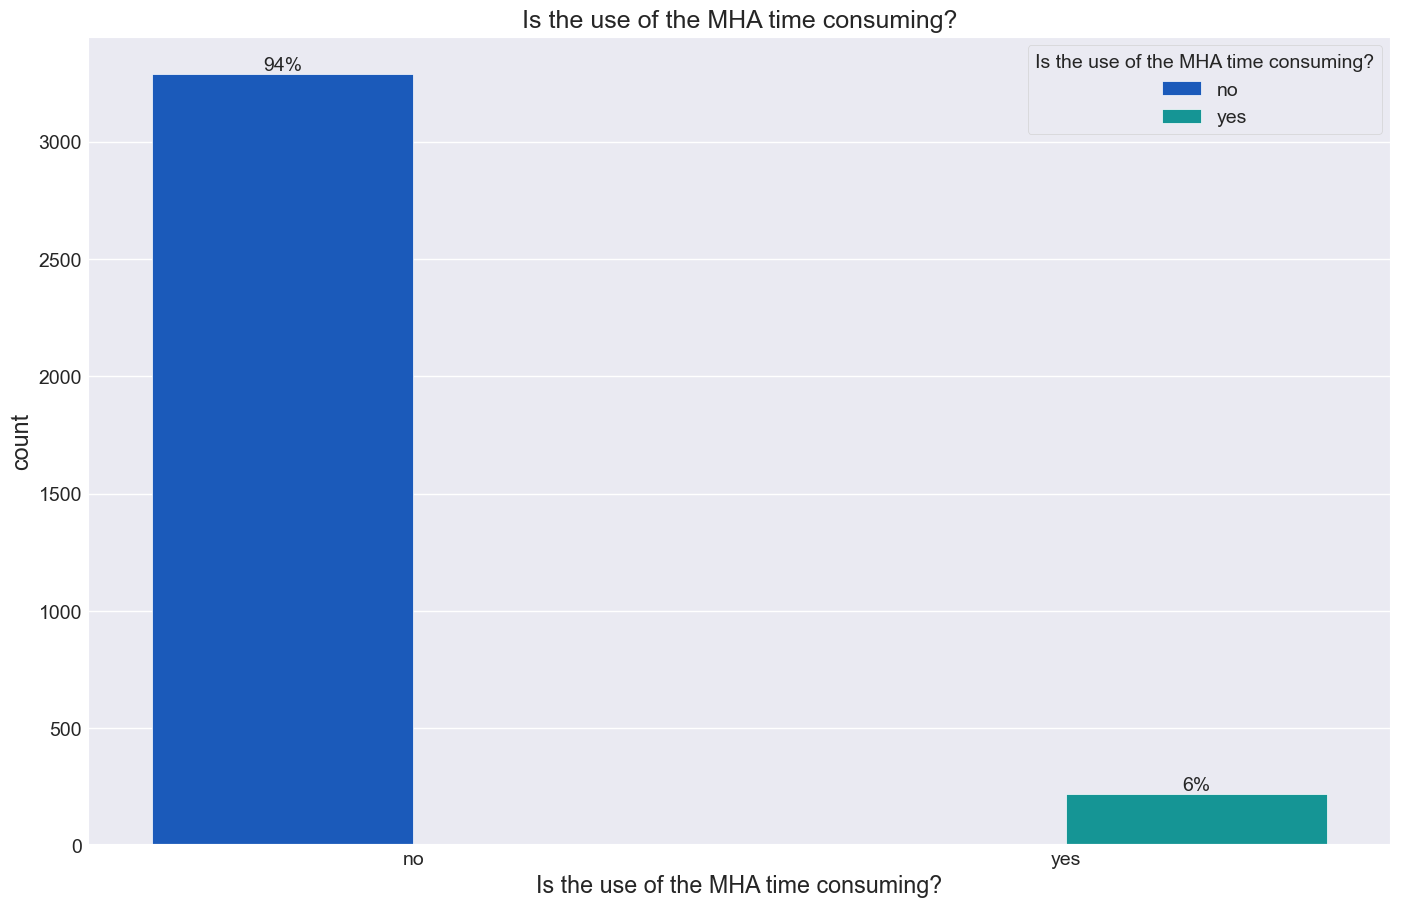

In [175]:
plt.figure(figsize=(15, 10))
total = float(len(data))
ax=sns.countplot(x=data['Is the use of the MHA time consuming?'],hue = data["Is the use of the MHA time consuming?"], palette='winter')
plt.title('Is the use of the MHA time consuming?', fontsize = 18)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        percentage = '{:.0f}%'.format(100 * height / total)
        x = p.get_x() + p.get_width() / 2  # Calculate the center of the bar
        y = height
        ax.text(x, y, percentage, ha='center', va='bottom', fontsize=14)


plt.tick_params(axis='x')
plt.show()

In [67]:
Get_summary_stats_category(data, ['Is the use of the MHA time consuming?'])

Modal value for Is the use of the MHA time consuming? is no
Unique values for Is the use of the MHA time consuming? is ['no' 'yes']
The number of unique values for Is the use of the MHA time consuming? is 2
The frequency for no is : 3288
The percentage of the modal score in the distribution is 93.75534644995723


Is the use of the MHA time consuming?
no     3288
yes     219
Name: count, dtype: int64

--**Observations**
- 94% of the population strongly believe that the use of MHA is not time consuming while about 6% disagree. **So we might have a reason to check the app this 6% are using and check its correlation with the initial 6% that has a complain about their MHA interuppting their daily activities**.

<h3>13. Checking the "Do you find the MHA easy to use?" in the dataset</h3>

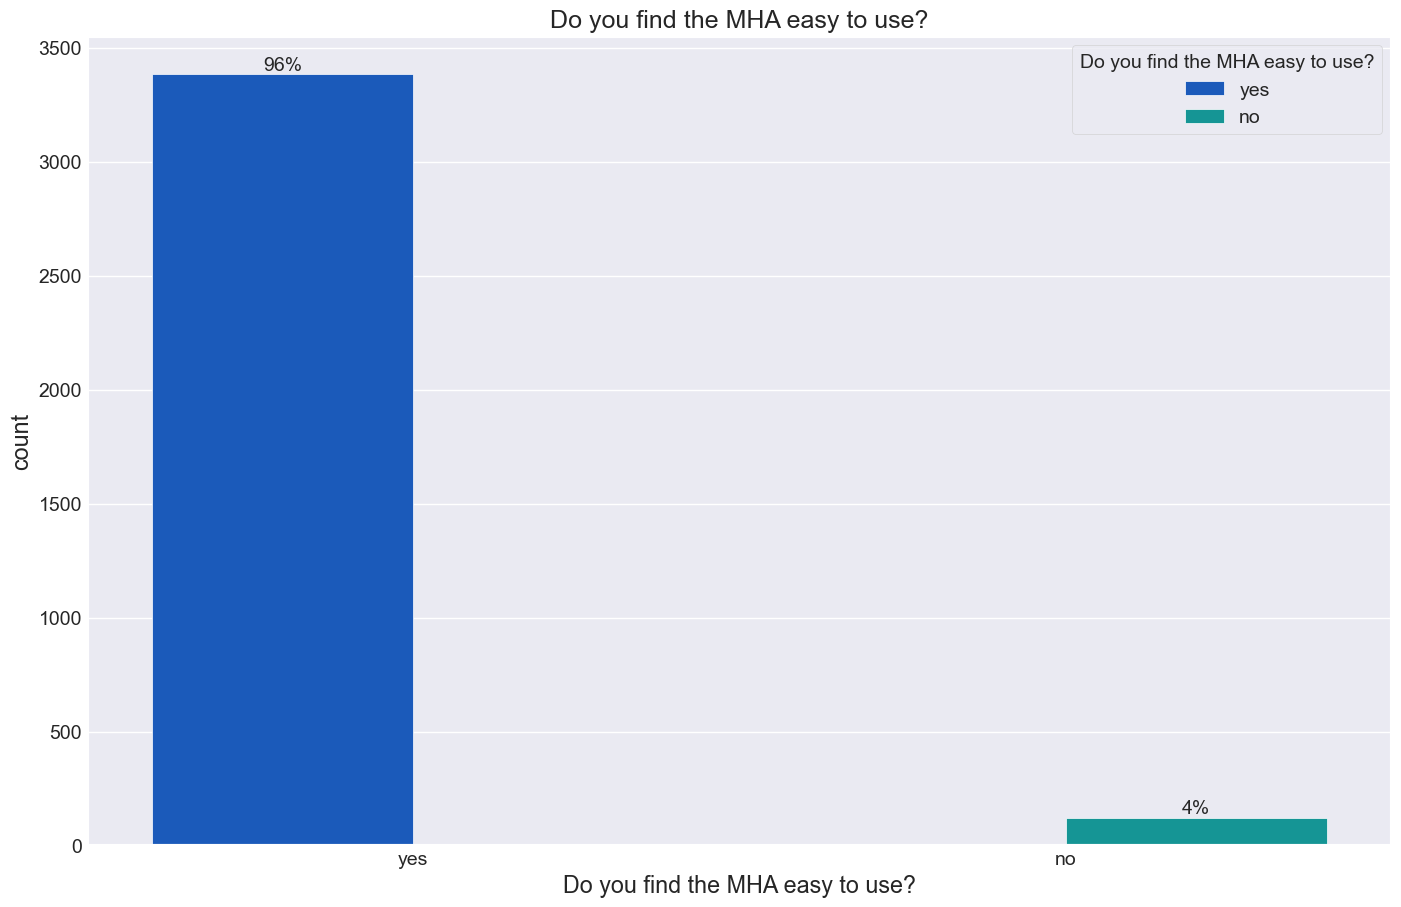

In [183]:
plt.figure(figsize=(15, 10))
total = float(len(data))
ax=sns.countplot(x=data['Do you find the MHA easy to use?'],hue = data["Do you find the MHA easy to use?"], palette='winter')
plt.title('Do you find the MHA easy to use?', fontsize = 18)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        percentage = '{:.0f}%'.format(100 * height / total)
        x = p.get_x() + p.get_width() / 2
        y = height
        ax.text(x, y, percentage, ha='center', va='bottom', fontsize=14) 


plt.tick_params(axis='x')
plt.show()

In [69]:
Get_summary_stats_category(data, ['Do you find the MHA easy to use?'])

Modal value for Do you find the MHA easy to use? is yes
Unique values for Do you find the MHA easy to use? is ['yes' 'no']
The number of unique values for Do you find the MHA easy to use? is 2
The frequency for yes is : 3384
The percentage of the modal score in the distribution is 96.49272882805818


Do you find the MHA easy to use?
yes    3384
no      123
Name: count, dtype: int64

--**Observations**
- 96% of the population found MHA easy to use while about 4% disagree.

<h3>14. Checking the "Has the use of MHA improved your daily lifestyle?" in the dataset</h3>

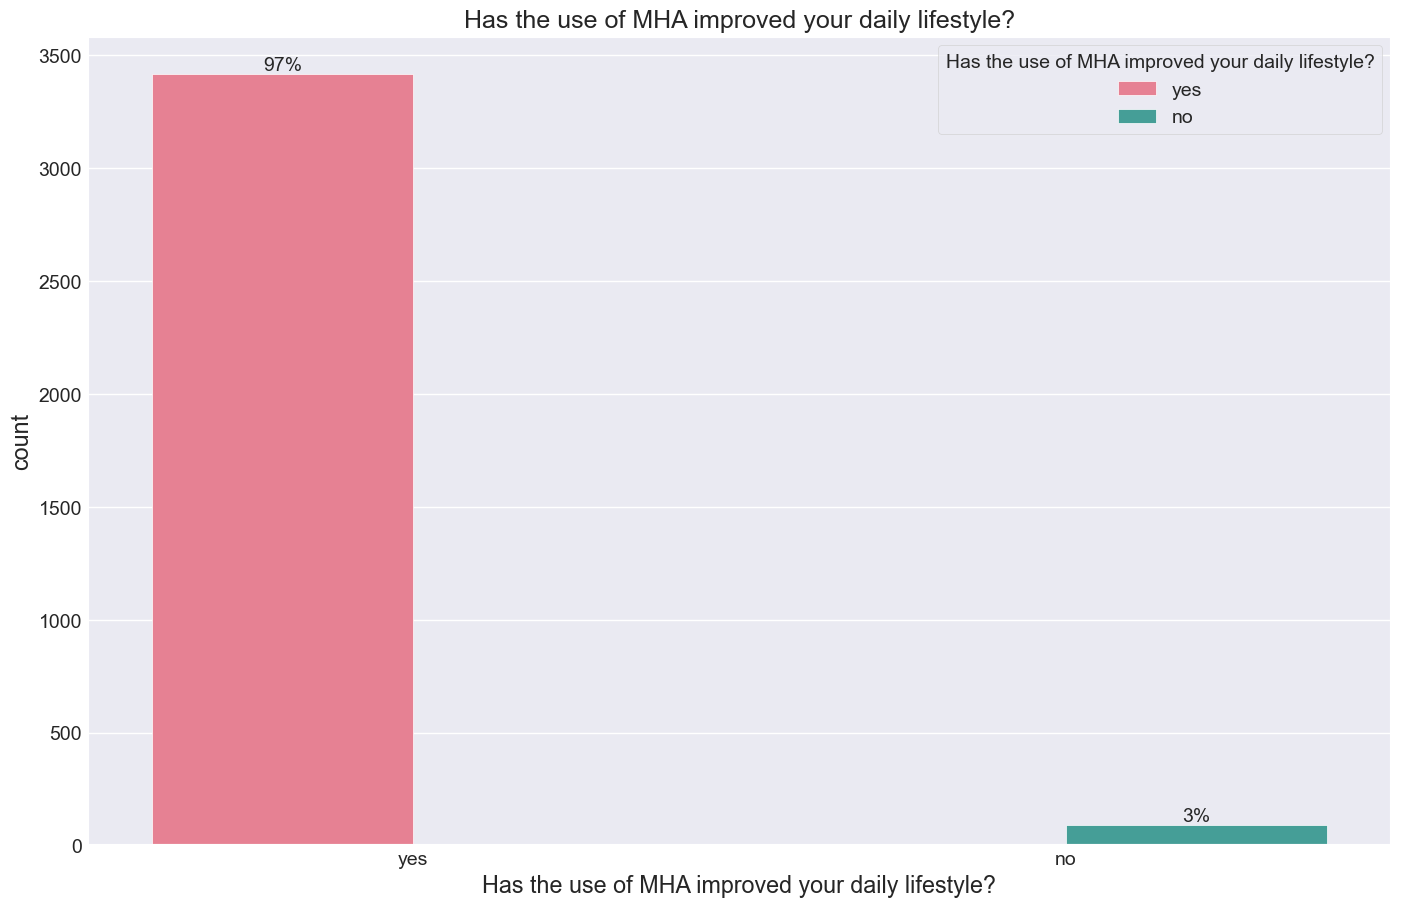

In [180]:
plt.figure(figsize=(15, 10))
total = float(len(data))
ax=sns.countplot(x=data['Has the use of MHA improved your daily lifestyle?'],hue = data["Has the use of MHA improved your daily lifestyle?"], palette='husl')
plt.title('Has the use of MHA improved your daily lifestyle?', fontsize = 18)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        percentage = '{:.0f}%'.format(100 * height / total)
        x = p.get_x() + p.get_width() / 2
        y = height
        ax.text(x, y, percentage, ha='center', va='bottom', fontsize=14) 


plt.tick_params(axis='x')

In [71]:
Get_summary_stats_category(data, ['Has the use of MHA improved your daily lifestyle?'])

Modal value for Has the use of MHA improved your daily lifestyle? is yes
Unique values for Has the use of MHA improved your daily lifestyle? is ['yes' 'no']
The number of unique values for Has the use of MHA improved your daily lifestyle? is 2
The frequency for yes is : 3416
The percentage of the modal score in the distribution is 97.40518962075848


Has the use of MHA improved your daily lifestyle?
yes    3416
no       91
Name: count, dtype: int64

--**Observations**
- MHA has improved 97% daily lifestyle of its' users

<h3>15. Checking the "Has the use of MHA helped in setting personal goals for your lifestyle?" in the dataset</h3>

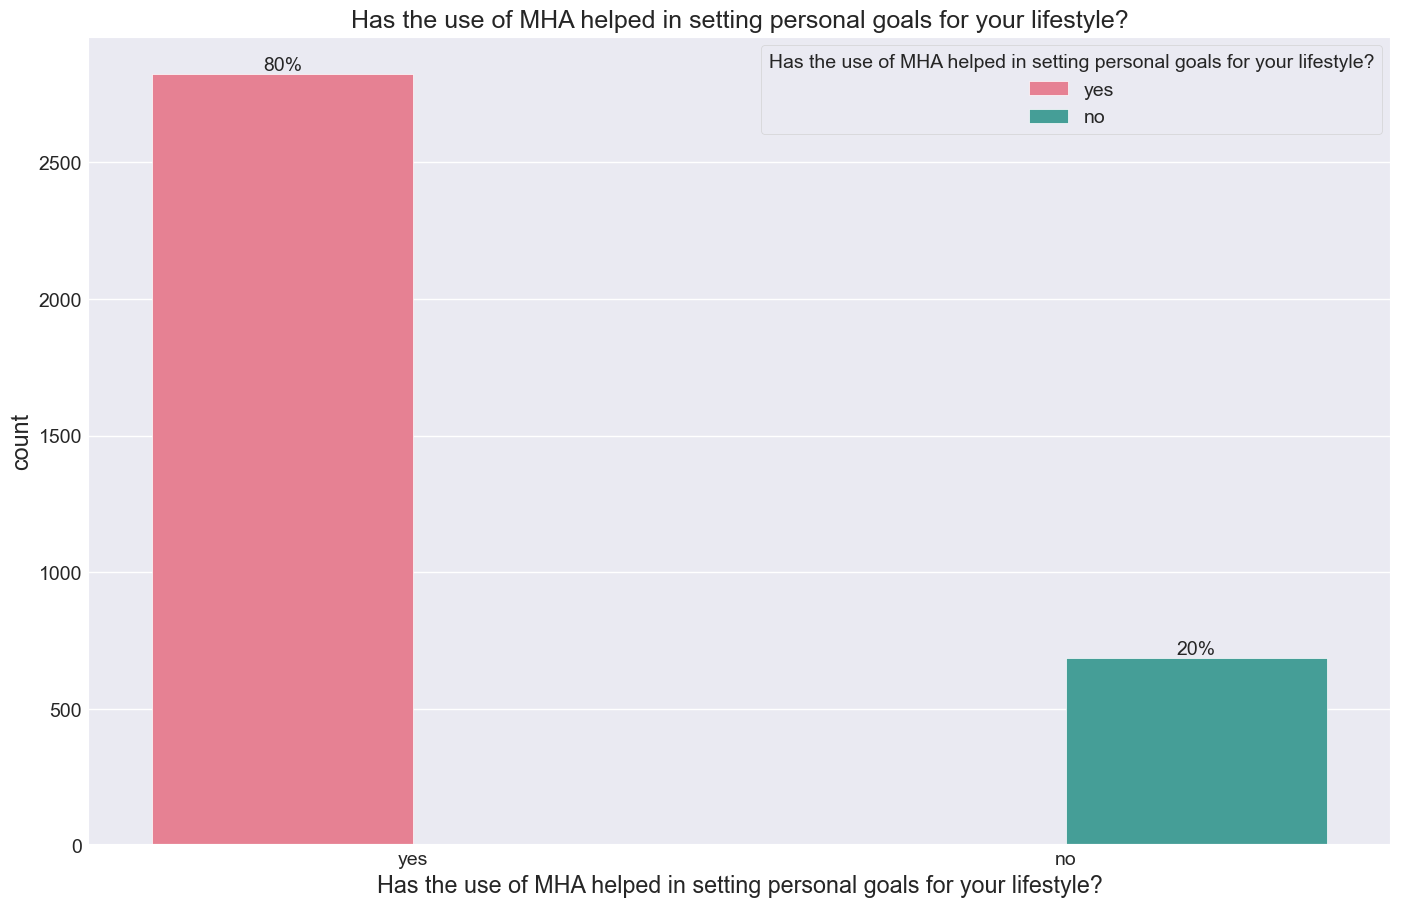

In [182]:
plt.figure(figsize=(15, 10))
total = float(len(data))
ax=sns.countplot(x=data['Has the use of MHA helped in setting personal goals for your lifestyle?'],hue = data["Has the use of MHA helped in setting personal goals for your lifestyle?"], palette='husl')
plt.title('Has the use of MHA helped in setting personal goals for your lifestyle?', fontsize = 18)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        percentage = '{:.0f}%'.format(100 * height / total)
        x = p.get_x() + p.get_width() / 2
        y = height
        ax.text(x, y, percentage, ha='center', va='bottom', fontsize=14) 


plt.tick_params(axis='x')
plt.show()

In [73]:
Get_summary_stats_category(data, ['Has the use of MHA helped in setting personal goals for your lifestyle?'])

Modal value for Has the use of MHA helped in setting personal goals for your lifestyle? is yes
Unique values for Has the use of MHA helped in setting personal goals for your lifestyle? is ['yes' 'no']
The number of unique values for Has the use of MHA helped in setting personal goals for your lifestyle? is 2
The frequency for yes is : 2822
The percentage of the modal score in the distribution is 80.46763615625892


Has the use of MHA helped in setting personal goals for your lifestyle?
yes    2822
no      685
Name: count, dtype: int64

--**Observations**
- MHA has helped 80% users in setting personal goals for their lifestyle.

<h3>16. Checking the "Does the daily usage of MHA affects the general performance of your mobile phone?" in the dataset</h3>

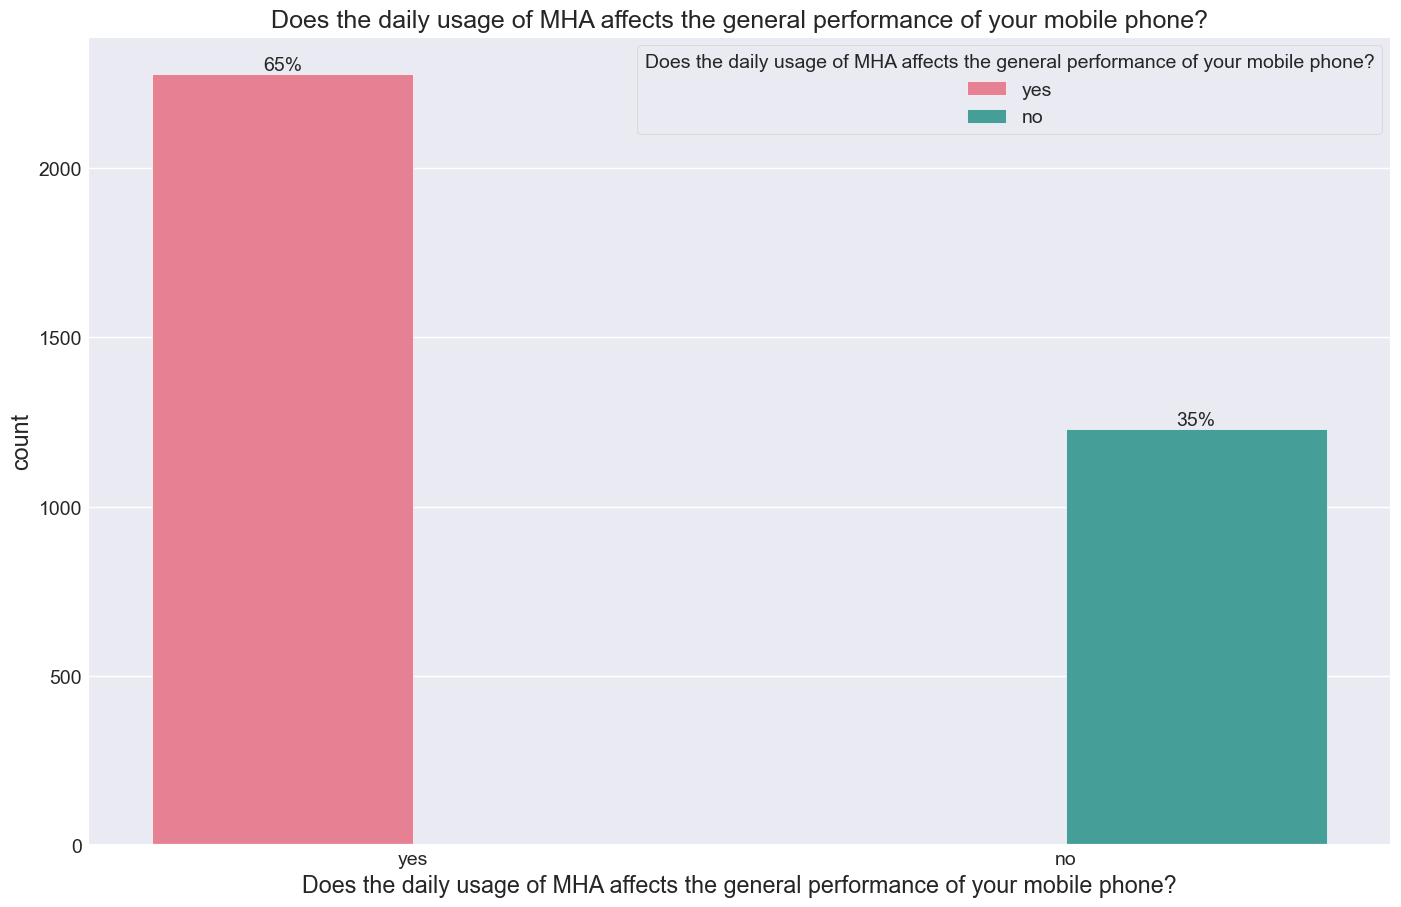

In [184]:
plt.figure(figsize=(15, 10))
total = float(len(data))
ax=sns.countplot(x=data['Does the daily usage of MHA affects the general performance of your mobile phone?'],hue = data["Does the daily usage of MHA affects the general performance of your mobile phone?"], palette='husl')
plt.title('Does the daily usage of MHA affects the general performance of your mobile phone?', fontsize = 18)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        percentage = '{:.0f}%'.format(100 * height / total)
        x = p.get_x() + p.get_width() / 2
        y = height
        ax.text(x, y, percentage, ha='center', va='bottom', fontsize=14) 


plt.tick_params(axis='x')
plt.show()

In [75]:
Get_summary_stats_category(data, ['Does the daily usage of MHA affects the general performance of your mobile phone?'])

Modal value for Does the daily usage of MHA affects the general performance of your mobile phone? is yes
Unique values for Does the daily usage of MHA affects the general performance of your mobile phone? is ['yes' 'no']
The number of unique values for Does the daily usage of MHA affects the general performance of your mobile phone? is 2
The frequency for yes is : 2277
The percentage of the modal score in the distribution is 64.92728828058169


Does the daily usage of MHA affects the general performance of your mobile phone?
yes    2277
no     1230
Name: count, dtype: int64

--**Observations**
- 65% of MHA users claims that it affects the general performance of their mobile. But we don't know whether it enhances the performance or not.

<h3>17. Checking the relevance of the "Tracking App" and the "Age" in the dataset</h3>

<Figure size 1300x1000 with 0 Axes>

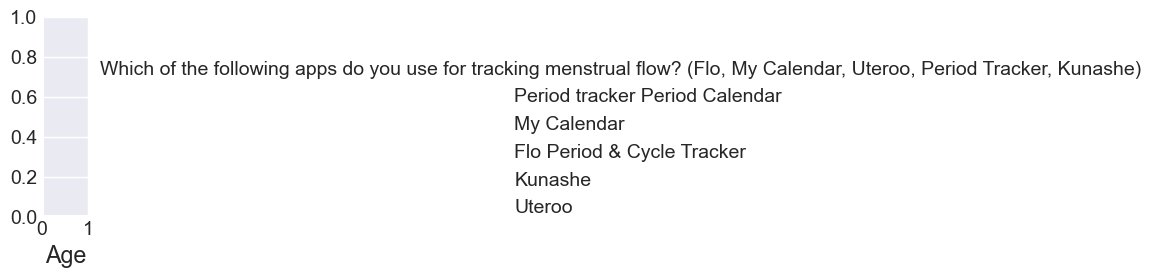

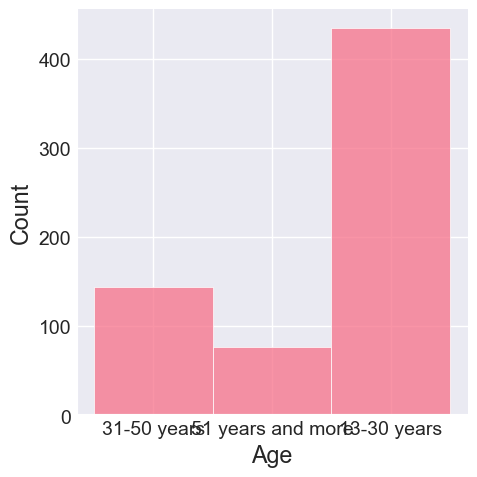

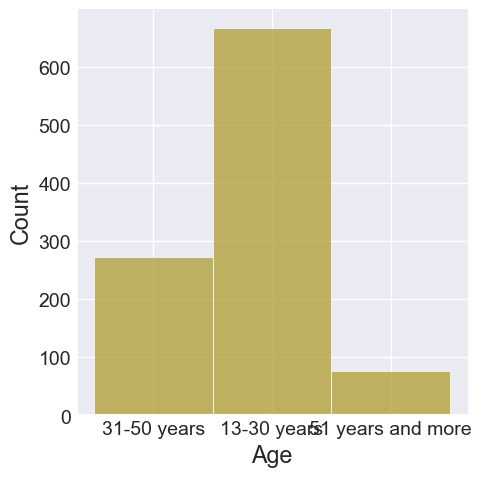

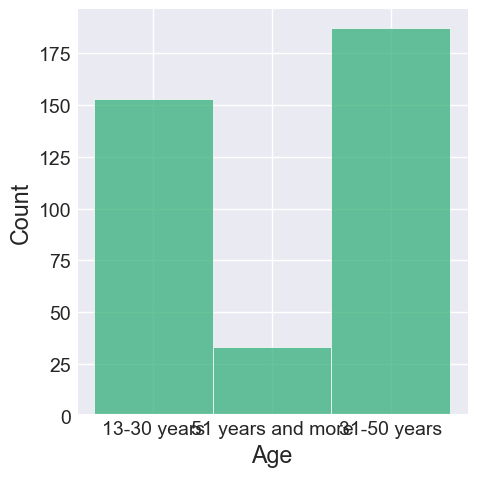

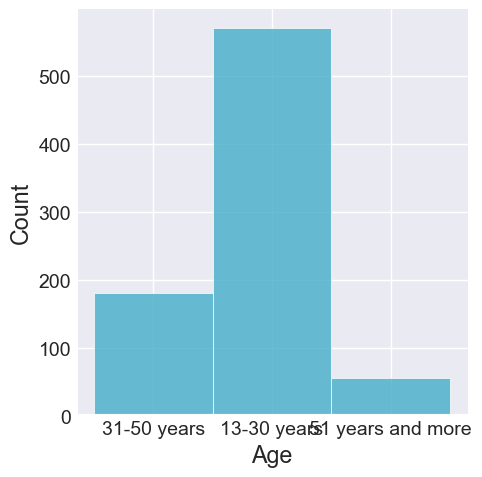

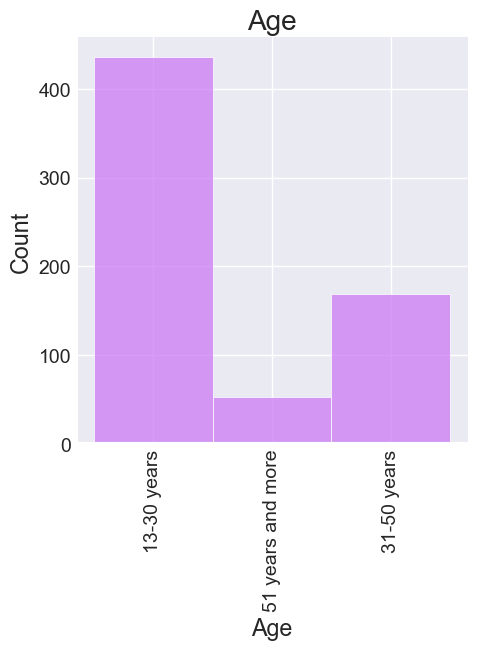

In [187]:
plt.figure(figsize=(13, 10))
sns.FacetGrid(data,palette="husl", hue="Which of the following apps do you use for tracking menstrual flow? (Flo, My Calendar, Uteroo, Period Tracker, Kunashe)").map(sns.displot,'Age').add_legend()
plt.title('Age')
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        percentage = '{:.0f}%'.format(100 * height / total)
        x = p.get_x() + p.get_width() / 2
        y = height
        ax.text(x, y, percentage, ha='center', va='bottom', fontsize=14) 


plt.tick_params(axis='x', rotation=90)
plt.show()

--**Observations**
- We could see that generally people within the age bracket of 13-30 are the major users of these apps.
- We also observe that people within the age bracket 31-50 are the major users of the "Flo Period & Cycle Tracker".
- We also observe that "51years & more" found **"Period tracker Period Calendar"** and **"My Calendar"**

<h3>18. Checking the relevance of the "Tracking Apps" and the "Sex" in the dataset</h3>

<Figure size 1300x1000 with 0 Axes>

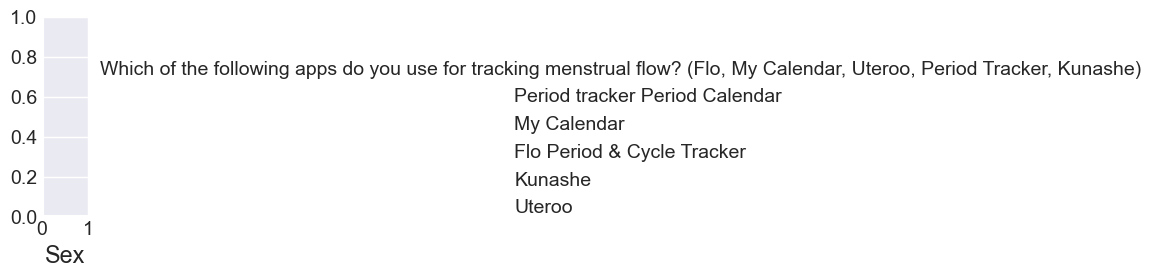

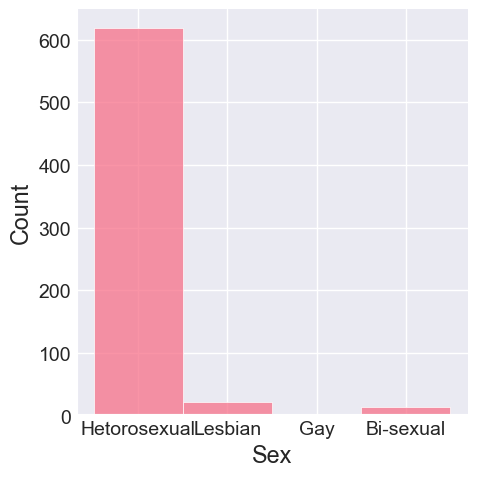

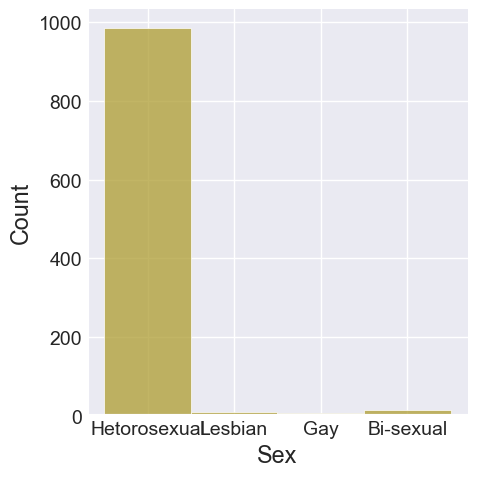

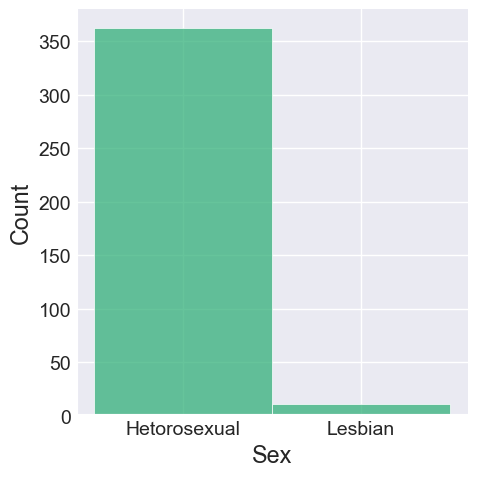

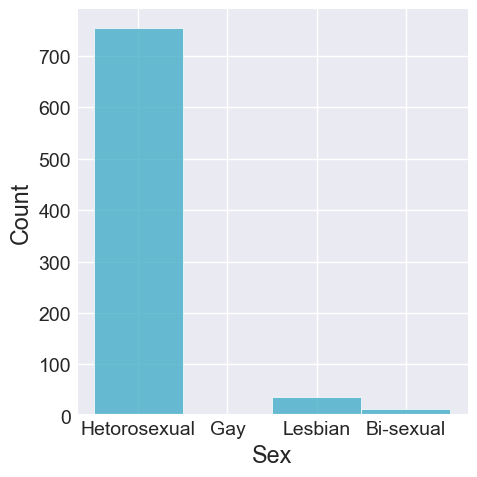

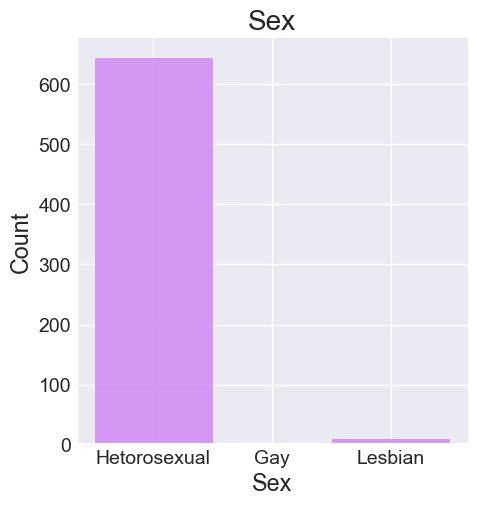

In [186]:
plt.figure(figsize=(13, 10))
sns.FacetGrid(data,palette="husl", hue="Which of the following apps do you use for tracking menstrual flow? (Flo, My Calendar, Uteroo, Period Tracker, Kunashe)").map(sns.displot,'Sex').add_legend()
plt.title('Sex')
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        percentage = '{:.0f}%'.format(100 * height / total)
        x = p.get_x() + p.get_width() / 2
        y = height
        ax.text(x, y, percentage, ha='center', va='bottom', fontsize=14) 


plt.tick_params(axis='x')
plt.show()

--**Observation**
- We observe that it's only **Flo Period Tracker** has only Heterosexual and Lesbian as it's users  app users has least problem recommending the App to new users.
- While My Calendar App users has the most people not willing to recommend the App probably due to it having the highest numbers of users.

<h3>19. Checking the relevance of the "Tracking Apps" and the "recommendation" in the dataset</h3>

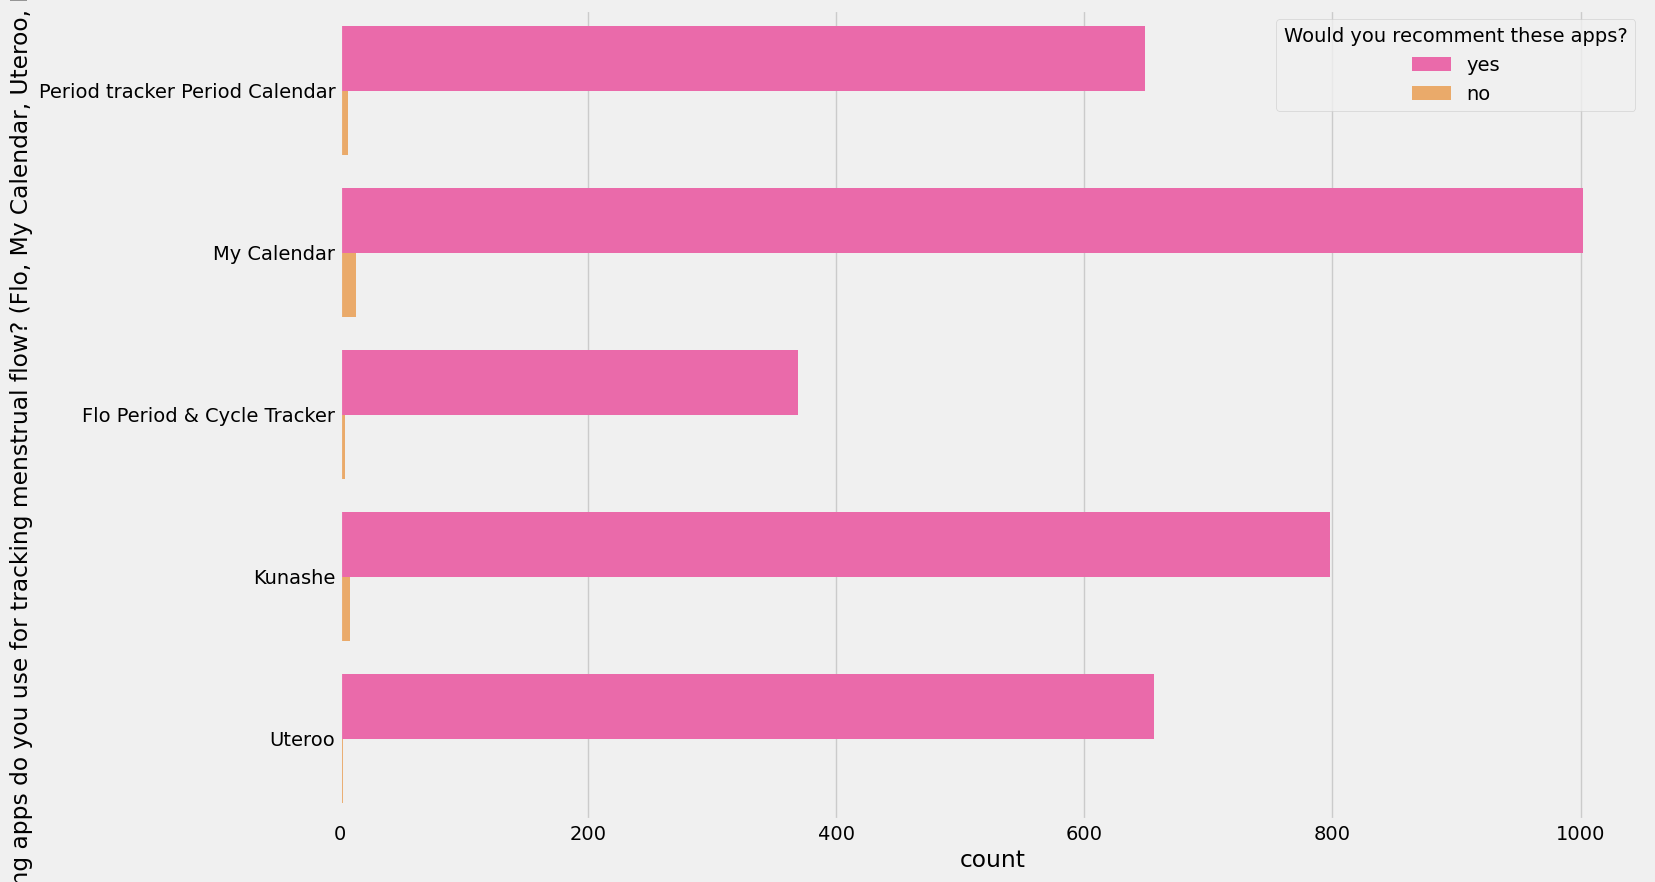

<Figure size 640x480 with 0 Axes>

In [78]:
# Show a countplot with the number of recommendation per Apps a different color
plt.figure(figsize=(15, 10))
total = float(len(data))
sns.countplot(data=data,
         y="Which of the following apps do you use for tracking menstrual flow? (Flo, My Calendar, Uteroo, Period Tracker, Kunashe)",
         hue="Would you recomment these apps?", palette = 'spring')
for p in ax.patches:
    percentage ='{:,.0f}%'.format(100 * p.get_height()/total)
    x=p.get_x()+ p.get_width()
    y=p.get_height()
    ax.annotate(percentage,(x,y) ,ha='center')

plt.show()
plt.clf()

--**Observation**
- We observe that Uteroo app users has least problem recommending the App to new users.
- While My Calendar App users has the most people not willing to recommend the App probably due to it having the highest numbers of users.

<h3>20. Checking the relevance of the "Tracking Apps" and the "How long have you been using the tracking App" in the dataset</h3>

<Figure size 1500x1300 with 0 Axes>

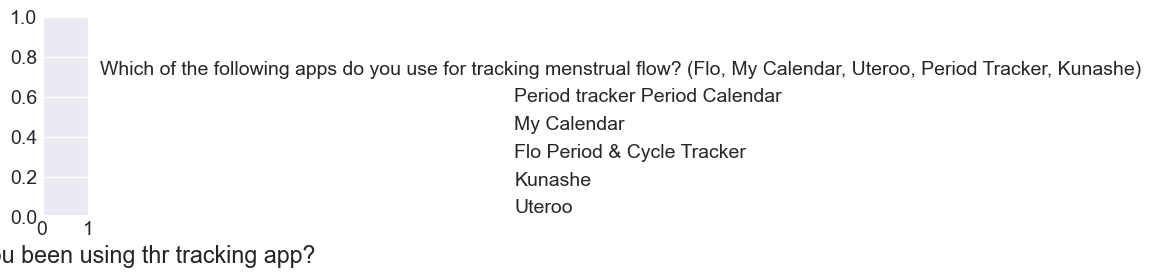

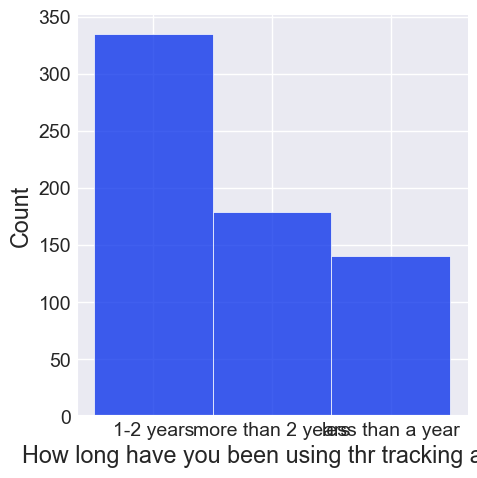

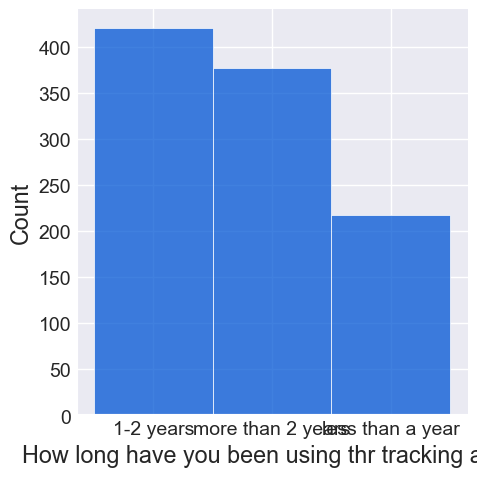

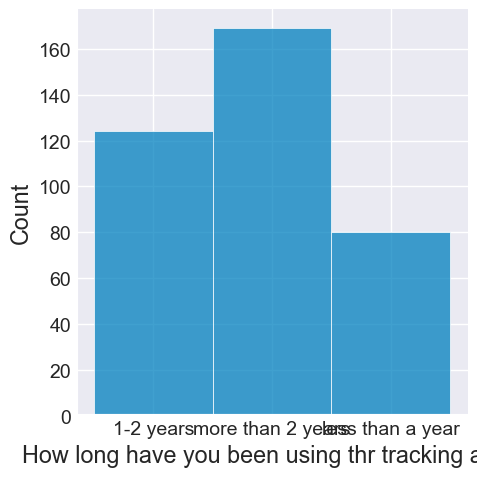

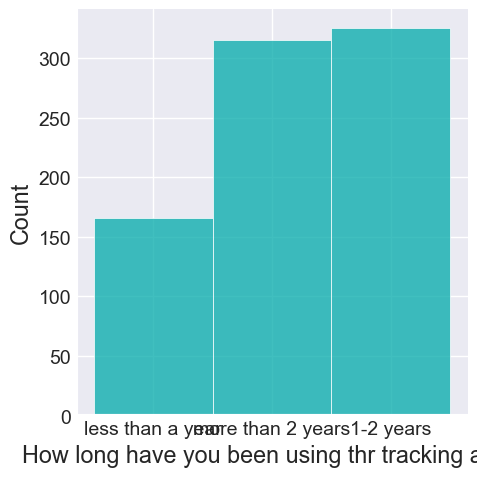

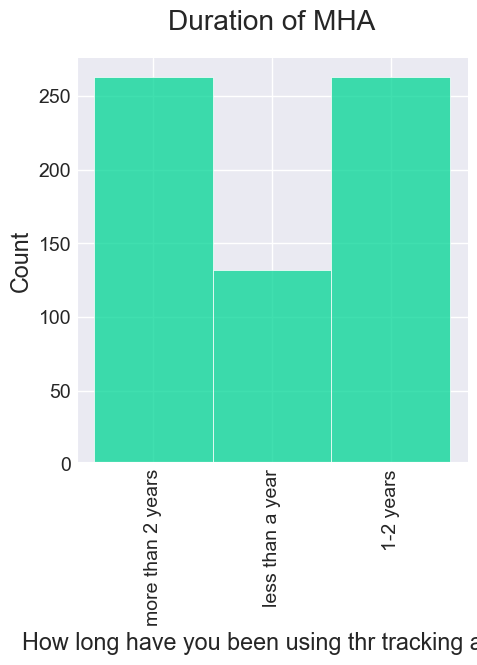

In [198]:
# Rate on performance
sns.set_style('darkgrid')
plt.figure(figsize=(15, 13))
sns.FacetGrid(data,palette="winter", hue="Which of the following apps do you use for tracking menstrual flow? (Flo, My Calendar, Uteroo, Period Tracker, Kunashe)").map(sns.displot,'How long have you been using thr tracking app?').add_legend()
plt.title('Duration of MHA', pad=20)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        percentage = '{:.0f}%'.format(100 * height / total)
        x = p.get_x() + p.get_width() / 2  
        y = height
        ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=14)

plt.tick_params(axis='x', rotation = 90)
plt.show()

--**Observation**
- We observe that "My Calendar app" is having the highest number of new users with over 200 users with less than a year followed by "Period Tracker Period Calendar".
- While "Uteroo App" users has the equal number of users within the 1-2years and users of more than 2years value of about 270.
- "Flo Period Tracker" has the highest percentage of "more than 2 years" users to other years in comparison with other Apps and that might shows the commitment of their old users.

<h3>21. Checking the relevance of the "Tracking Apps" and the "Performance" in the dataset</h3>

<Figure size 800x500 with 0 Axes>

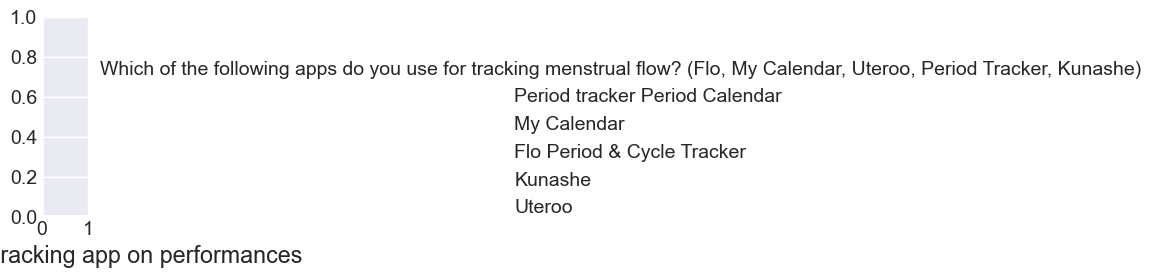

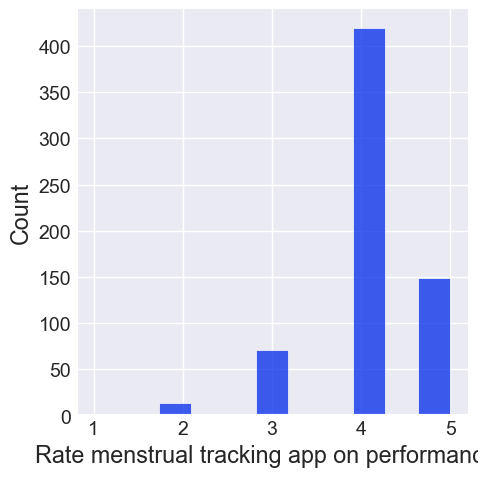

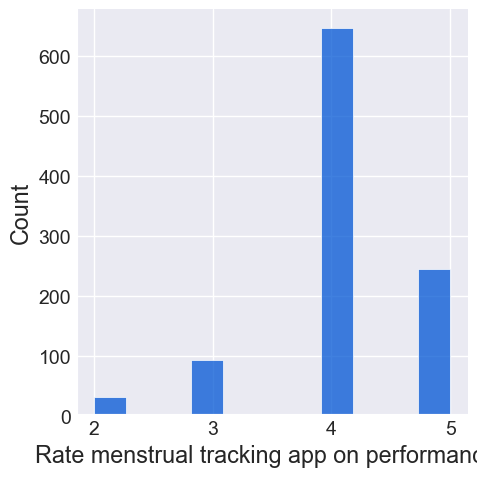

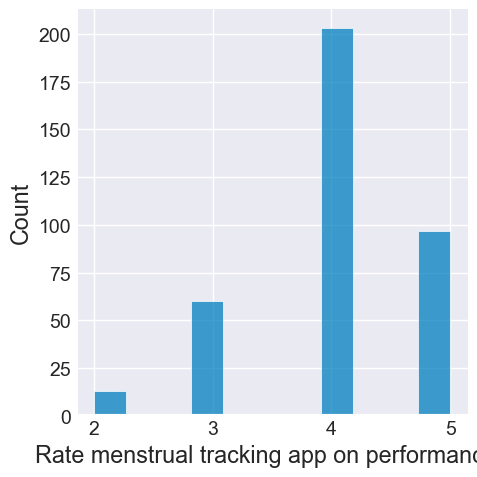

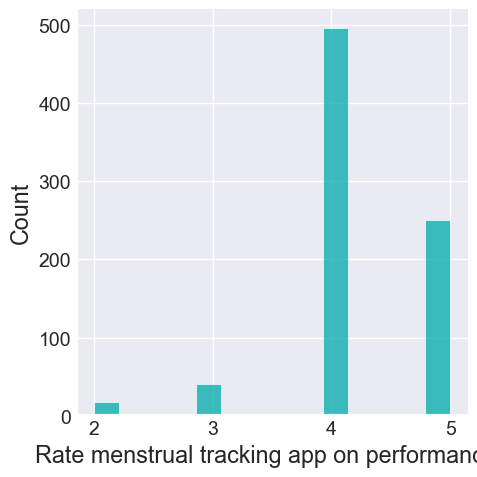

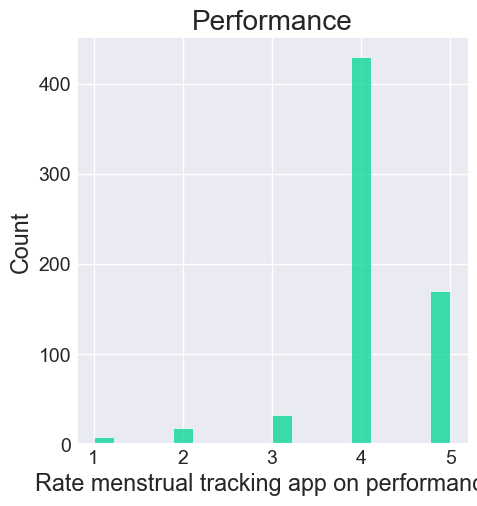

In [80]:
sns.set_style('darkgrid')
plt.figure(figsize=(8, 5))
sns.FacetGrid(data,palette="winter", hue="Which of the following apps do you use for tracking menstrual flow? (Flo, My Calendar, Uteroo, Period Tracker, Kunashe)").map(sns.displot,'Rate menstrual tracking app on performances').add_legend()
plt.title('Performance')
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        percentage = '{:,.0f}%'.format(100 * height / total)
        x = p.get_x() + p.get_width()
        y = height
        ax.annotate(percentage, (x, y), ha='center')

plt.tick_params(axis='x')
plt.show()

--**Observation**
- We observe that "My Calendar app" and "Kunashe" app has almost the same numbers of **5 star rating** which are the highest number while "Period Tracker Period Calendar" has no **1 star** rating.
- While "My Calendar app" has the highest **4 star rating** followed by Kunashe.

<h3>22. Checking the relevance of the "Tracking Apps" and the "Ease of Use" in the dataset</h3>

<Figure size 800x500 with 0 Axes>

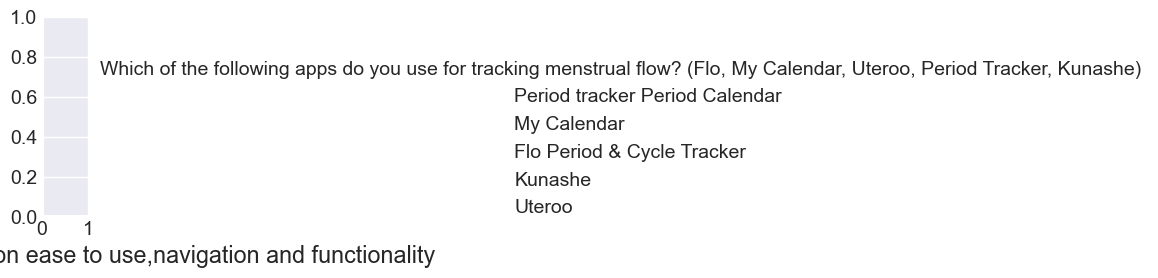

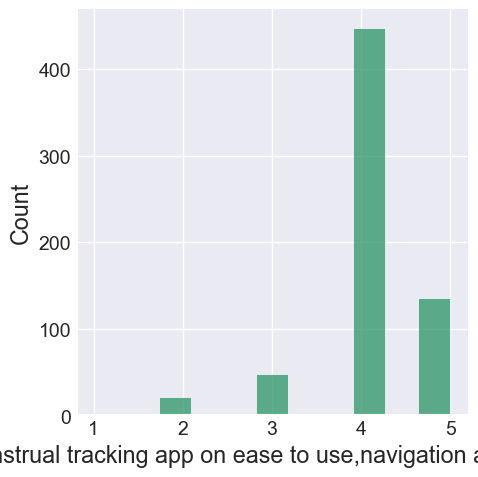

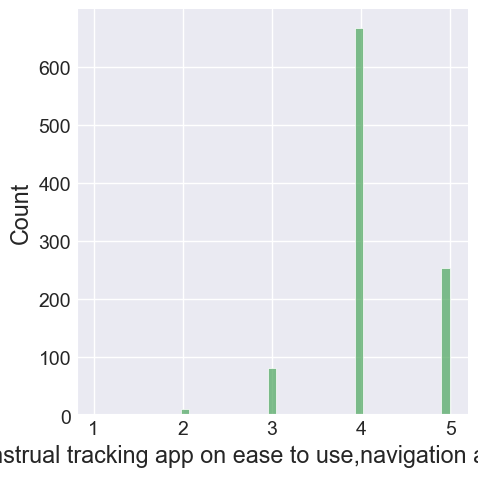

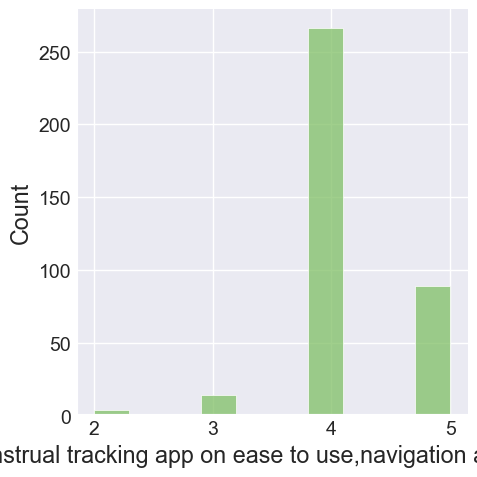

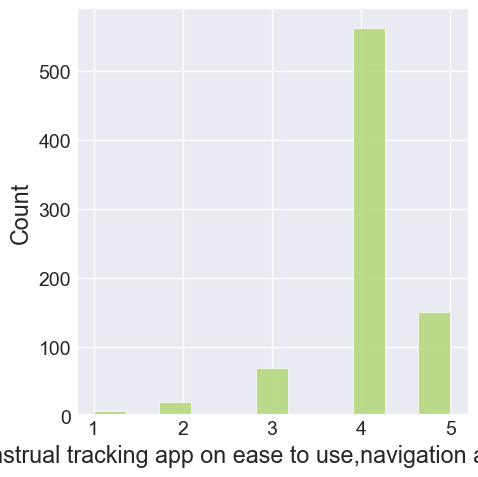

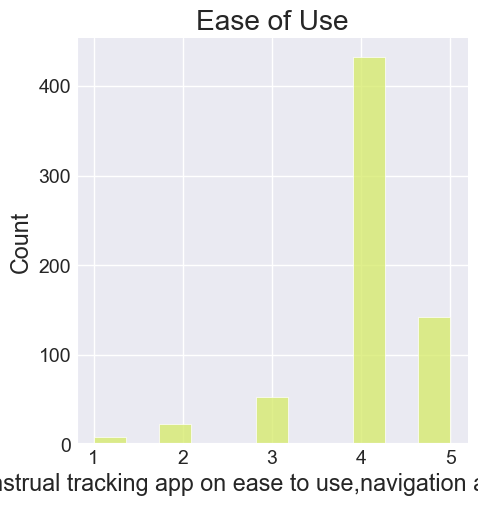

In [193]:
sns.set_style('darkgrid')
plt.figure(figsize=(8, 5))
sns.FacetGrid(data,palette="summer", hue="Which of the following apps do you use for tracking menstrual flow? (Flo, My Calendar, Uteroo, Period Tracker, Kunashe)").map(sns.displot,'Rate menstrual tracking app on ease to use,navigation and functionality').add_legend()
plt.title('Ease of Use')
# Store the bar positions and widths
bar_positions = [p.get_x() + p.get_width() / 2 for p in ax.patches]
bar_width = ax.patches[0].get_width()

for i, p in enumerate(ax.patches):
    height = p.get_height()
    if height > 0:
        percentage = '{:.0f}%'.format(100 * height / total)
        x = bar_positions[i]
        y = height
        ax.text(x, y, percentage, ha='center', va='bottom', fontsize=12)

# Set the x-axis labels at the stored positions
ax.set_xticks(bar_positions)

plt.tick_params(axis='x')
plt.show()

--**Observation**
- We observe that "My Calendar app" has the highest numbers of **5 star rating** when it comes to ease of using the App.

<h3>23. Checking the relevance of the "Tracking Apps" and the "Ease of Use" in the dataset</h3>

<Figure size 800x500 with 0 Axes>

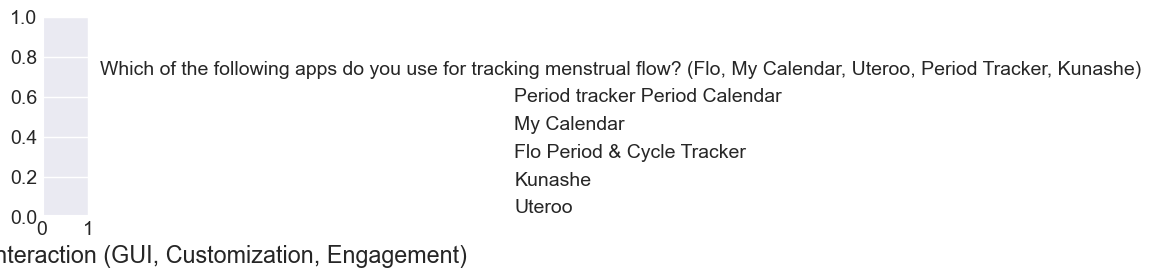

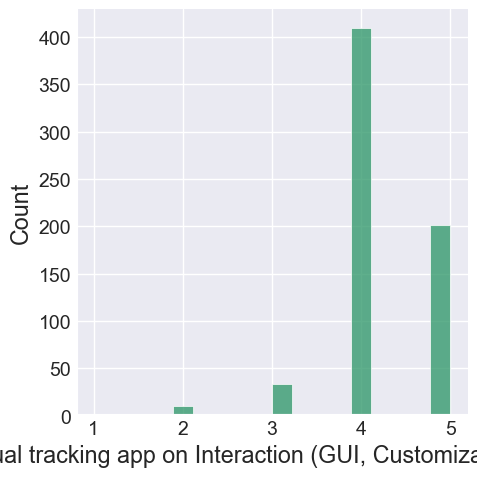

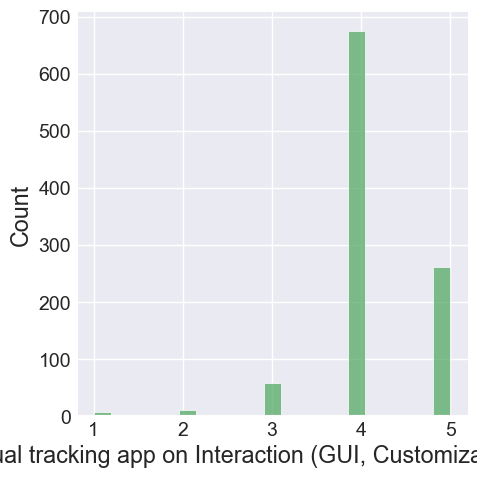

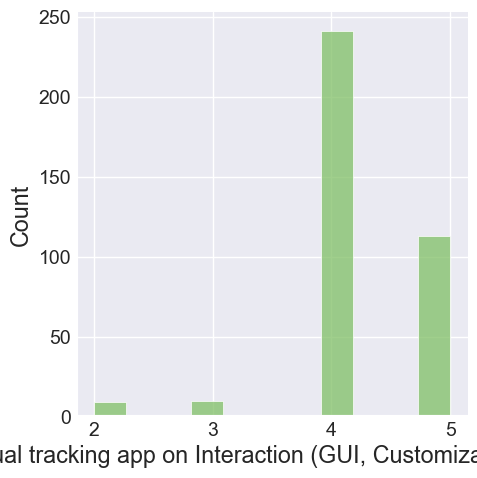

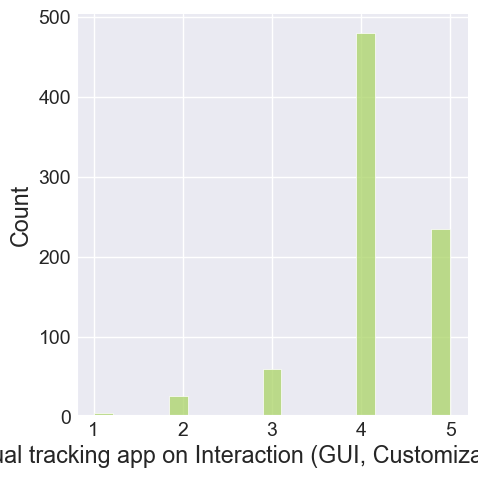

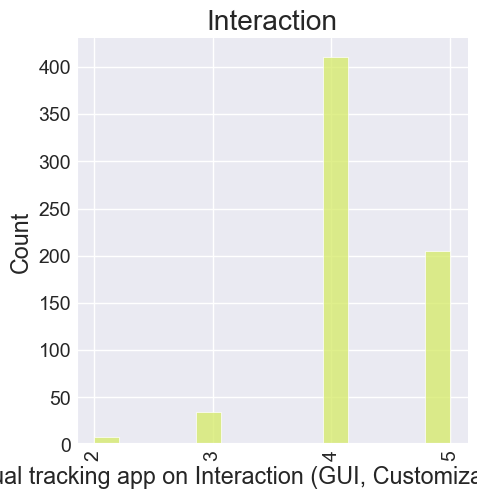

In [83]:
sns.set_style('darkgrid')
plt.figure(figsize=(8, 5))
sns.FacetGrid(data, palette="summer", hue="Which of the following apps do you use for tracking menstrual flow? (Flo, My Calendar, Uteroo, Period Tracker, Kunashe)").map(sns.displot, "Rate menstrual tracking app on Interaction (GUI, Customization, Engagement) ").add_legend()
plt.title('Interaction')
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        percentage = '{:,.0f}%'.format(100 * height / total)
        x = p.get_x() + p.get_width()
        y = height
        ax.annotate(percentage, (x, y), ha='center')

plt.tick_params(axis='x', rotation=90)
plt.show()


--**Observation**
- We observe that "My Calendar app" has the highest numbers of **5 star rating** when it comes to interaction within the App.

<h3>24. Checking the relevance of the "Tracking Apps" and the "Accuracy" in the dataset</h3>

<Figure size 800x500 with 0 Axes>

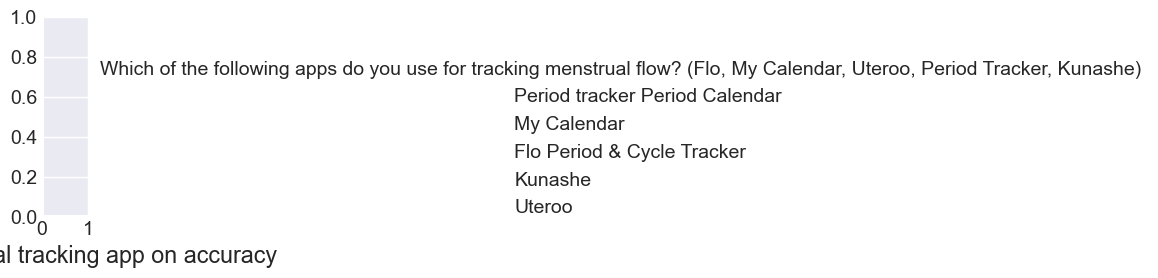

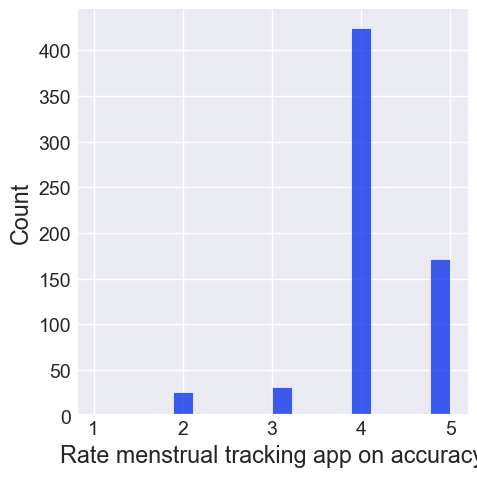

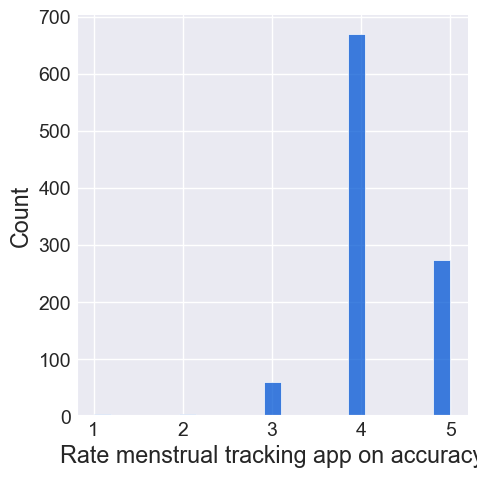

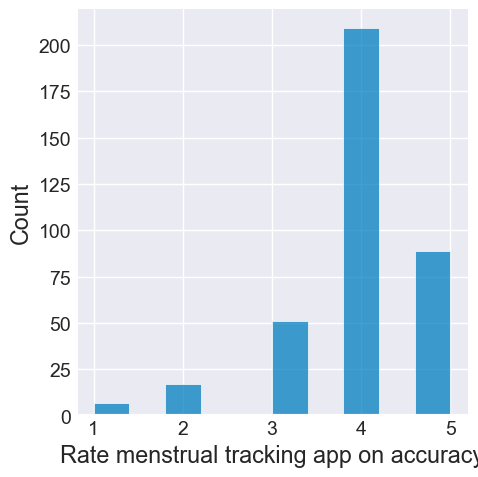

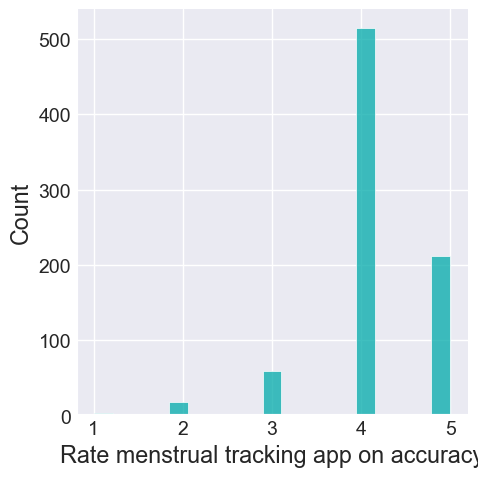

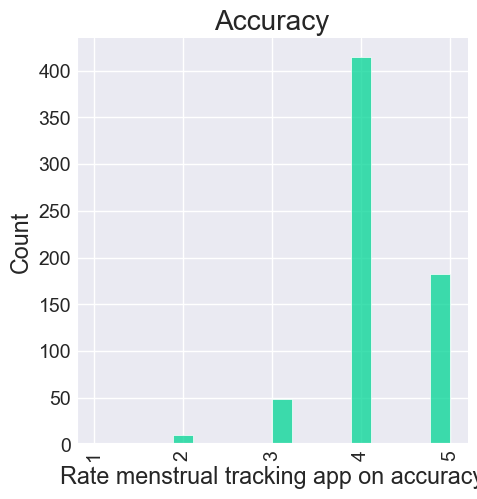

In [84]:
sns.set_style('darkgrid')
plt.figure(figsize=(8, 5))
sns.FacetGrid(data,palette="winter", hue="Which of the following apps do you use for tracking menstrual flow? (Flo, My Calendar, Uteroo, Period Tracker, Kunashe)").map(sns.displot,'Rate menstrual tracking app on accuracy').add_legend()
plt.title('Accuracy')
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        percentage = '{:,.0f}%'.format(100 * height / total)
        x = p.get_x() + p.get_width()
        y = height
        ax.annotate(percentage, (x, y), ha='center')

plt.tick_params(axis='x', rotation=90)
plt.show()




<h3>25. Checking the relevance of the "Tracking Apps" and the "Overall app rating" in the dataset</h3>

<Figure size 800x500 with 0 Axes>

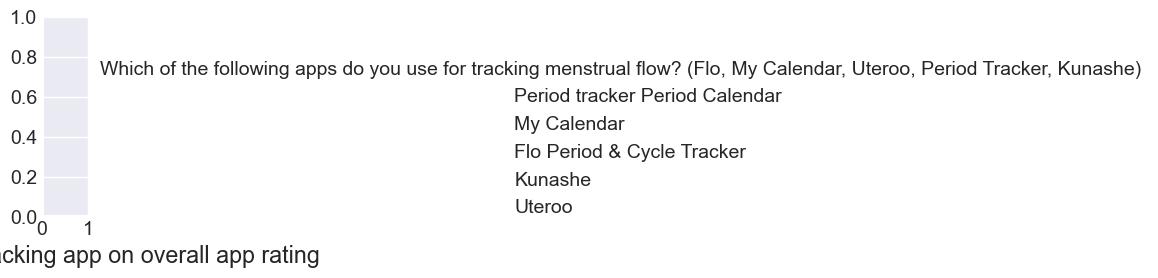

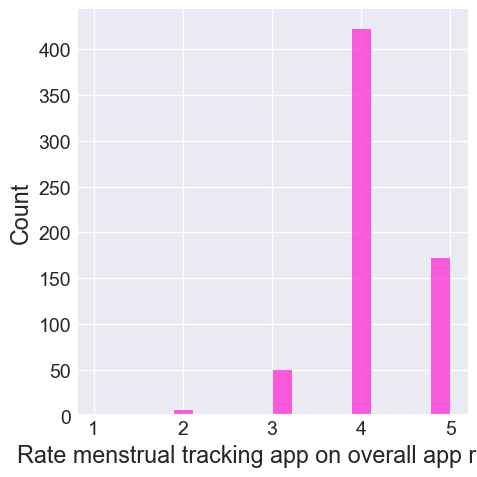

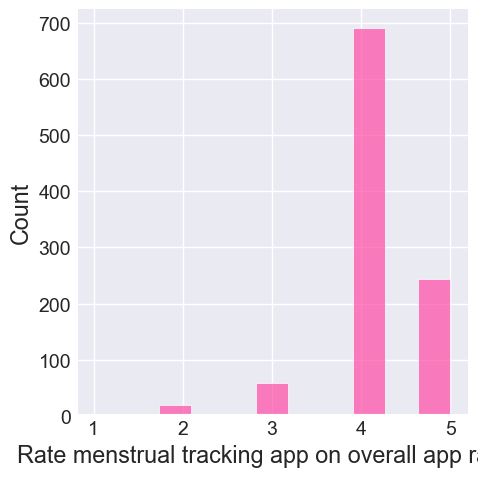

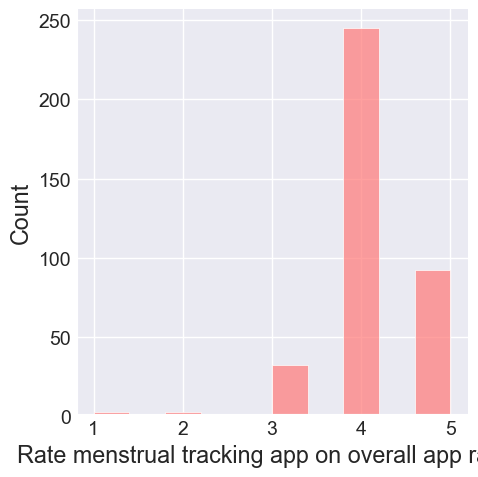

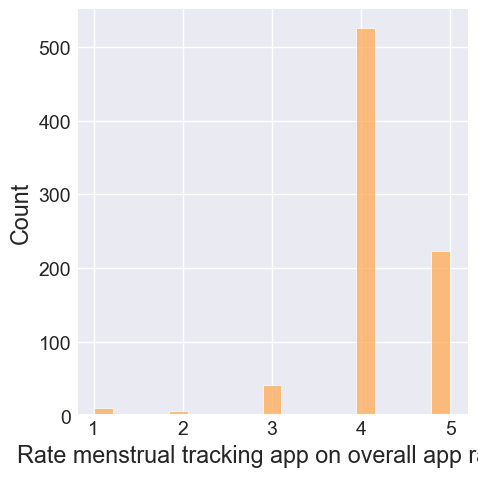

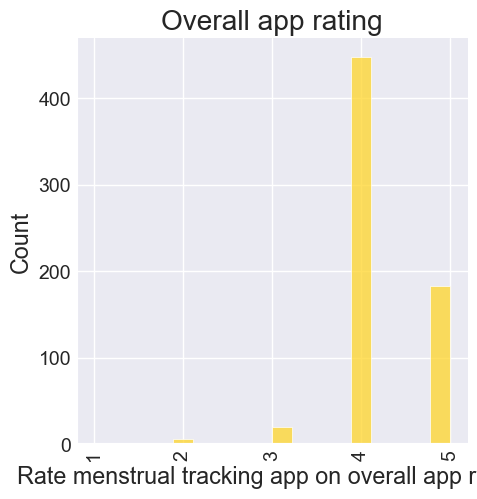

In [85]:
sns.set_style('darkgrid')
plt.figure(figsize=(8, 5))
sns.FacetGrid(data,palette="spring", hue="Which of the following apps do you use for tracking menstrual flow? (Flo, My Calendar, Uteroo, Period Tracker, Kunashe)").map(sns.displot,'Rate menstrual tracking app on overall app rating').add_legend()
plt.title('Overall app rating')
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        percentage = '{:,.0f}%'.format(100 * height / total)
        x = p.get_x() + p.get_width()
        y = height
        ax.annotate(percentage, (x, y), ha='center')

plt.tick_params(axis='x', rotation=90)
plt.show()


--**Observation**
- We observe that "My Calendar app" performs much better in overall app rating.

<h3>26. Checking the relevance of the "Tracking Apps" and the "Region" in the dataset</h3>

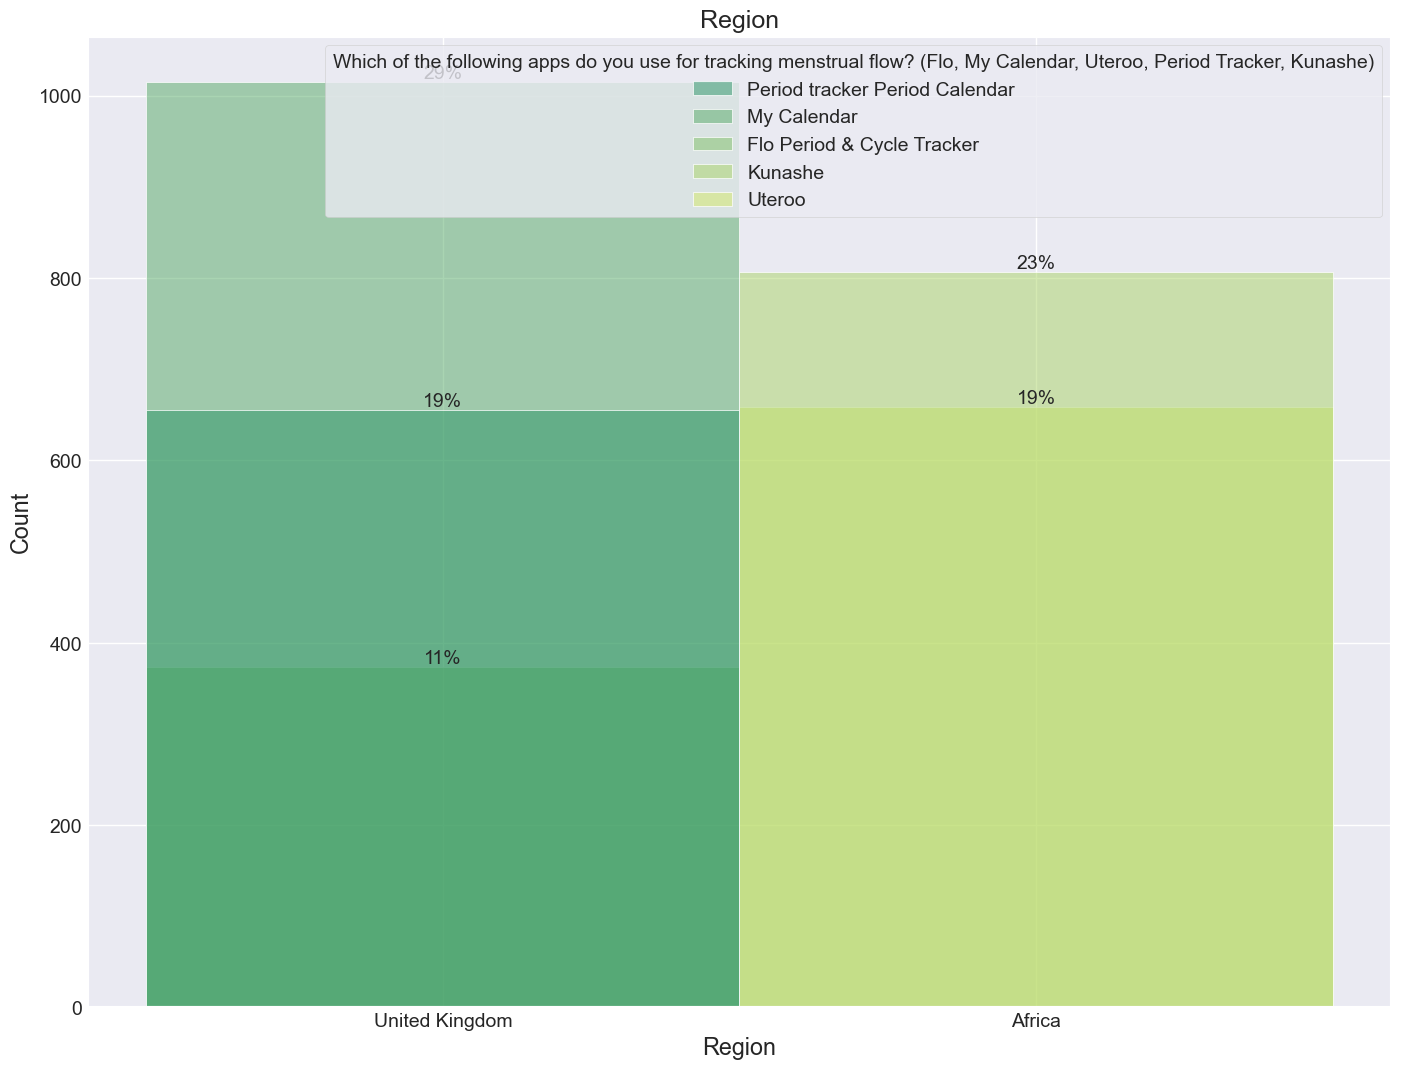

In [199]:
plt.figure(figsize=(15, 12))
total = float(len(data))
ax=sns.histplot(x=data['Region'],hue = data["Which of the following apps do you use for tracking menstrual flow? (Flo, My Calendar, Uteroo, Period Tracker, Kunashe)"], palette='summer')
plt.title('Region', fontsize = 18)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        percentage = '{:.0f}%'.format(100 * height / total)
        x = p.get_x() + p.get_width() / 2
        y = height
        ax.text(x, y, percentage, ha='center', va='bottom', fontsize=14) 


plt.tick_params(axis='x')
plt.show()

In [87]:
Get_summary_stats_category(data, ['Region'])

Modal value for Region is United Kingdom
Unique values for Region is ['United Kingdom' 'Africa']
The number of unique values for Region is 2
The frequency for United Kingdom is : 2043
The percentage of the modal score in the distribution is 58.25491873396065


Region
United Kingdom    2043
Africa            1464
Name: count, dtype: int64

--**Observation**
- We observe that "My Calendar app" and "Kunashe" app are the favourite in their respective regions.

<h3>27. Checking the relevance of the "Tracking Apps" and the "Education Qualification" in the dataset</h3>

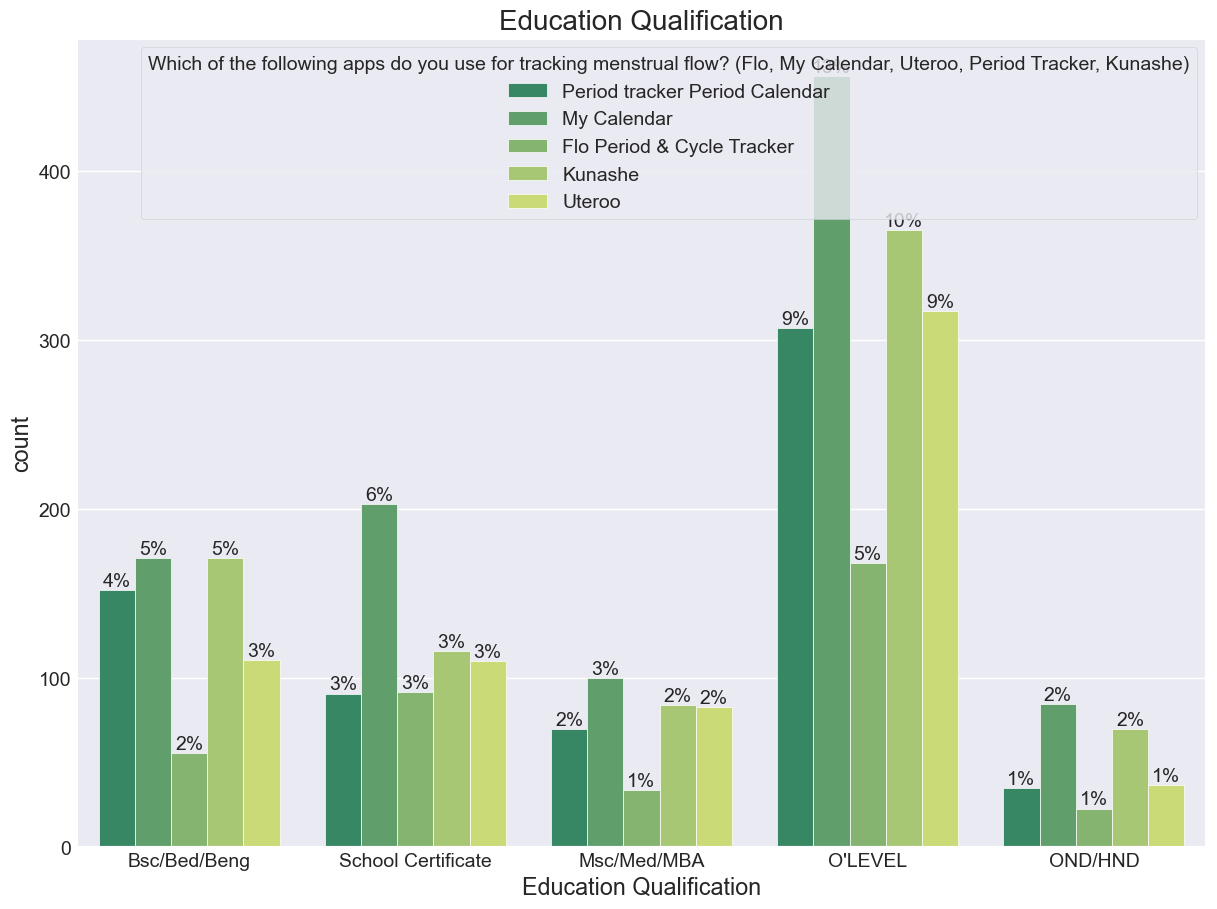

In [215]:

sns.set_style('darkgrid')
plt.figure(figsize=(13, 10))
total = float(len(data))
ax=sns.countplot(x='Education Qualification', hue ="Which of the following apps do you use for tracking menstrual flow? (Flo, My Calendar, Uteroo, Period Tracker, Kunashe)", data=data, palette='summer')
plt.title('Education Qualification', fontsize = 20)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        percentage = '{:.0f}%'.format(100 * height / total)
        x = p.get_x() + p.get_width() / 2
        y = height
        ax.text(x, y, percentage, ha='center', va='bottom', fontsize=14) 


plt.tick_params(axis='x')
plt.show()

-- **Observations**
- My Calendar seems to be the favourite accross all the Education Qualification levels. With more popularity amidst "O'LEVEL" degree holders.
- Flo Period & Cycle Tracker seems to be the least choice accross all the Educational levels. It only had a balance wih Period Tracker Period Calndar amidst "School Certificate" holders.
- Msc/Med/MBA holders seems to have a balance between "Kunashe App" and "Uteroo App".

<h3>28. Checking the relevance of the "Age" and the "Education Qualification" in the dataset</h3>

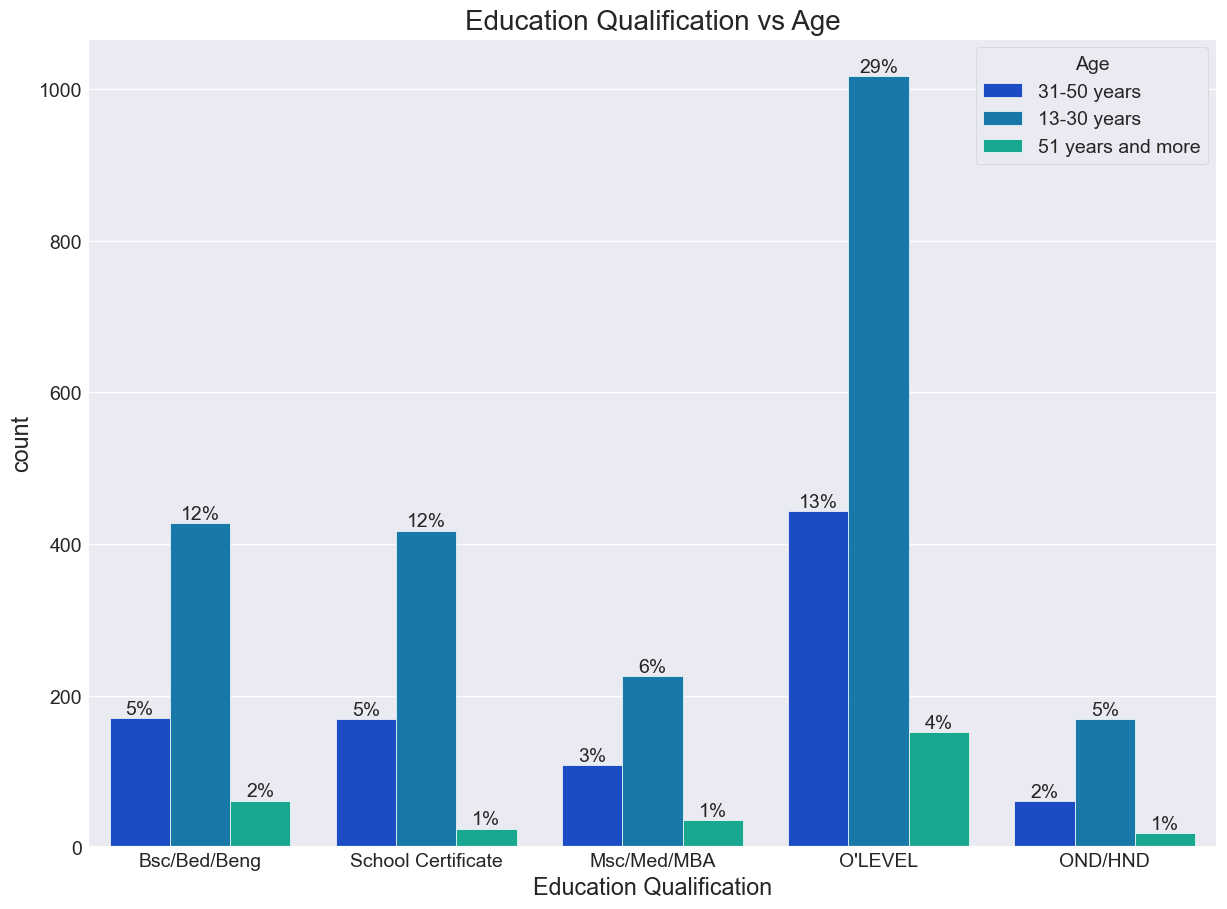

In [221]:
sns.set_style('darkgrid')
plt.figure(figsize=(13, 10))
total = float(len(data2))
ax=sns.countplot(x='Education Qualification', hue ="Age", data=data, palette='winter')
plt.title('Education Qualification vs Age', fontsize = 20)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        percentage = '{:.0f}%'.format(100 * height / total)
        x = p.get_x() + p.get_width() / 2
        y = height
        ax.text(x, y, percentage, ha='center', va='bottom', fontsize=14) 


plt.tick_params(axis='x')
plt.show()

--**Observations**
- We observe that people within the age bracket of **13-30 years** of age are majorly **O'LEVEL** holders. So, it might be safe to say that a person within the age bracket of **13-30 years** of age will be an **O'LEVEL** holder with a possibility of wantng to use either "My Calander APP" or "Kunashe App" which are the popular APPS in their respective regions.
- We could also see that **"BSC/Bed/Beng" and "School Certificate"** are having equal number users within the Age bracket of "13-30 years".

<h3>29. Checking the relevance of the "Age" and the "How long have you been using thr tracking app?" in the dataset</h3>

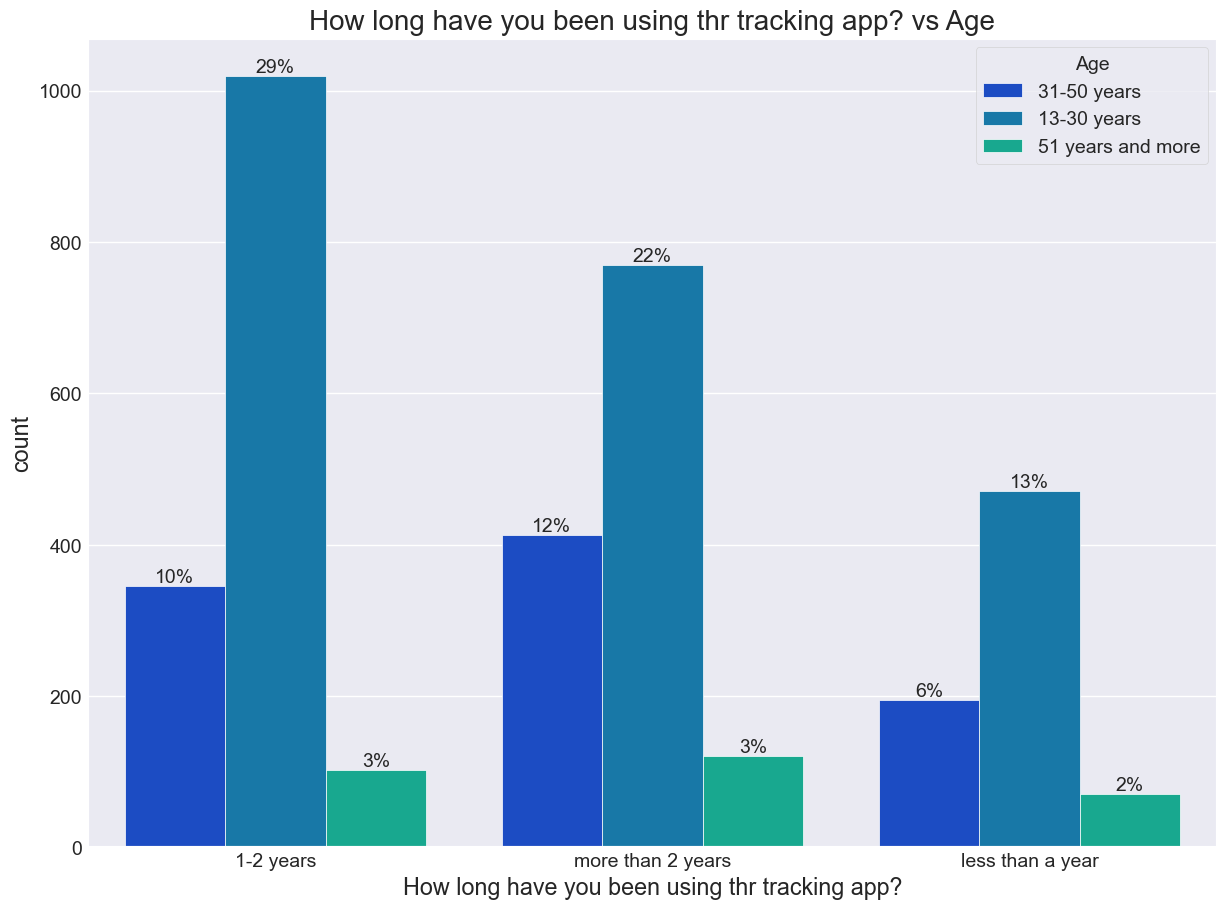

In [224]:
sns.set_style('darkgrid')
plt.figure(figsize=(13, 10))
total = float(len(data2))
ax=sns.countplot(x='How long have you been using thr tracking app?', hue ="Age", data=data, palette='winter')
plt.title('How long have you been using thr tracking app? vs Age', fontsize = 20)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        percentage = '{:.0f}%'.format(100 * height / total)
        x = p.get_x() + p.get_width() / 2
        y = height
        ax.text(x, y, percentage, ha='center', va='bottom', fontsize=14) 


plt.tick_params(axis='x')
plt.show()

--**Observations**
- We observe that users within the age bracket of **13-30 years** are the highest accross "How long have you been using thr tracking app?". With "1-2 years" having the highest number.
- "More than 2 years" are even more than users with "less than a year".

<a name="Feature"></a>
## <p style="padding: 8px;color:white; display:fill;background-color:deeppink; border-radius:5px; font-size:100%"> <b>6. Feature Engineering / Data Normalization</b>

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3507 entries, 0 to 3506
Data columns (total 22 columns):
 #   Column                                                                                                                   Non-Null Count  Dtype 
---  ------                                                                                                                   --------------  ----- 
 0   Education Qualification                                                                                                  3507 non-null   object
 1   Age                                                                                                                      3507 non-null   object
 2   Religion                                                                                                                 3507 non-null   object
 3   Sex                                                                                                                      3507 non-null   object

## ENCODING

### ONE-HOT ENCODING

In this data preprocessing step, we employ one-hot encoding for nominal categorical data. One-hot encoding is ideal for scenarios where the categorical variables have no inherent order or hierarchy among them. It preserves the independence of categories, doesn't make assumptions about relationships between them, and is particularly suited for columns such as 'Education Qualification,' 'Religion,' and 'Sex.' If dealing with ordinal categorical data that has a meaningful order, label encoding could be considered instead, where integer labels reflect the category order

In [89]:
# We create a copy of the data to avoid modifying the original
data1 = data.copy()

# We specify the object columns we want to one-hot encode
object_one_hot = ["Education Qualification","Age","Religion","Sex","Region","How long have you been using thr tracking app?"]

# We one-hot encode to the specified columns
data1 = pd.get_dummies(data1, columns=object_one_hot)

### LABEL ENCODING

Label encoding is used to encode "Ordered categorical features". The classes in the features will be given discrete numbers increasing by Order, for example, a feature like  with three classes of data will be encoded to have, 0,1,2 discrete values.

In [92]:
from sklearn.preprocessing import LabelEncoder
# We specify the object columns we want to Label encode
object_label = ["Which of the following apps do you use for tracking menstrual flow? (Flo, My Calendar, Uteroo, Period Tracker, Kunashe)","Would you recomment these apps?",
    "Has the use of MHA improved your lifestyle?",
    "Does the use of MHA interrupts your daily activities?",
    "Does the MHA gives you daily update?",
    "Is the use of the MHA time consuming?",
    "Do you find the MHA easy to use?",
    "Has the use of MHA improved your daily lifestyle?",
    "Has the use of MHA helped in setting personal goals for your lifestyle?",
    "Does the daily usage of MHA affects the general performance of your mobile phone?"
]

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# We apply label encoding to each object column
for col in object_label:
    data1[col] = label_encoder.fit_transform(data1[col])

--**Observations**
- We use Label encoding for all the columns with YES or NO response as they will only cause creation of different columns for each class. And when the classes are too much it creates huge matrix that will consume much of the system's memory.

In [94]:
data1.head()

Which of the following apps do you use for tracking menstrual flow? (Flo, My Calendar, Uteroo, Period Tracker, Kunashe)  \
0                                                  3                                                                         
1                                                  2                                                                         
2                                                  0                                                                         
3                                                  0                                                                         
4                                                  1                                                                         

   Rate menstrual tracking app on performances  \
0                                            5   
1                                            3   
2                                            4   
3                                            4   
4                                            3   

   Rate menstrual tracking app on Interaction (GUI, Customization, Engagement)   \
0                                                  5                              
1                                                  5                              
2                                                  4                              
3                                                  4                              
4                                                  3                              

   Rate menstrual tracking app on ease to use,navigation and functionality  \
0                                                  4                         
1                                                  4                         
2                                                  4                         
3                                                  4                         
4                                                  4                         

   Rate menstrual tracking app on aethetics (visual appeal, resolution)  \
0                                                  3                      
1                                                  4                      
2                                                  4                      
3                                                  3                      
4                                                  4                      

   Rate menstrual tracking app on accuracy  \
0                                        4   
1                                        5   
2                                        4   
3                                        4   
4                                        5   

   Rate menstrual tracking app on overall app rating  \
0                                                  4   
1                                                  5   
2                                                  4   
3                                                  4   
4                                                  5   

   Would you recomment these apps?  \
0                                1   
1                                1   
2                                1   
3                                1   
4                                1   

   Has the use of MHA improved your lifestyle?  \
0                                            1   
1                                            1   
2                                            1   
3                                            1   
4                                            1   

   Does the use of MHA interrupts your daily activities?  ...  Religion_Islam  \
0                                                  0      ...           False   
1                                                  0      ...           False   
2                                                  0      ...            True   
3                                                  0      

In [100]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3507 entries, 0 to 3506
Data columns (total 35 columns):
 #   Column                                                                                                                   Non-Null Count  Dtype
---  ------                                                                                                                   --------------  -----
 0   Which of the following apps do you use for tracking menstrual flow? (Flo, My Calendar, Uteroo, Period Tracker, Kunashe)  3507 non-null   int32
 1   Rate menstrual tracking app on performances                                                                              3507 non-null   int64
 2   Rate menstrual tracking app on Interaction (GUI, Customization, Engagement)                                              3507 non-null   int64
 3   Rate menstrual tracking app on ease to use,navigation and functionality                                                  3507 non-null   int64
 4   

In [102]:
# Convert boolean columns to integers (0 or 1)
boolean_columns = [
    "Education Qualification_Bsc/Bed/Beng",
    "Education Qualification_Msc/Med/MBA",
    "Education Qualification_O'LEVEL",
    "Education Qualification_OND/HND",
    "Education Qualification_School Certificate",
    "Age_13-30 years",
    "Age_31-50 years",
    "Age_51 years and more",
    "Religion_Christianity ",
    "Religion_Islam",
    "Sex_Bi-sexual",
    "Sex_Gay",
    "Sex_Hetorosexual",
    "Sex_Lesbian",
    "Region_Africa",
    "Region_United Kingdom",
    "How long have you been using thr tracking app?_1-2 years",
    "How long have you been using thr tracking app?_less than a year",
    "How long have you been using thr tracking app?_more than 2 years"
]

for column in boolean_columns:
    data1[column] = data1[column].astype(int)


In [103]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3507 entries, 0 to 3506
Data columns (total 35 columns):
 #   Column                                                                                                                   Non-Null Count  Dtype
---  ------                                                                                                                   --------------  -----
 0   Which of the following apps do you use for tracking menstrual flow? (Flo, My Calendar, Uteroo, Period Tracker, Kunashe)  3507 non-null   int32
 1   Rate menstrual tracking app on performances                                                                              3507 non-null   int64
 2   Rate menstrual tracking app on Interaction (GUI, Customization, Engagement)                                              3507 non-null   int64
 3   Rate menstrual tracking app on ease to use,navigation and functionality                                                  3507 non-null   int64
 4   

<a name="correlation"></a>
## <p style="padding: 8px;color:white; display:fill;background-color:deeppink; border-radius:5px; font-size:100%"> <b>7. Correlation EDA</b>

In [104]:
data1.head()

Which of the following apps do you use for tracking menstrual flow? (Flo, My Calendar, Uteroo, Period Tracker, Kunashe)  \
0                                                  3                                                                         
1                                                  2                                                                         
2                                                  0                                                                         
3                                                  0                                                                         
4                                                  1                                                                         

   Rate menstrual tracking app on performances  \
0                                            5   
1                                            3   
2                                            4   
3                                            4   
4                                            3   

   Rate menstrual tracking app on Interaction (GUI, Customization, Engagement)   \
0                                                  5                              
1                                                  5                              
2                                                  4                              
3                                                  4                              
4                                                  3                              

   Rate menstrual tracking app on ease to use,navigation and functionality  \
0                                                  4                         
1                                                  4                         
2                                                  4                         
3                                                  4                         
4                                                  4                         

   Rate menstrual tracking app on aethetics (visual appeal, resolution)  \
0                                                  3                      
1                                                  4                      
2                                                  4                      
3                                                  3                      
4                                                  4                      

   Rate menstrual tracking app on accuracy  \
0                                        4   
1                                        5   
2                                        4   
3                                        4   
4                                        5   

   Rate menstrual tracking app on overall app rating  \
0                                                  4   
1                                                  5   
2                                                  4   
3                                                  4   
4                                                  5   

   Would you recomment these apps?  \
0                                1   
1                                1   
2                                1   
3                                1   
4                                1   

   Has the use of MHA improved your lifestyle?  \
0                                            1   
1                                            1   
2                                            1   
3                                            1   
4                                            1   

   Does the use of MHA interrupts your daily activities?  ...  Religion_Islam  \
0                                                  0      ...               0   
1                                                  0      ...               0   
2                                                  0      ...               1   
3                                                  0      

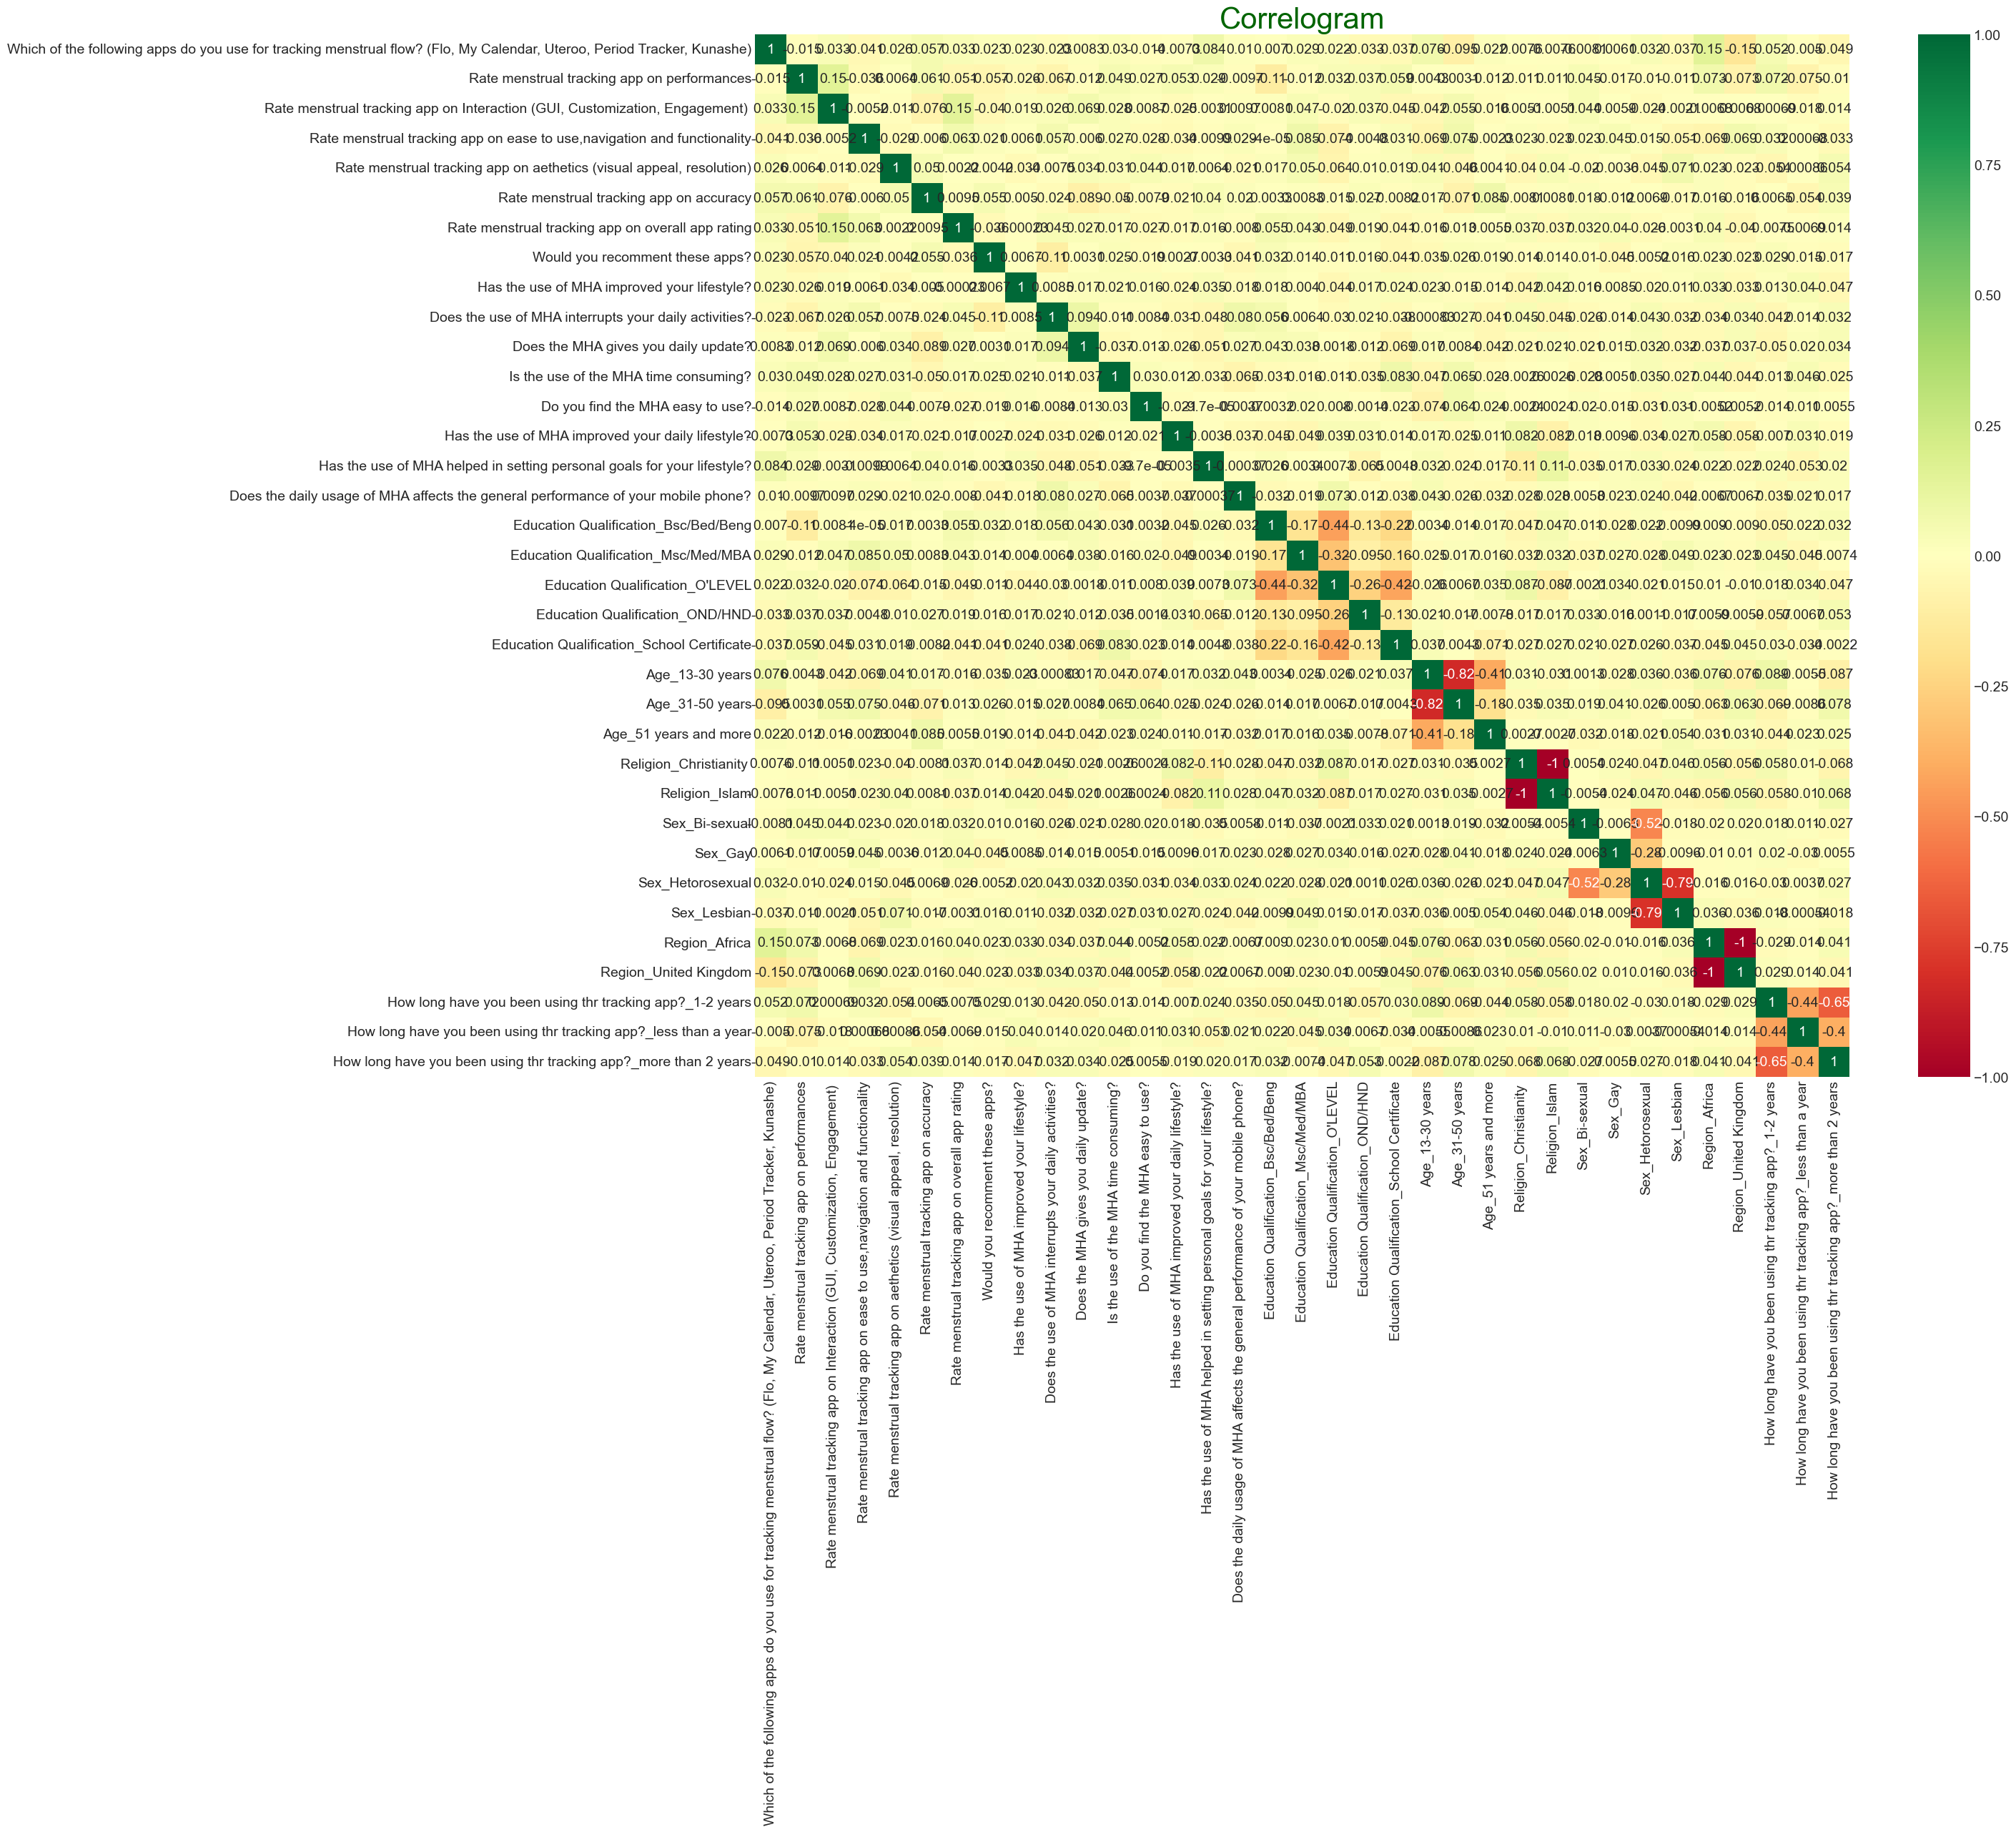

In [105]:
# Quantify correlations
corr = data1.corr()
plt.figure(figsize = (22, 18))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 30, color = 'darkgreen')
plt.show()

### Best Feature Selection

In [109]:
import pandas as pd
import plotly.graph_objs as go
from sklearn.feature_selection import SelectKBest, chi2

data_new = data1.copy()

# features and labels are extracted
X = data_new.drop('Which of the following apps do you use for tracking menstrual flow? (Flo, My Calendar, Uteroo, Period Tracker, Kunashe)', axis=1)
y = data_new['Which of the following apps do you use for tracking menstrual flow? (Flo, My Calendar, Uteroo, Period Tracker, Kunashe)']

# Fit SelectKBest with chi2 score function
best_features = SelectKBest(score_func=chi2, k='all')
fit = best_features.fit(X, y)

# Calculate the sum of all feature scores
total_score = fit.scores_.sum()

# Calculate the percentage contribution of each feature to the total score
feature_scores_percentage = (fit.scores_ / total_score) * 100

# Create a DataFrame for feature scores and percentages
feature_score_percentage_df = pd.DataFrame({
    'feature': X.columns,
    'score': fit.scores_,
    'percentage': feature_scores_percentage
})

# Sort the DataFrame by percentage in descending order
feature_score_percentage_df.sort_values(by='percentage', ascending=False, inplace=True)

# Display the top 20 features and their percentages
top_features_df = feature_score_percentage_df.head(34)
print(top_features_df)

# Visualize the results as a bar chart
fig = go.Figure(go.Bar(
    x=top_features_df['percentage'],
    y=top_features_df['feature'],
    orientation='h'))

fig.update_layout(
    title="Top 20 Features by Percentage Contribution",
    height=1200,
    showlegend=False,
)

fig.show()


                                              feature        score  percentage
29                                      Region_Africa  2043.000000   52.483930
30                              Region_United Kingdom  1464.000000   37.609630
21                                    Age_31-50 years    85.926404    2.207418
20                                    Age_13-30 years    37.592163    0.965729
10              Is the use of the MHA time consuming?    26.732110    0.686738
28                                        Sex_Lesbian    26.320788    0.676172
33  How long have you been using thr tracking app?...    25.905856    0.665512
19         Education Qualification_School Certificate    24.178304    0.621132
31  How long have you been using thr tracking app?...    21.191862    0.544411
25                                      Sex_Bi-sexual    19.217144    0.493681
24                                     Religion_Islam    17.339788    0.445453
15               Education Qualification_Bsc/Bed/Ben

--**Observations**

If we aggregate the importance of each feature (percentage column) with respect to the predicted outcome, the total importance score sums up to 100. This signifies that the significance of each feature is distributed as a percentage of the overall feature importance, ranging from the most influential to the least.

Among the top three most crucial features in our dataset are **Region_Africa**, **Region_United Kingdom**, and **Age_31-50**. Conversely, the two least influential features are **Do you find the MHA easy to use?** and **Would you recomment these apps?**. Armed with this information, we can make informed decisions regarding the inclusion of features in our analysis.

Consequently, we will exclude the five least important features, which include **Do you find the MHA easy to use?** and **Would you recomment these apps?**, **Has the use of MHA improved your daily lifestyle?**, **How long have you been using the tracking app?**, and **Has the use of MHA improved your lifestyle?**.

### Dropping Columns

In [110]:
# Dropping the five least important features
data1.drop(['Has the use of MHA improved your daily lifestyle?', 'Has the use of MHA improved your lifestyle?','Do you find the MHA easy to use?','Would you recomment these apps?','How long have you been using thr tracking app?_less than a year'], axis=1, inplace=True)

In [111]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3507 entries, 0 to 3506
Data columns (total 30 columns):
 #   Column                                                                                                                   Non-Null Count  Dtype
---  ------                                                                                                                   --------------  -----
 0   Which of the following apps do you use for tracking menstrual flow? (Flo, My Calendar, Uteroo, Period Tracker, Kunashe)  3507 non-null   int32
 1   Rate menstrual tracking app on performances                                                                              3507 non-null   int64
 2   Rate menstrual tracking app on Interaction (GUI, Customization, Engagement)                                              3507 non-null   int64
 3   Rate menstrual tracking app on ease to use,navigation and functionality                                                  3507 non-null   int64
 4   

<a name="Modelling"></a>
## <p style="padding: 8px;color:white; display:fill;background-color:deeppink; border-radius:5px; font-size:100%"> <b>8. Model Building</b>

### Data splitting

In [116]:
X=data1.drop('Which of the following apps do you use for tracking menstrual flow? (Flo, My Calendar, Uteroo, Period Tracker, Kunashe)',axis=1)
y=data1['Which of the following apps do you use for tracking menstrual flow? (Flo, My Calendar, Uteroo, Period Tracker, Kunashe)']

In [119]:
X.shape, y.shape

((3507, 29), (3507,))

In [120]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [121]:
# Print the shape of each set
print("X_train shape:", X_train.shape)
print("X_val shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_test.shape)

X_train shape: (2454, 29)
X_val shape: (1053, 29)
y_train shape: (2454,)
y_val shape: (1053,)


#### Standardizing and applying Principal Component Analysis (PCA)

In [129]:
# Standardize your data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.decomposition import PCA # We create a PCA instance

n_components = 10 
pca = PCA(n_components=n_components)

X_train_pca = pca.fit_transform(X_train_scaled) # We apply PCA to the training data

# Apply PCA to the testing data
X_test_pca = pca.transform(X_test_scaled)

#### Shortlisting Promising Models
---

We have a dataset consisting of 2,454 training samples and 1,053 testing samples. With our data split, we can now move forward with the process of selecting models for our experiment. We will consider seven (7) different models for evaluation, including:

1. Logistic Regression
2. Random Forest Classifier
3. K-Nearest Neighbors (KNN) Classifier
4. Support Vector Classifier
5. Decision Tree Classifier
6. Gradient Boosting Classifier
7. XGBoost Classifier

### Defining a function for easy model building

In [122]:
 def model_classifier(train_features, train_label, test_features, test_label, model_list,predicted_list,type_ave = 'weighted' ):
    """
    Function to build four classification models using four different algorithms and output their metrics.
    It takes train_features, train_label, test_features, test_label,List of model variables, list of predicted variables.
    Average type for F1 score
    """
    model_list[0]= LogisticRegression() # Create an object of logistic regression
    model_list[0].fit(train_features,train_label) # Fit train data to the object
    predicted_list[0] = model_list[0].predict(test_features) # Use the trained object to predict test labels using the test features
    print(f'Accuracy score for LogisticRegession is :{accuracy_score(test_label,predicted_list[0])}') # Evaluate the model with accuracy_score
    print(f'F1_score score for LogisticRegession is :{f1_score(test_label,predicted_list[0],average = type_ave)}') # Evaluate the model with f1_score
    print(f'Accuracy score for LogisticRegession is :{confusion_matrix(test_label,predicted_list[0])}') # Evaluate the model with confusion_matrix
    print(classification_report(test_label,predicted_list[0])) # Evaluate the model with classification report
    print('_________________________________________________________') # Create a demacation line
    model_list[1]= KNeighborsClassifier() # Create an object of KNeighbors Classifier
    model_list[1].fit(train_features,train_label) # Fit train data to the object
    predicted_list[1] = model_list[1].predict(test_features) # Use the trained object to predict test labels using the test features
    print(f'Accuracy score for KNeighboursClassifier is :{accuracy_score(test_label,predicted_list[1])}') # Evaluate the model with accuracy_score
    print(f'F1_score score for KNeighboursClassifier is :{f1_score(test_label,predicted_list[1],average =type_ave)}') # Evaluate the model with f1_score
    print(f'Confusion Matrix for KNeighboursClassifier is :{confusion_matrix(test_label,predicted_list[1])}') # Evaluate the model with confusion_matrix
    print(classification_report(test_label,predicted_list[1])) # Evaluate the model with classification report
    print('_________________________________________________________') # Create a demacation line
    model_list[2]= RandomForestClassifier() # Create an object of RandomForest Classifier
    model_list[2].fit(train_features,train_label) # Fit train data to the object
    predicted_list[2] = model_list[2].predict(test_features) # Use the trained object to predict test labels using the test features
    print(f'Accuracy score for RandomForestClassifier is :{accuracy_score(test_label,predicted_list[2])}') # Evaluate the model with accuracy_score
    print(f'F1_score score for RandomForestClassifier is :{f1_score(test_label,predicted_list[2],average= type_ave)}') # Evaluate the model with f1_score
    print(f'Confusion_matrix for RandomForestClassifier is :{confusion_matrix(test_label,predicted_list[2])}') # Evaluate the model with confusion_matrix
    print(classification_report(test_label,predicted_list[2])) # Evaluate the model with classification report
    print('_________________________________________________________') # Create a demacation line
    model_list[3]= GradientBoostingClassifier() # Create an object of GradientBoosting Classifier
    model_list[3].fit(train_features,train_label) # Fit train data to the object
    predicted_list[3] = model_list[3].predict(test_features) # Use the trained object to predict test labels using the test features
    print(f'Accuracy score for GradientBoosting Classifier is :{accuracy_score(test_label,predicted_list[3])}') # Evaluate the model with accuracy_score
    print(f'F1_score score for GradientBoosting Classifier is :{f1_score(test_label,predicted_list[3], average= type_ave)}') # Evaluate the model with f1_score
    print(f'Confusion Matrix for GradientBoosting Classifier is :{confusion_matrix(test_label,predicted_list[3])}') # Evaluate the model with confusion_matrix
    print(classification_report(test_label,predicted_list[3])) # Evaluate the model with classification report
    print('_________________________________________________________') # Create a demacation line
    model_list[4]= SVC() # Create an object of SVC Classifier
    model_list[4].fit(train_features,train_label) # Fit train data to the object
    predicted_list[4] = model_list[4].predict(test_features) # Use the trained object to predict test labels using the test features
    print(f'Accuracy score for SVC Classifier is :{accuracy_score(test_label,predicted_list[4])}') # Evaluate the model with accuracy_score
    print(f'F1_score score for SVC Classifier is :{f1_score(test_label,predicted_list[4], average= type_ave)}') # Evaluate the model with f1_score
    print(f'Confusion Matrix for SVC Classifier is :{confusion_matrix(test_label,predicted_list[4])}') # Evaluate the model with confusion_matrix
    print(classification_report(test_label,predicted_list[4])) # Evaluate the model with classification report
    print('_________________________________________________________') # Create a demacation line
    model_list[5]= DecisionTreeClassifier() # Create an object of DecisionTree Classifier
    model_list[5].fit(train_features,train_label) # Fit train data to the object
    predicted_list[5] = model_list[5].predict(test_features) # Use the trained object to predict test labels using the test features
    print(f'Accuracy score for  DecisionTreeClassifier is :{accuracy_score(test_label,predicted_list[5])}') # Evaluate the model with accuracy_score
    print(f'F1_score score for  DecisionTreeClassifier is :{f1_score(test_label,predicted_list[5], average= type_ave)}') # Evaluate the model with f1_score
    print(f'Confusion Matrix for  DecisionTreeClassifier is :{confusion_matrix(test_label,predicted_list[5])}') # Evaluate the model with confusion_matrix
    print(classification_report(test_label,predicted_list[5])) # Evaluate the model with classification report
    print('_________________________________________________________') # Create a demacation line
    model_list[6]= XGBClassifier() # Create an object of XGB Classifier
    model_list[6].fit(train_features,train_label) # Fit train data to the object
    predicted_list[6] = model_list[5].predict(test_features) # Use the trained object to predict test labels using the test features
    print(f'Accuracy score for  XGBClassifier is :{accuracy_score(test_label,predicted_list[6])}') # Evaluate the model with accuracy_score
    print(f'F1_score score for  XGBClassifierr is :{f1_score(test_label,predicted_list[6], average= type_ave)}') # Evaluate the model with f1_score
    print(f'Confusion Matrix for  XGBClassifier is :{confusion_matrix(test_label,predicted_list[6])}') # Evaluate the model with confusion_matrix
    print(classification_report(test_label,predicted_list[6])) # Evaluate the model with classification report
    print('_________________________________________________________') # Create a demacation line
    

In [123]:
 def Cross_val_classifier(X, y, n_splits, n_repeats, model_list):
    """
    Function to build four classification models using four different algorithms and output their metrics.
    It takes train_features, train_label, test_features, test_label,List of model variables, list of predicted variables.
    Average type for F1 score
    """
    model_list[0]= LogisticRegression() # Create an object of logistic regression
    cv = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats= n_repeats, random_state=1)
    scores = cross_val_score(model_list[0], X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    print(f'scores for {model_list[0]} is {np.mean(scores)}')
    print('_________________________________________________________') # Create a demacation line
    model_list[1]= KNeighborsClassifier() # Create an object of KNeighbors Classifier
    cv = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=1)
    scores = cross_val_score(model_list[1], X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    print(f'scores for {model_list[1]} is {np.mean(scores)}')
    print('_________________________________________________________') # Create a demacation line
    model_list[2]= RandomForestClassifier() # Create an object of RandomForest Classifier
    cv = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=1)
    scores = cross_val_score(model_list[2], X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    print(f'scores for {model_list[2]} is {np.mean(scores)}')
    print('_________________________________________________________') # Create a demacation line
    model_list[3]= GradientBoostingClassifier() # Create an object of GradientBoosting Classifier
    cv = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=1)
    scores = cross_val_score(model_list[3], X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    print(f'scores for {model_list[3]} is {np.mean(scores)}')
    print('_________________________________________________________') # Create a demacation line
    model_list[4]= SVC() # Create an object of SVC Classifier
    cv = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=1)
    scores = cross_val_score(model_list[4], X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
    print(f'scores for {model_list[4]} is {np.mean(scores)}')
    print('_________________________________________________________') # Create a demacation line
    model_list[5]= DecisionTreeClassifier() # Create an object of DecisionTreeClassifier
    cv = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=1)
    scores = cross_val_score(model_list[5], X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
    print(f'scores for {model_list[5]} is {np.mean(scores)}')
    print('_________________________________________________________') # Create a demacation line
    model_list[6]= XGBClassifier() # Create an object of XGBClassifier
    cv = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=1)
    scores = cross_val_score(model_list[6], X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
    print(f'scores for {model_list[6]} is {np.mean(scores)}')
    print('_________________________________________________________') # Create a demacation line

In [125]:
def Stacking_class(feature:list, target:list, level_0_class:list, level_1_class:str,n_split,stack_method:str,metric:str):
    level_0_classifiers = dict()
    level_0_classifiers['Log'] = level_0_class[0]
    level_0_classifiers['KNC'] = level_0_class[1]
    level_0_classifiers['RanC'] = level_0_class[2]
    level_0_classifiers['GBC'] = level_0_class[3]
    level_0_classifiers['SVC'] = level_0_class[4]
    level_0_classifiers['DTC'] = level_0_class[5]
    level_0_classifiers['XGB'] = level_0_class[6]
    level_1_classifier = level_1_class
    
    kfold = StratifiedKFold(n_splits=n_split, shuffle=True, random_state=42)
    stacking_model = StackingClassifier(estimators=list(level_0_classifiers.items()),
                                    final_estimator=level_1_classifier, passthrough=False,
                                    cv=kfold, stack_method=stack_method)
    stacking_model.fit_transform(feature[0], target[0])
    class_pred = stacking_model.predict(feature[1])
    print(f' {metric} of scikit-learn stacking classifier: {metric(target[1], class_pred)}')

In [134]:
model_classifier(X_train_pca,y_train,X_test_pca,y_test,['Log','KNC','RanC','GbC','SVC','DTC','XGB'],
                 ['Log_pred','KNC_pred','RanC_pred','GbC_pred','SVC_pred','DTC_pred','XGB_pred'])

Accuracy score for LogisticRegession is :0.49952516619183285
F1_score score for LogisticRegession is :0.42918792908718456
Accuracy score for LogisticRegession is :[[  5   0 106   7   0]
 [  0 190   0   0  36]
 [  1   0 258  50   0]
 [  0   0 166  31   0]
 [  0 161   0   0  42]]
              precision    recall  f1-score   support

           0       0.83      0.04      0.08       118
           1       0.54      0.84      0.66       226
           2       0.49      0.83      0.62       309
           3       0.35      0.16      0.22       197
           4       0.54      0.21      0.30       203

    accuracy                           0.50      1053
   macro avg       0.55      0.42      0.37      1053
weighted avg       0.52      0.50      0.43      1053

_________________________________________________________
Accuracy score for KNeighboursClassifier is :0.7113010446343779
F1_score score for KNeighboursClassifier is :0.7088786298159064
Confusion Matrix for KNeighboursClassifier is 

In [145]:
Stacking_class([X_train_pca, X_test_pca], [y_train, y_test],
               [LogisticRegression(), KNeighborsClassifier(), RandomForestClassifier(), GradientBoostingClassifier(),SVC(),DecisionTreeClassifier(),XGBClassifier()],
               KNeighborsClassifier(), 5, 'predict', accuracy_score)

 <function accuracy_score at 0x0000026D6478CFE0> of scikit-learn stacking classifier: 0.7435897435897436


In [149]:
Cross_val_classifier(X_train_pca,y_train,5,1,['Log','KNC','RanC','GbC','SVC','DTC','XGB'])

scores for LogisticRegression() is 0.5281241946880586
_________________________________________________________
scores for KNeighborsClassifier() is 0.6907161561162143
_________________________________________________________
scores for RandomForestClassifier() is 0.7897335716363939
_________________________________________________________
scores for GradientBoostingClassifier() is 0.771397813707968
_________________________________________________________
scores for SVC() is -0.3036849155879038
_________________________________________________________
scores for DecisionTreeClassifier() is 0.21682655050977145
_________________________________________________________
scores for XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_poli

--**Observations**
- The Random Forest Classifier performs best with 79% accuracy.
- The Stacking classifier gives an accuracy of 74%